## 1. Kütüphane Import İşlemleri

In [1]:
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import numpy as np
import time

## 2. İstek Atacak Fonksiyonun Oluşturulması

In [2]:
def getAndParseURL(url):
    result = requests.get(url, headers={"User-Agent":"Safari/537.36."})
    soup = bts(result.text, "html.parser")
    return soup

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><link as="font" crossorigin="anonymous" href="/fonts/FC24/CruyffSans-Bold.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="/fonts/FC24/CruyffSans-Light.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="/fonts/FC24/CruyffSans-Medium.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="/fonts/FC24/CruyffSans-Regular.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="/fonts/FC24/CruyffSansExpanded-Heavy.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="/fonts/FC24/CruyffSansMono-Bold.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="/fonts/FC24/CruyffSansMono-Light.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="/fonts/FC24/CruyffSansMono-Medium.ttf
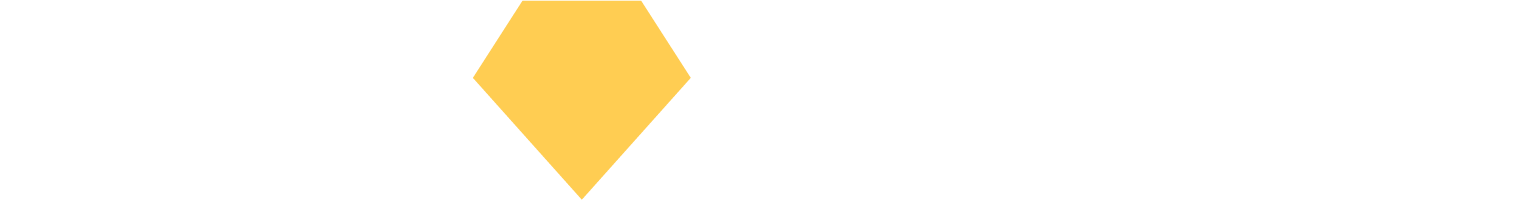
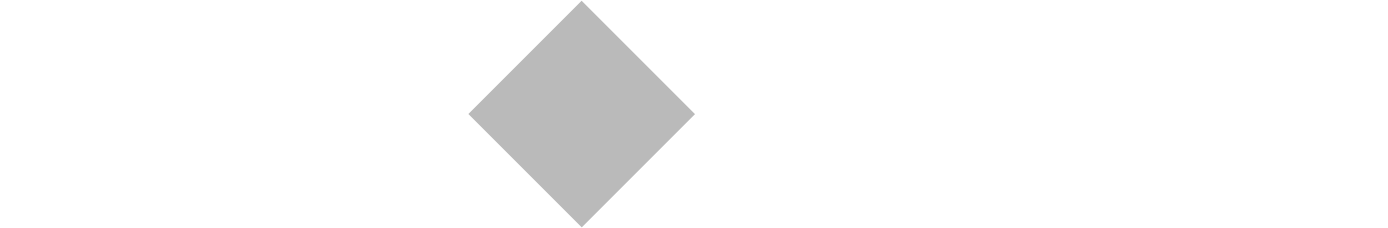
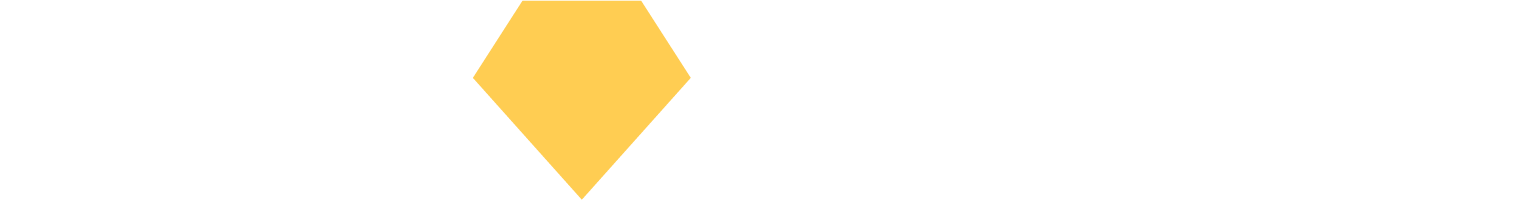
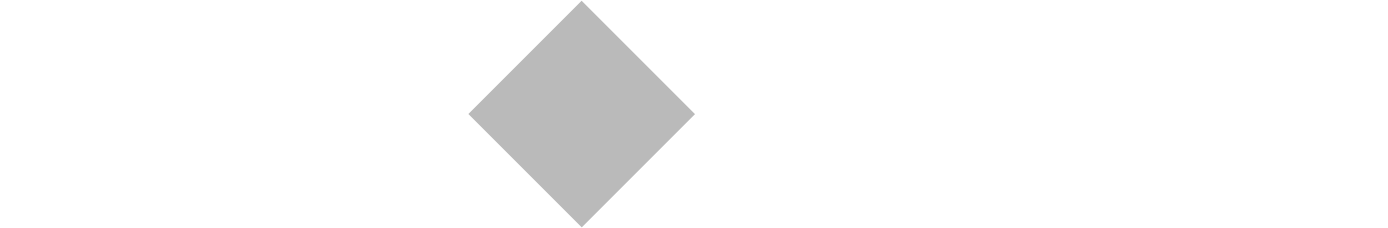
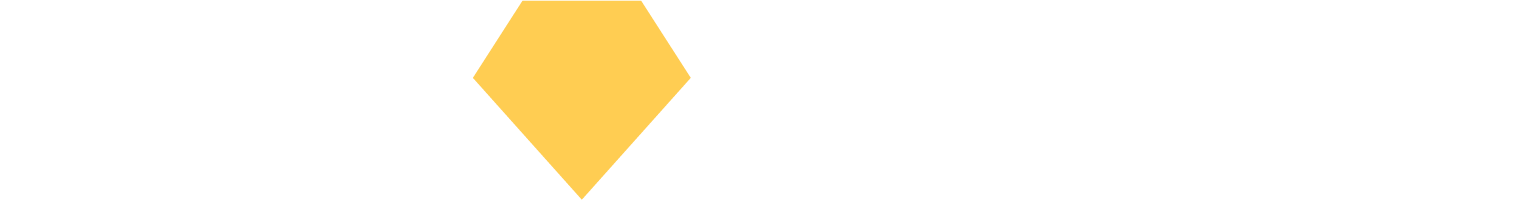
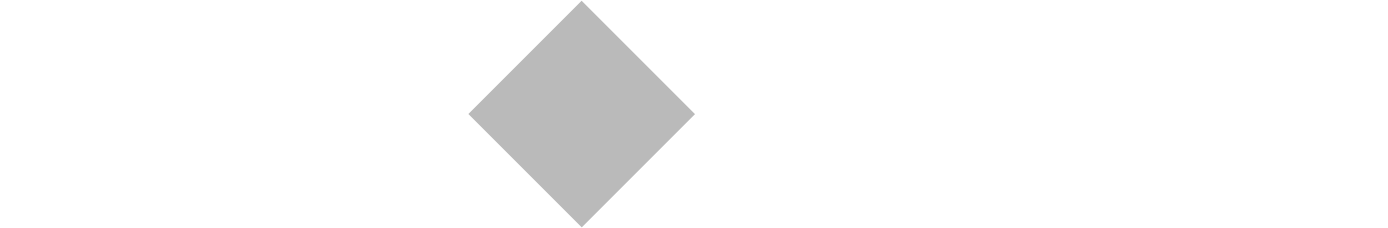
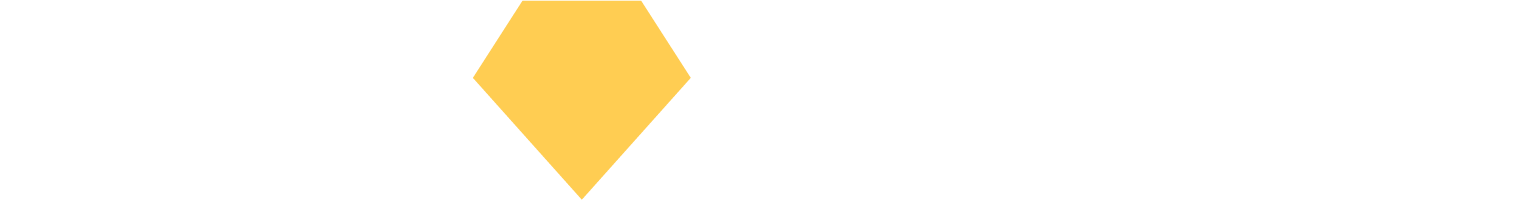
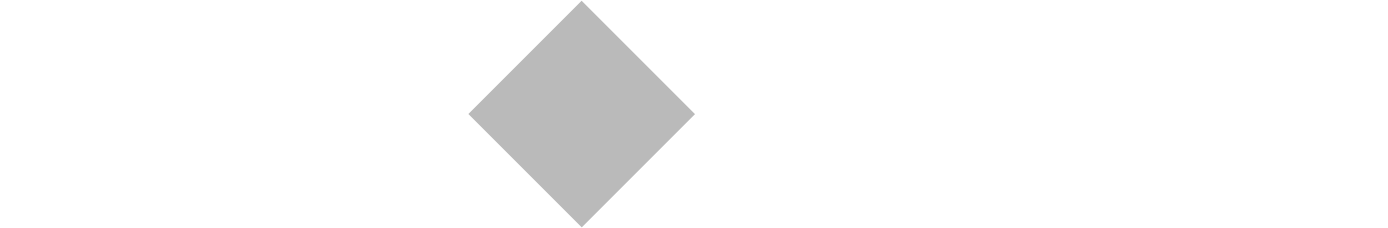
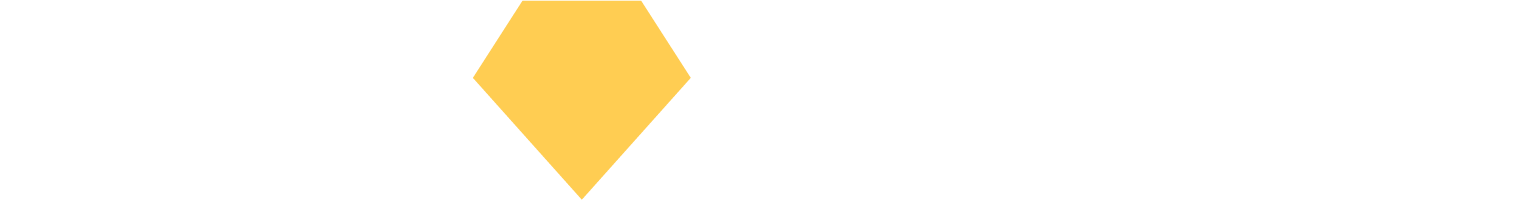
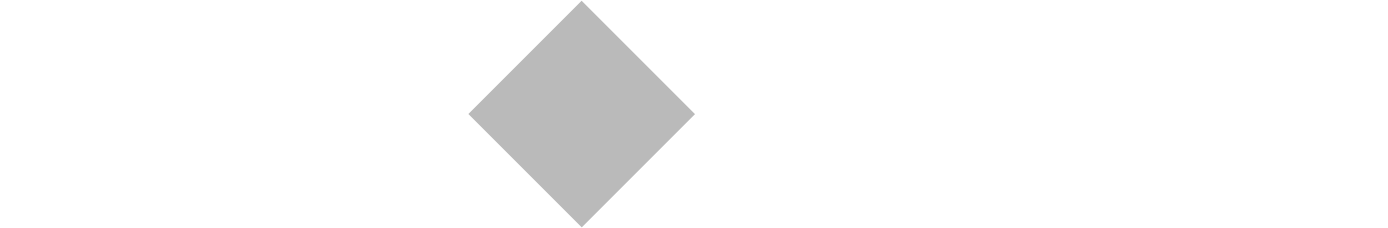
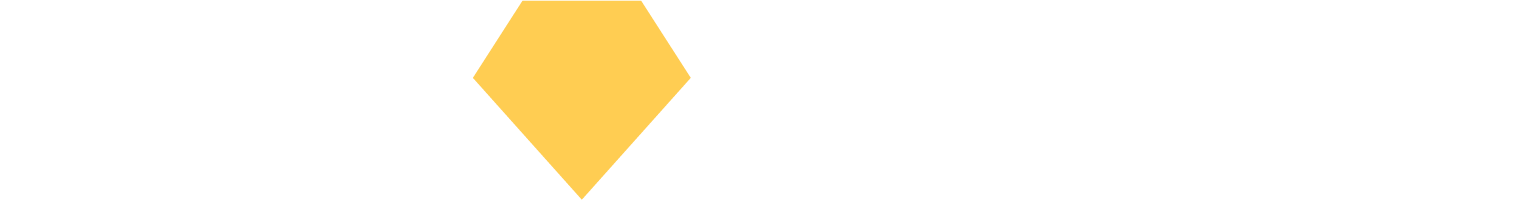
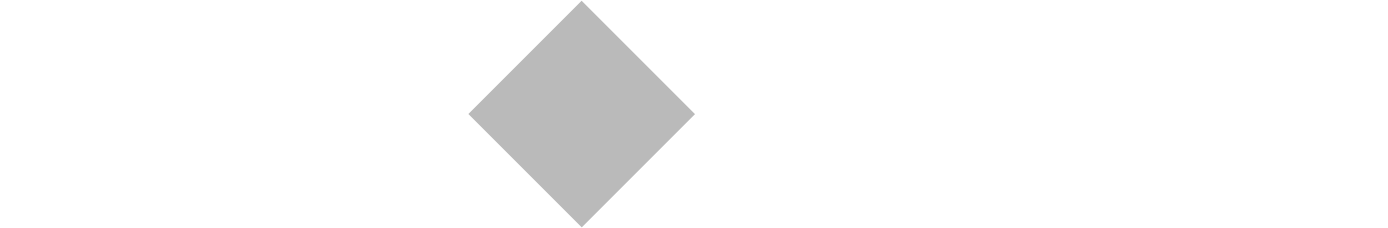
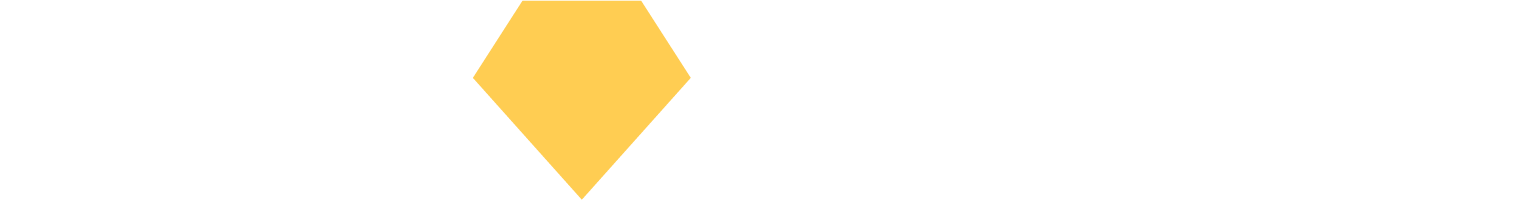
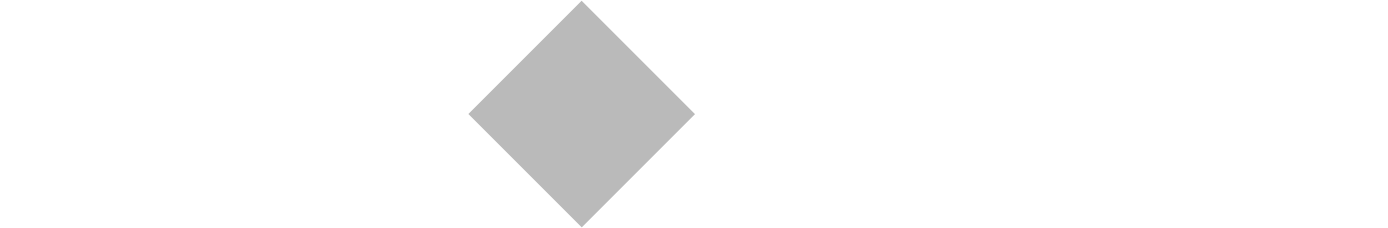
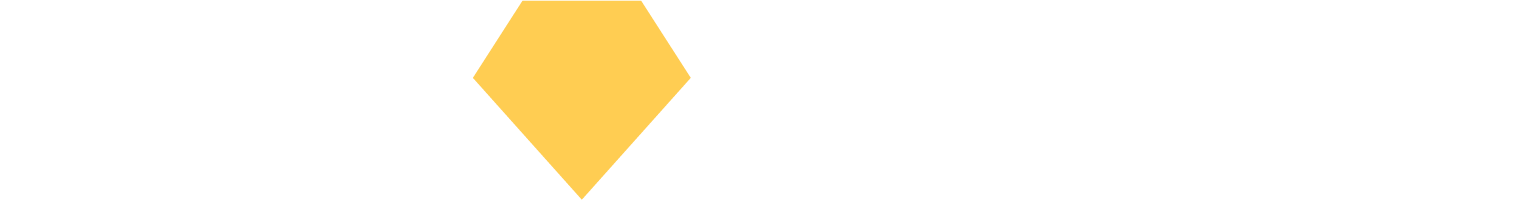
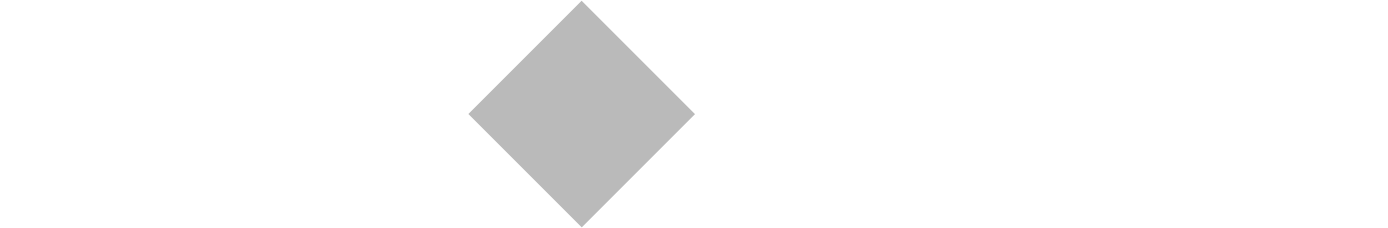
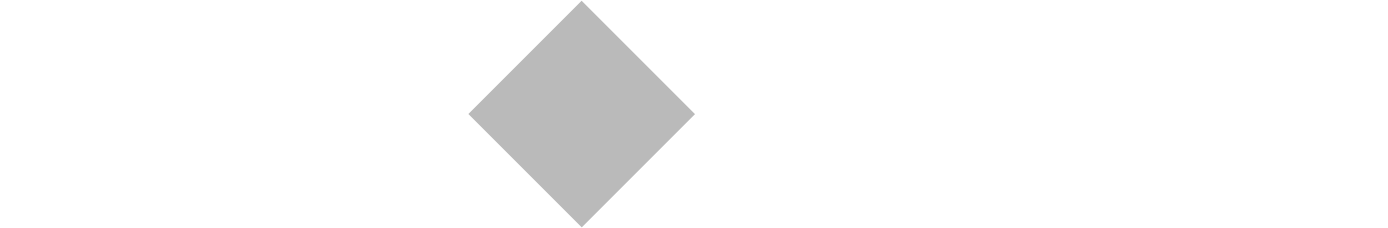
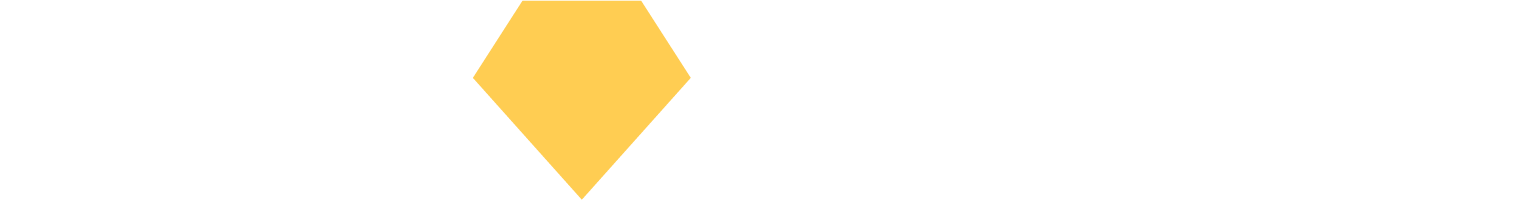
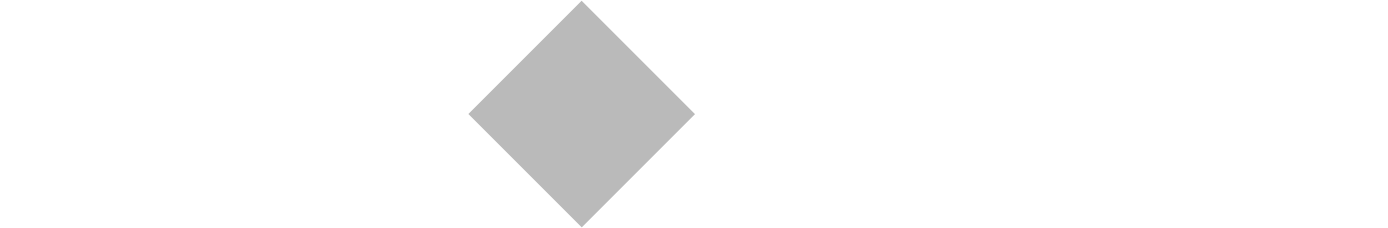
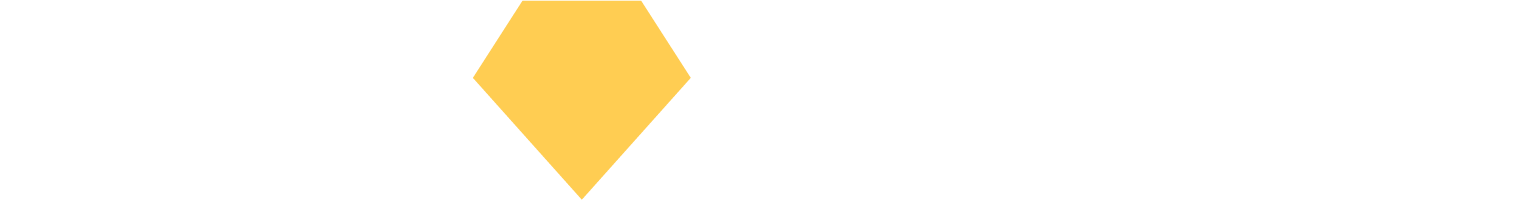
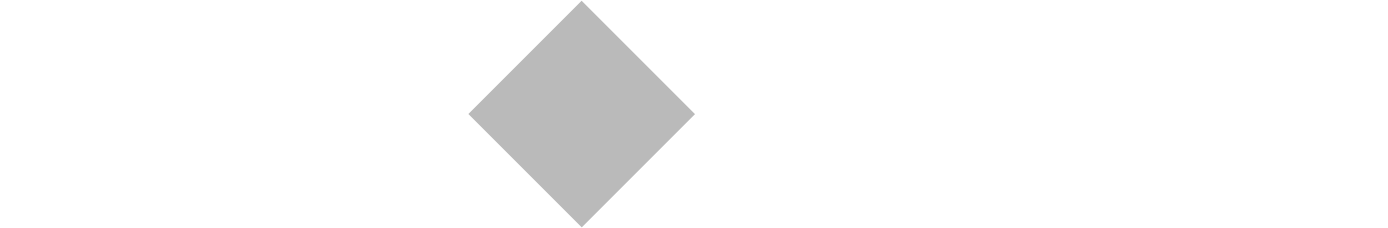
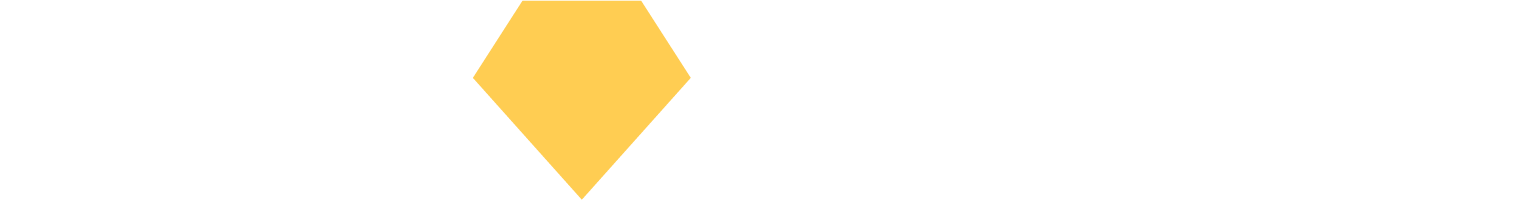
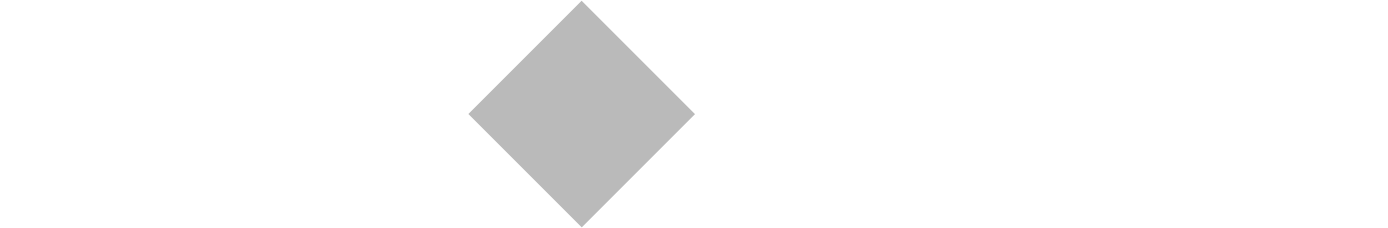
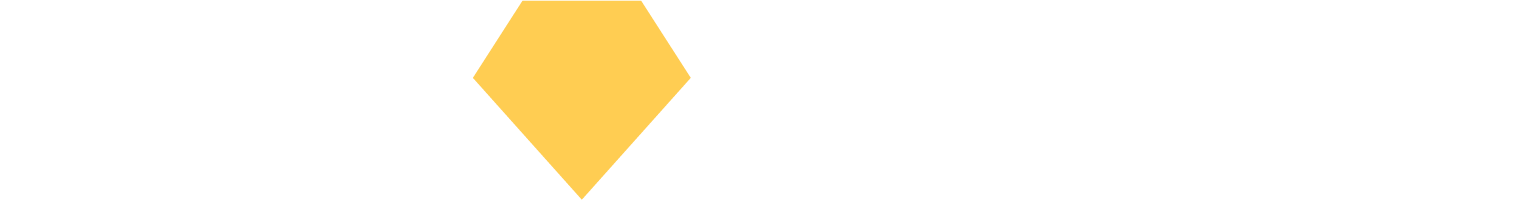
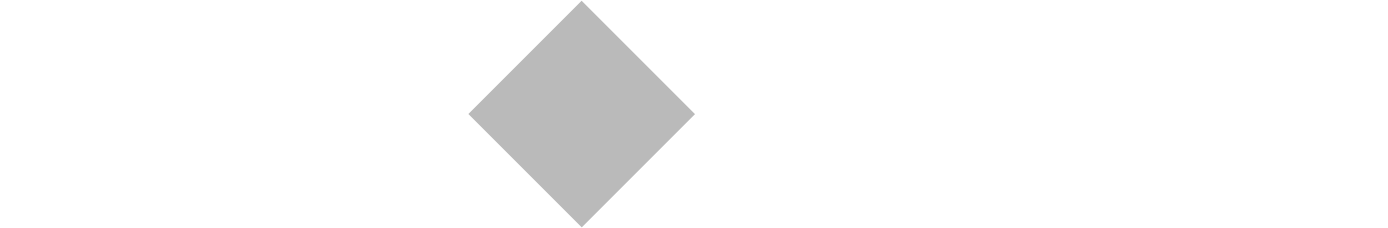
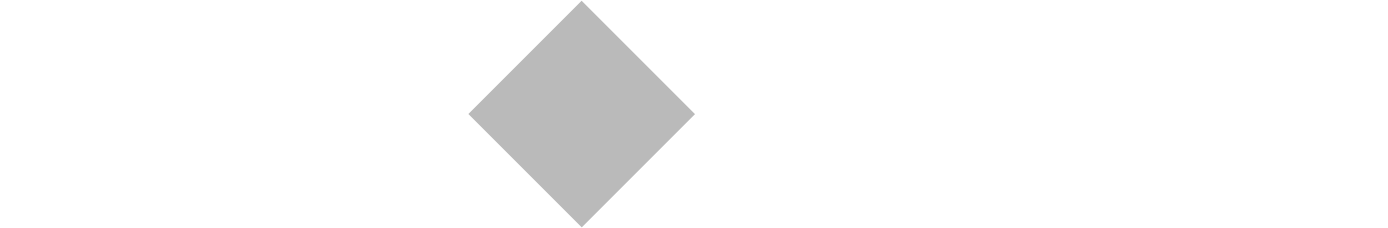
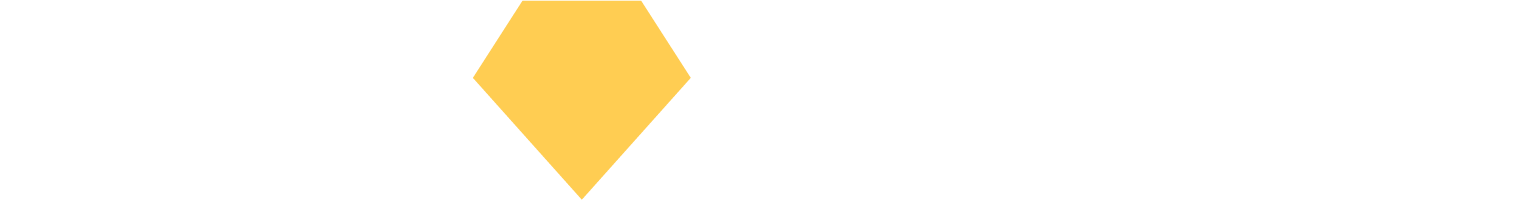
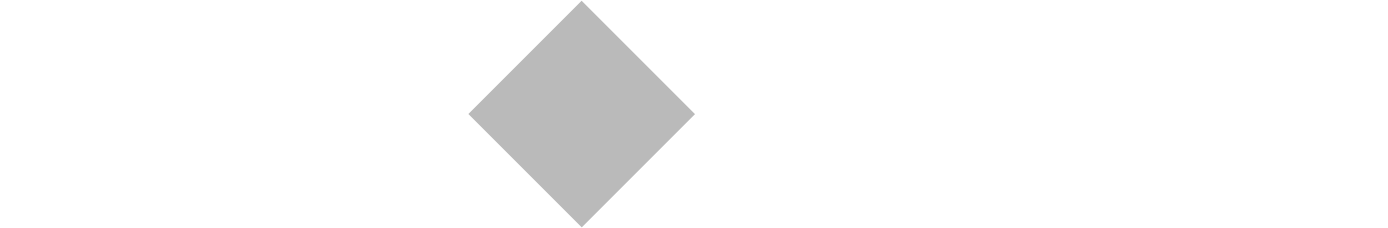
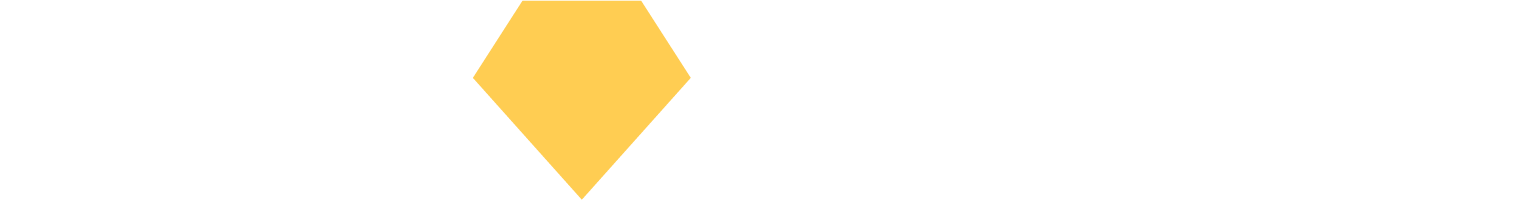
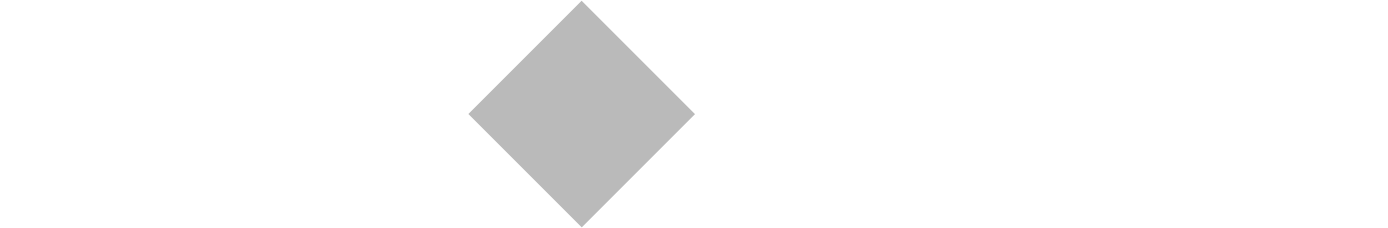
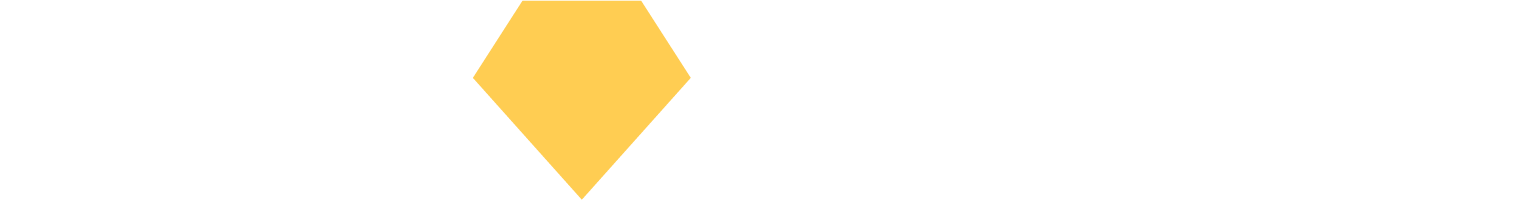
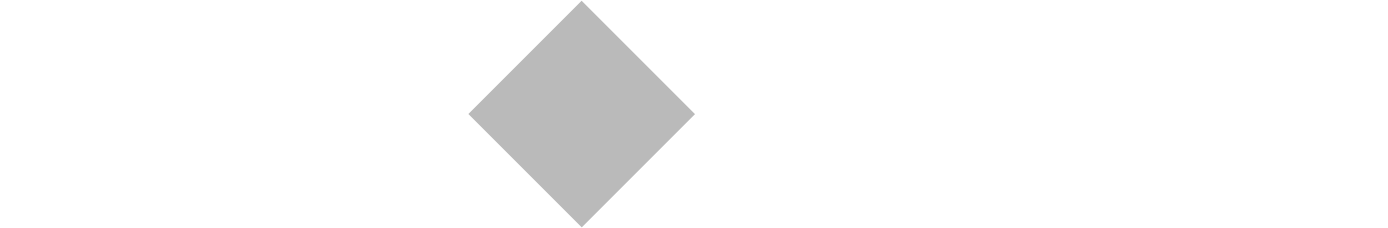
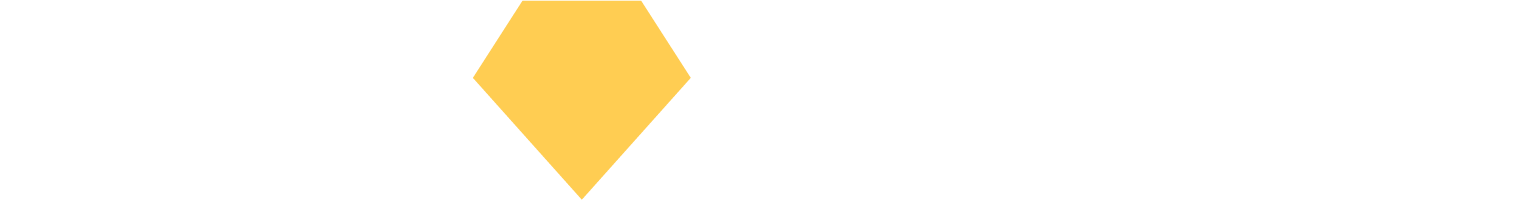
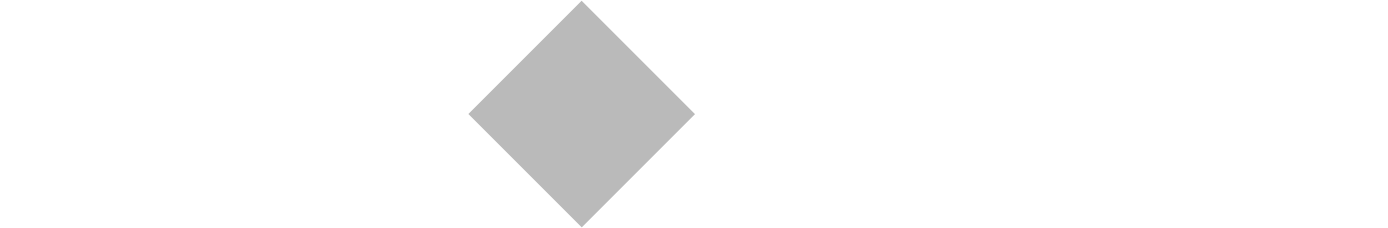
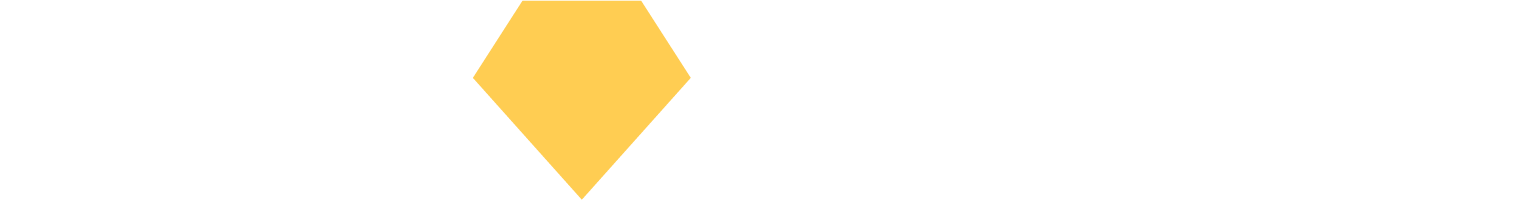
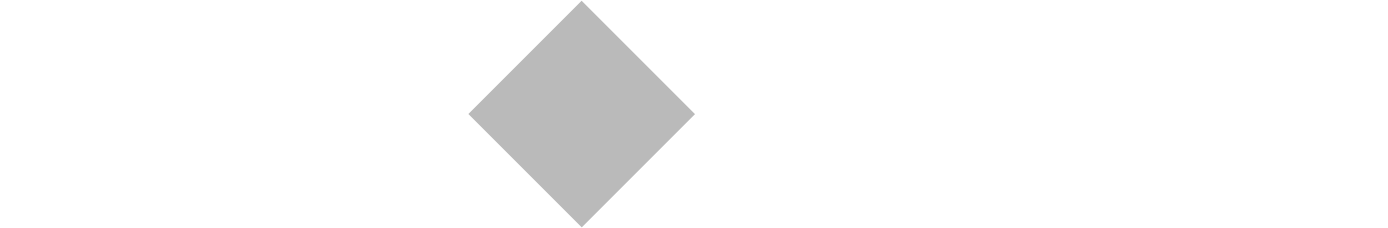
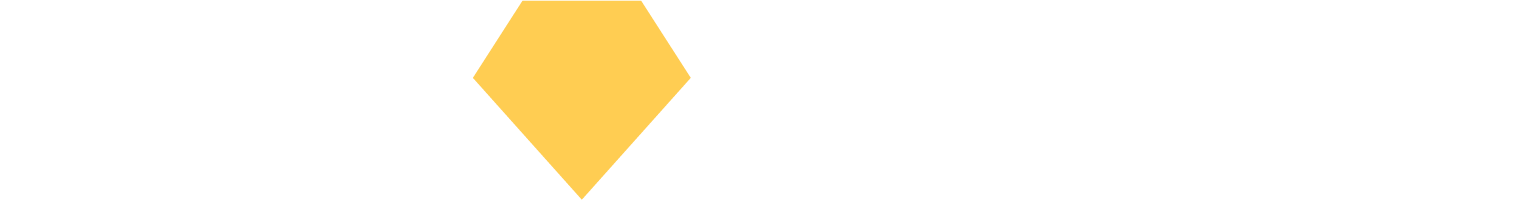
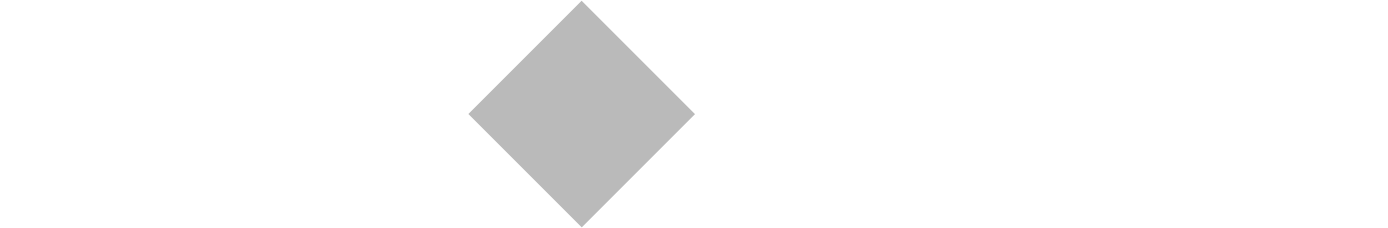
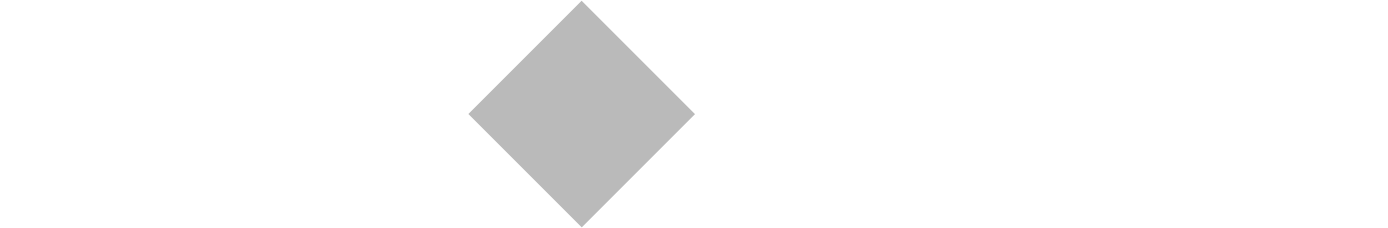
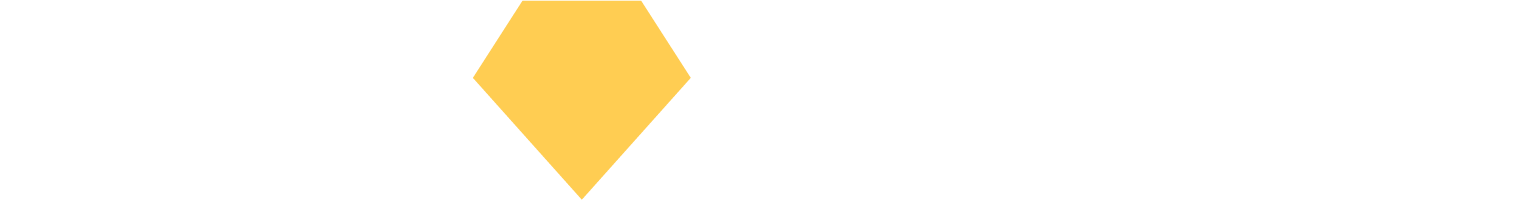
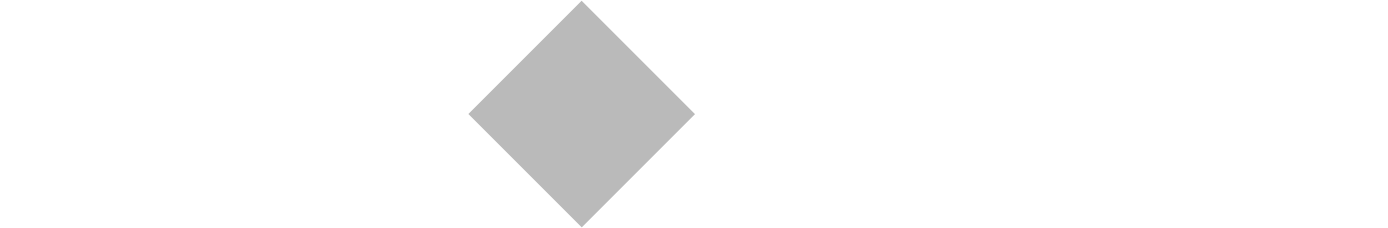
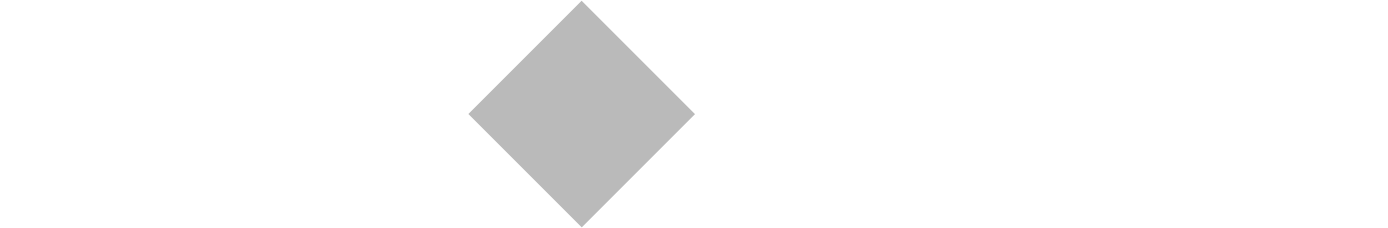
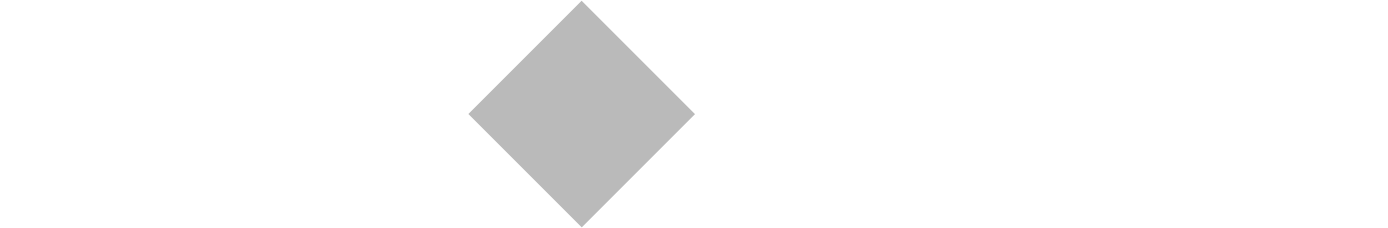
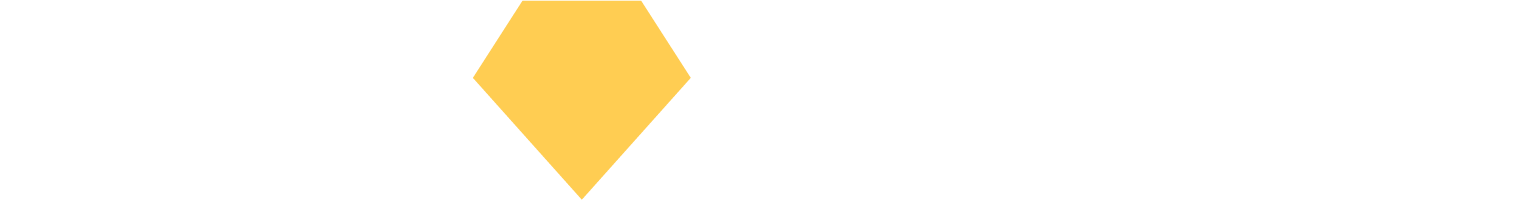
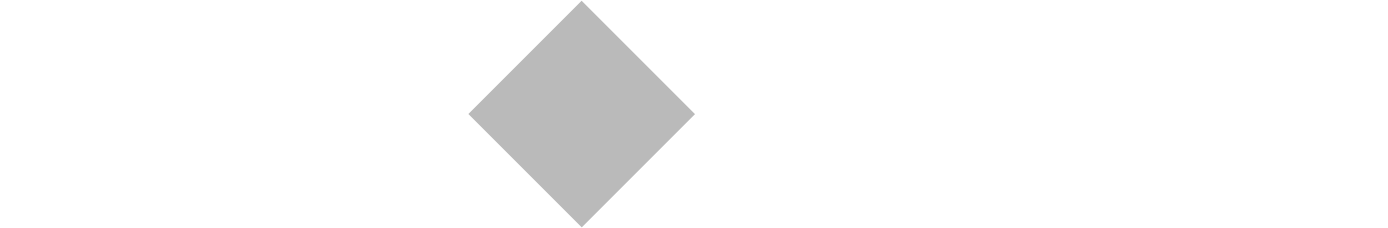
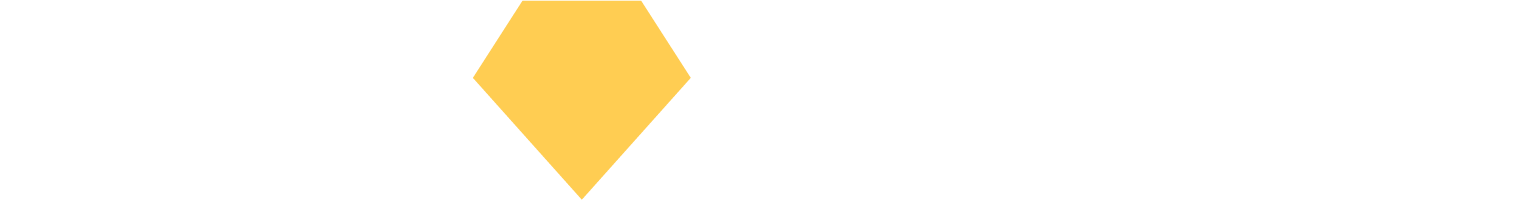
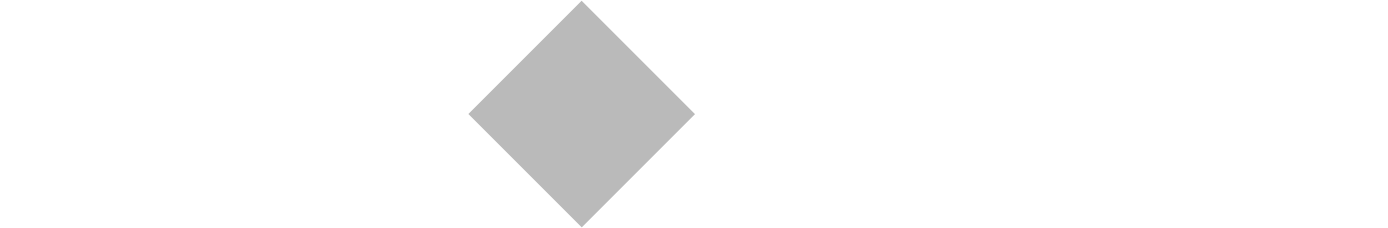
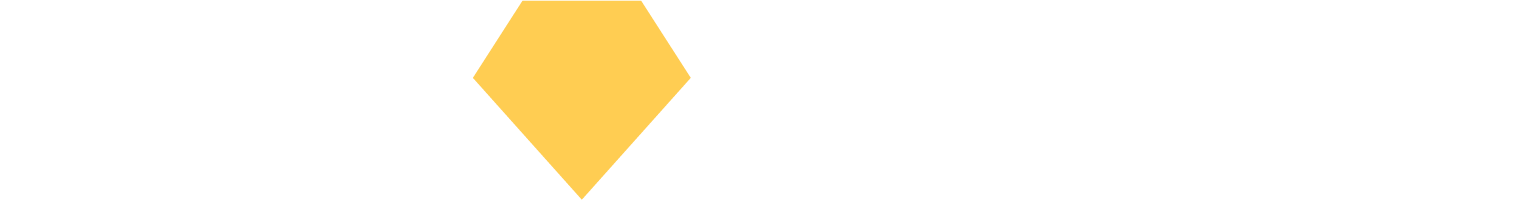
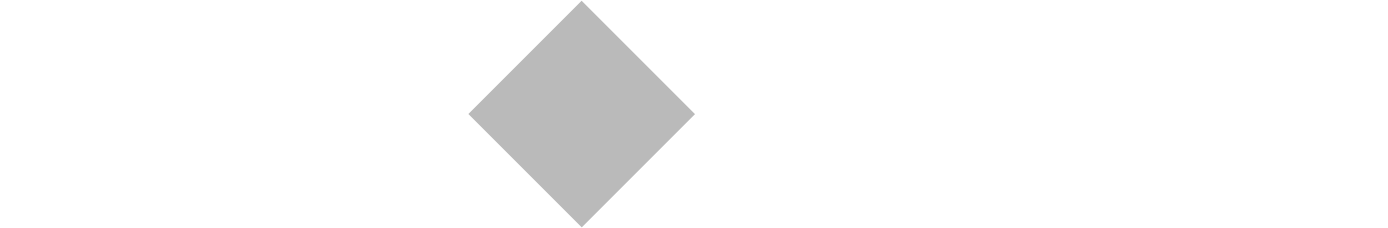
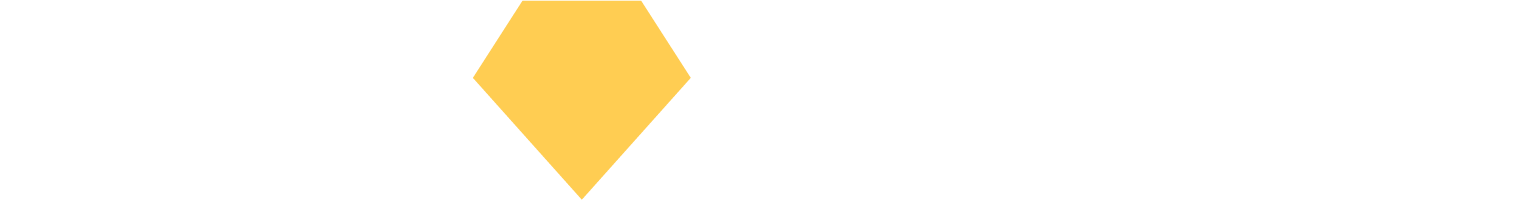
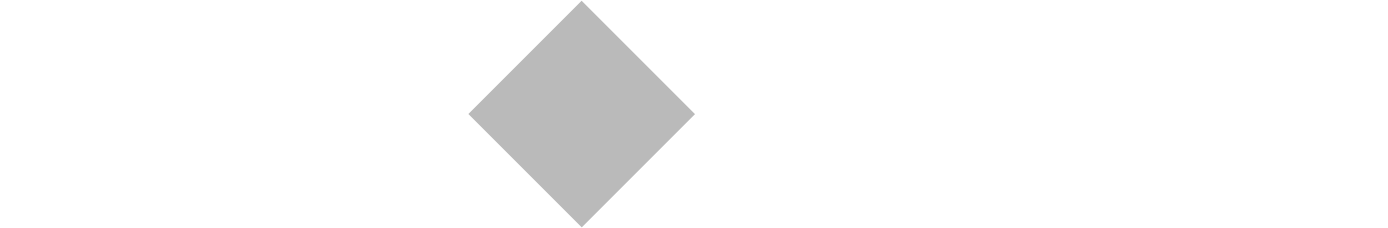
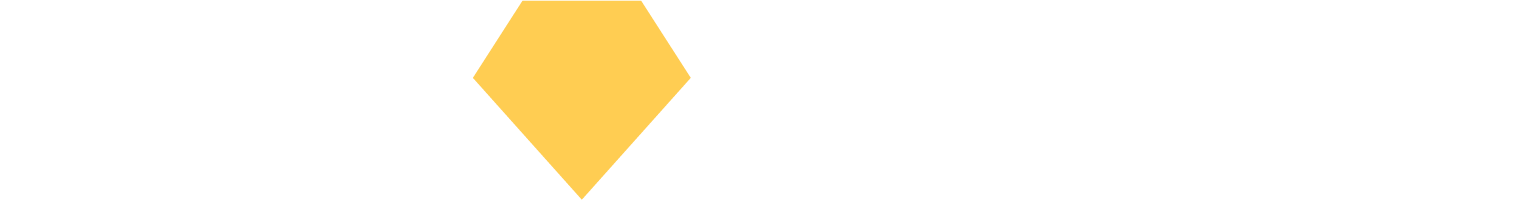
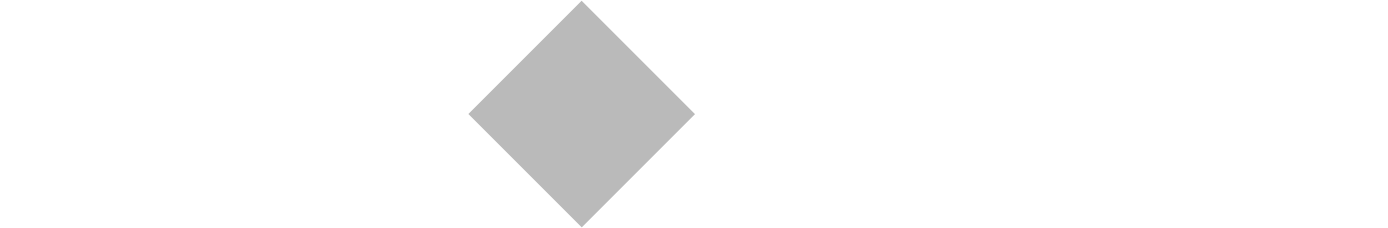
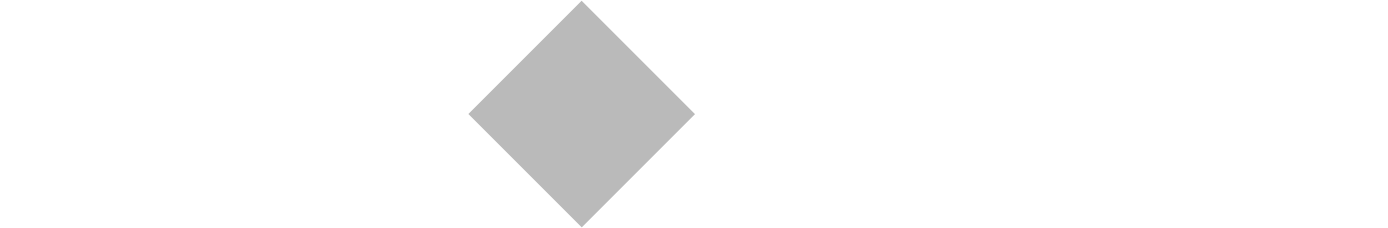
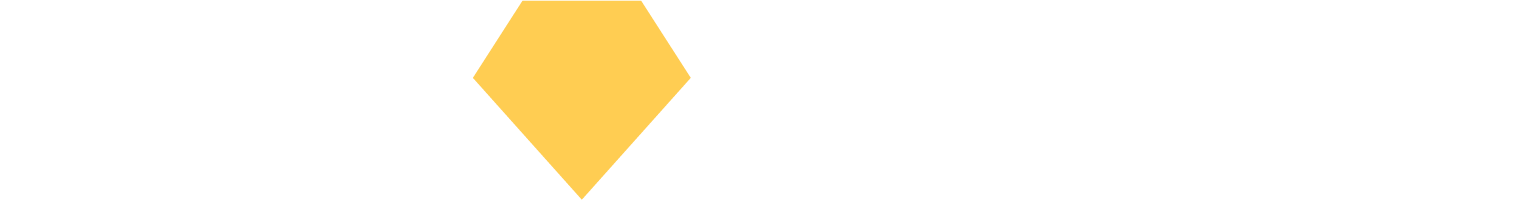
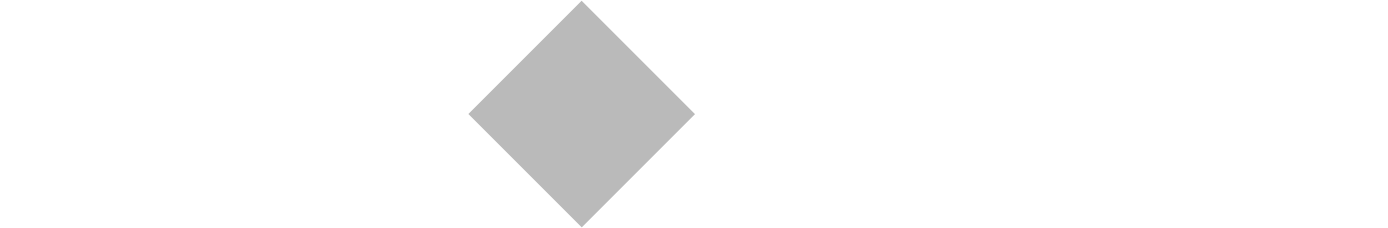
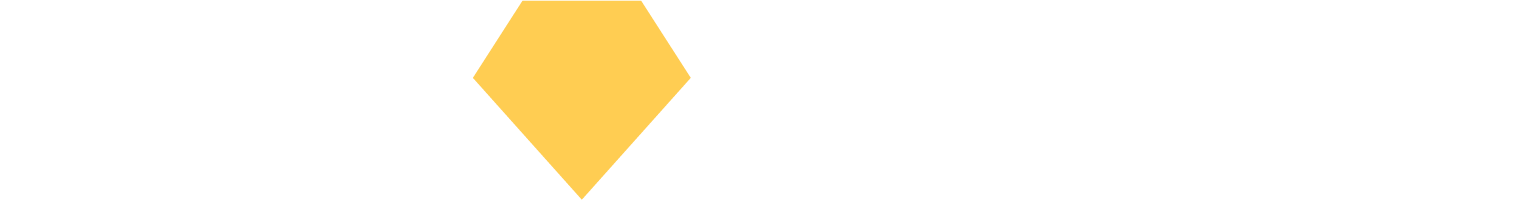
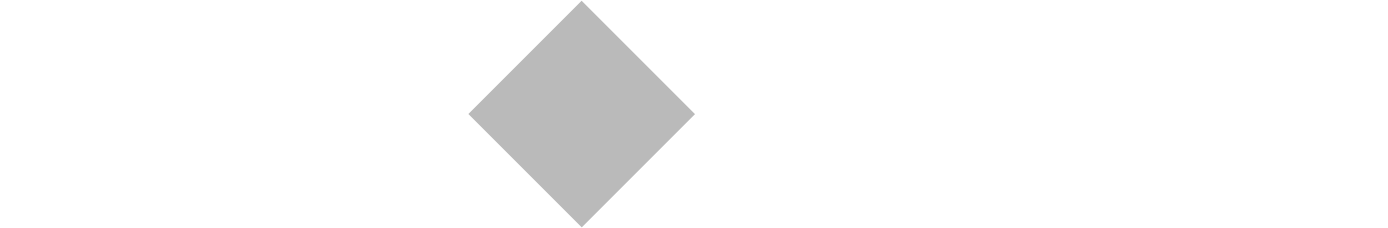
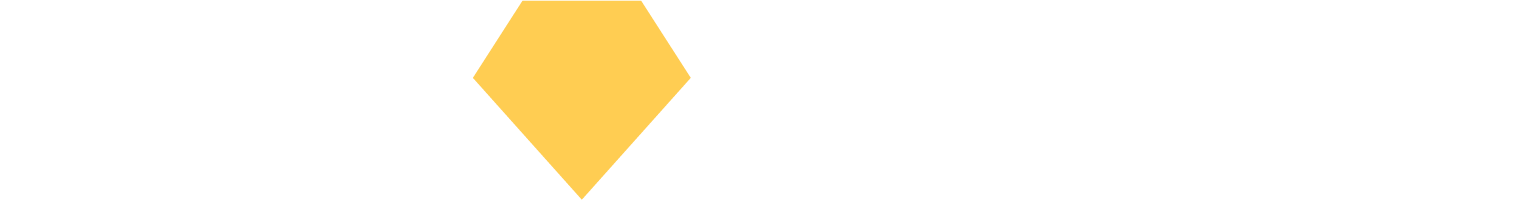
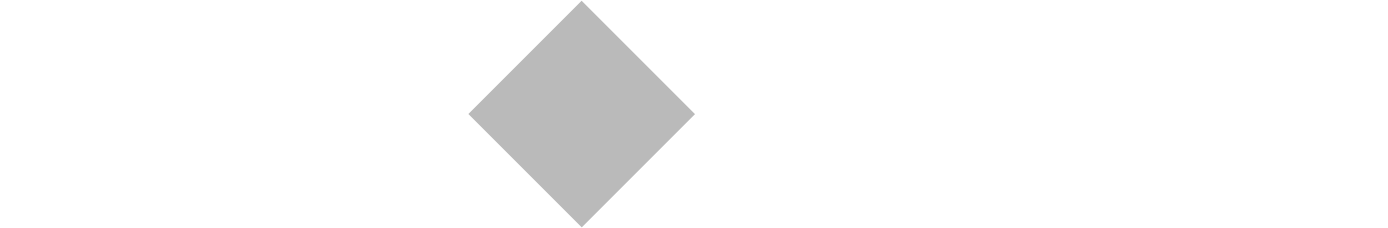
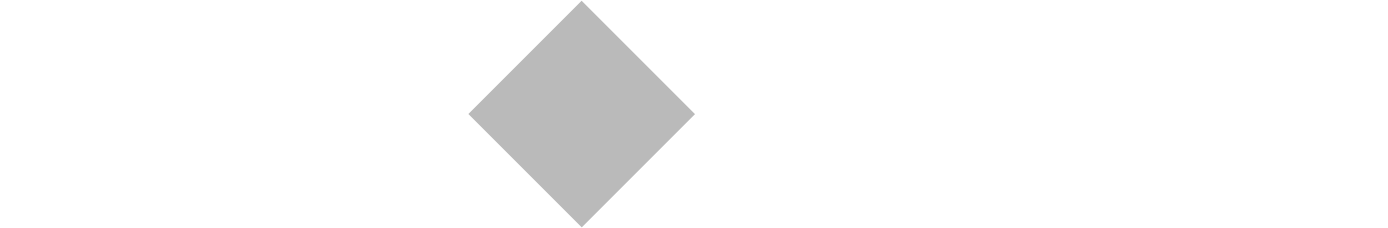
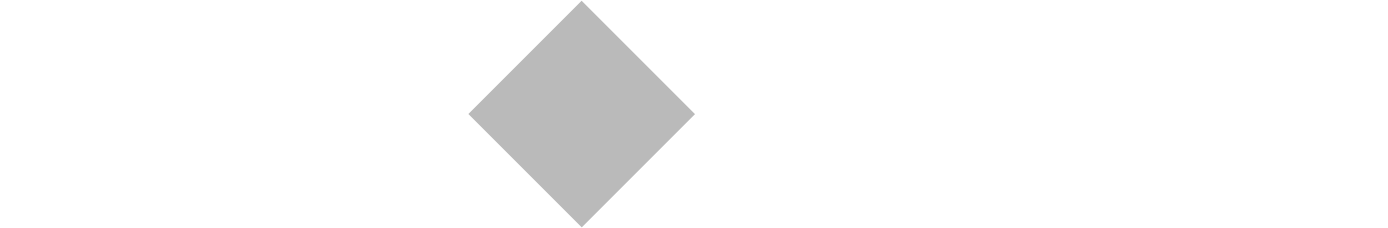
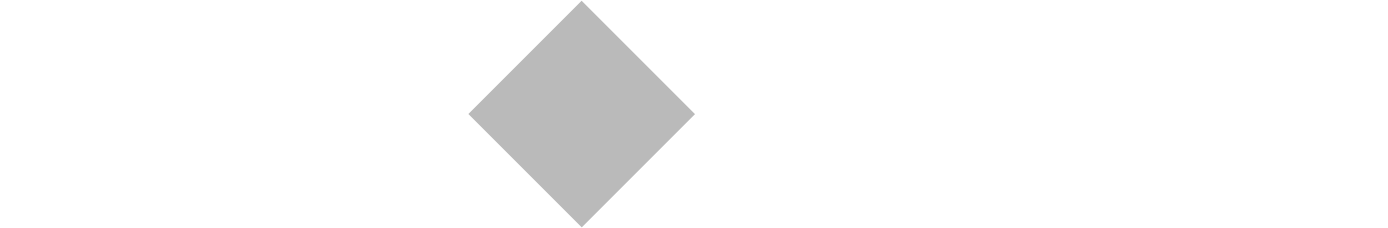
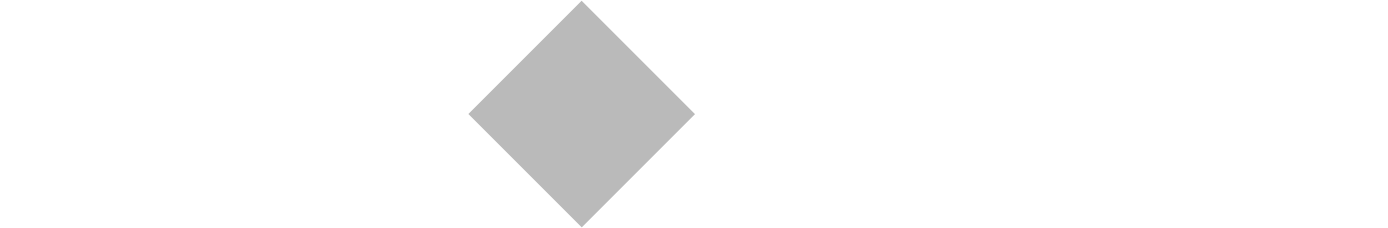
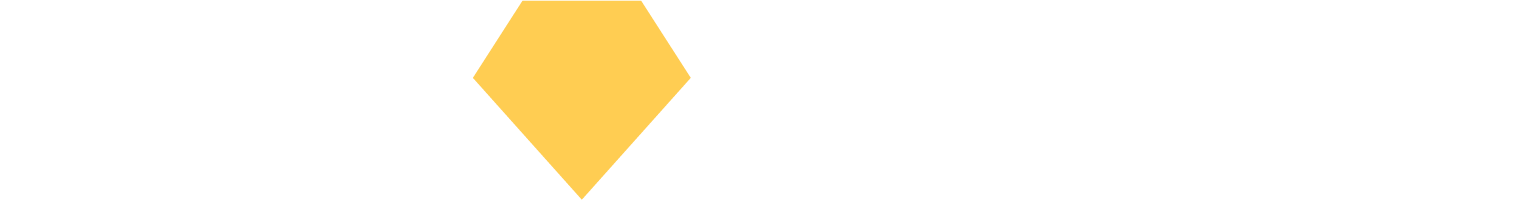
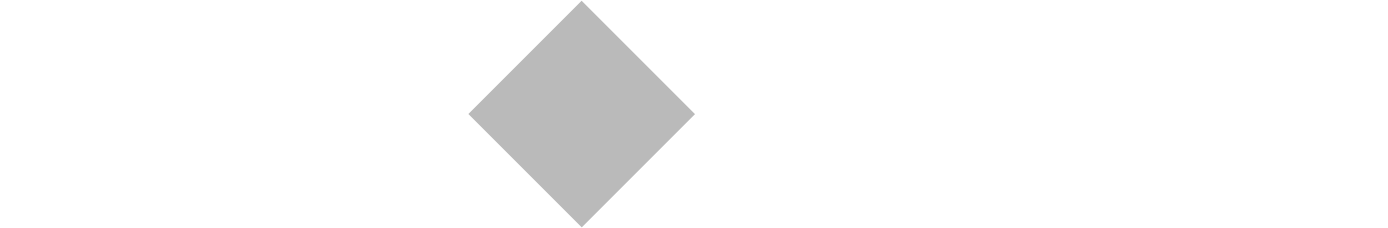
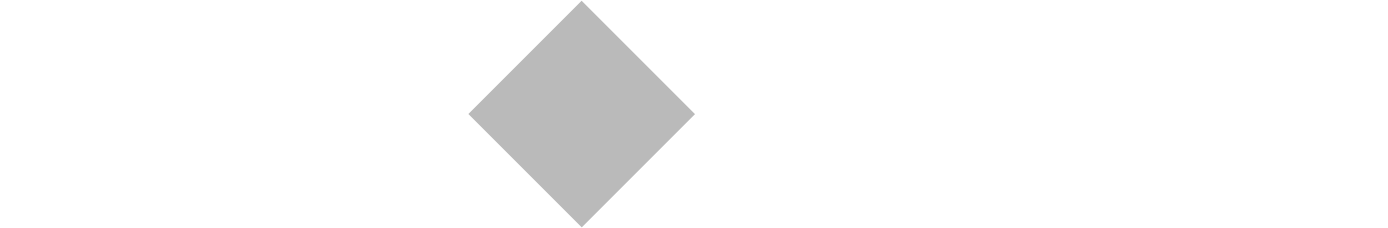
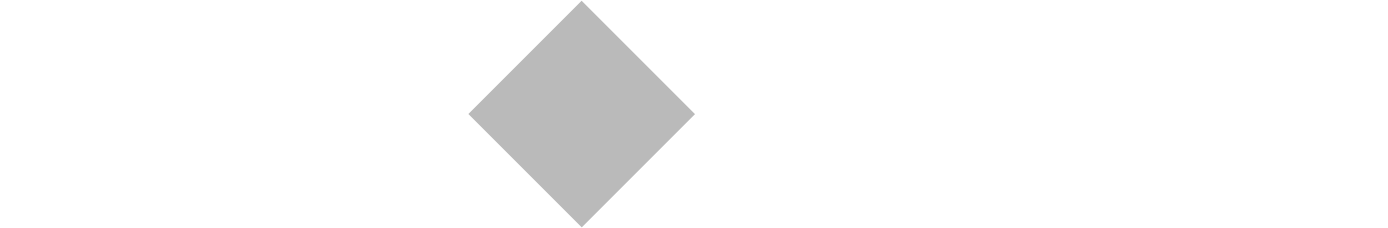
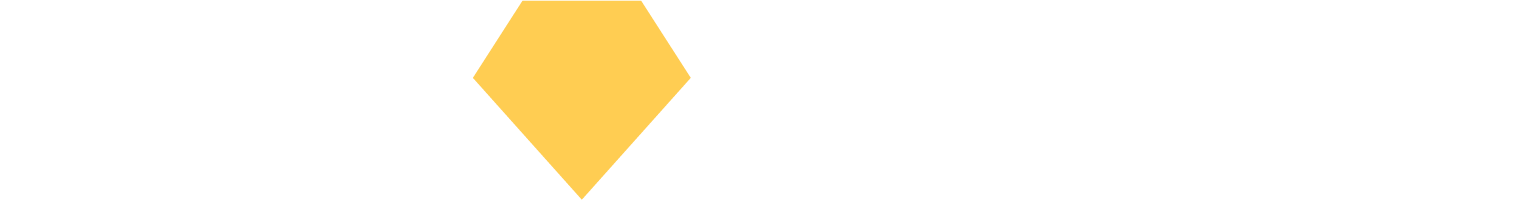
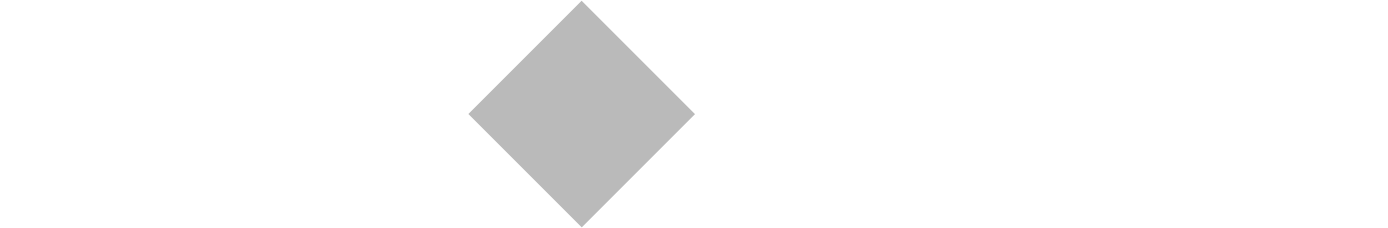
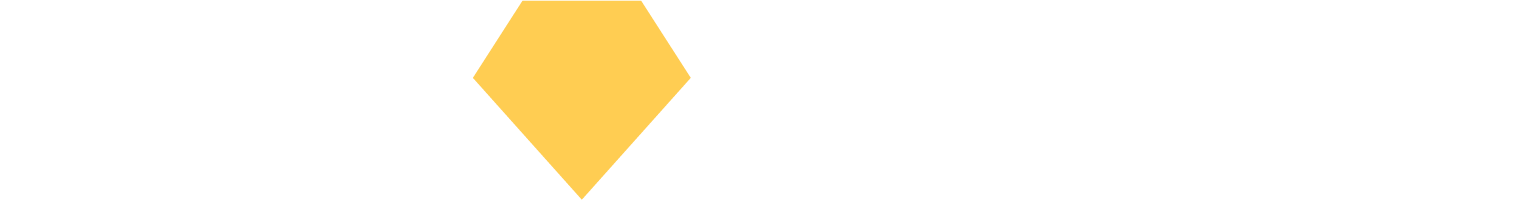
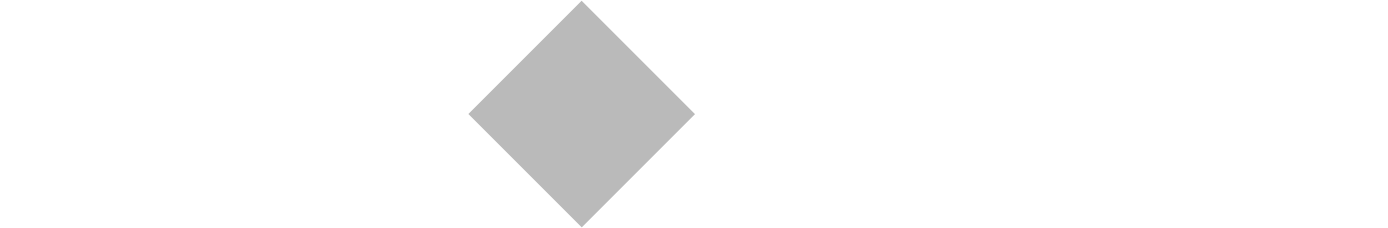
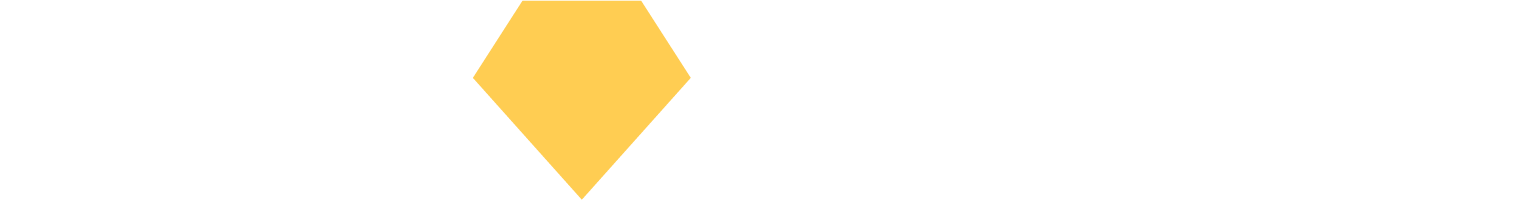
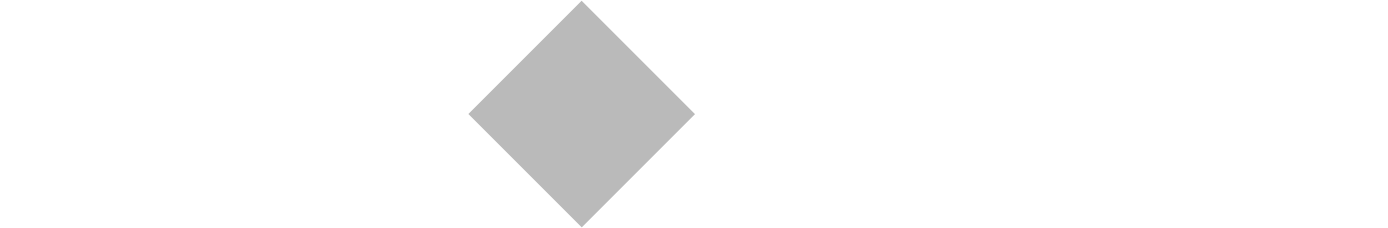
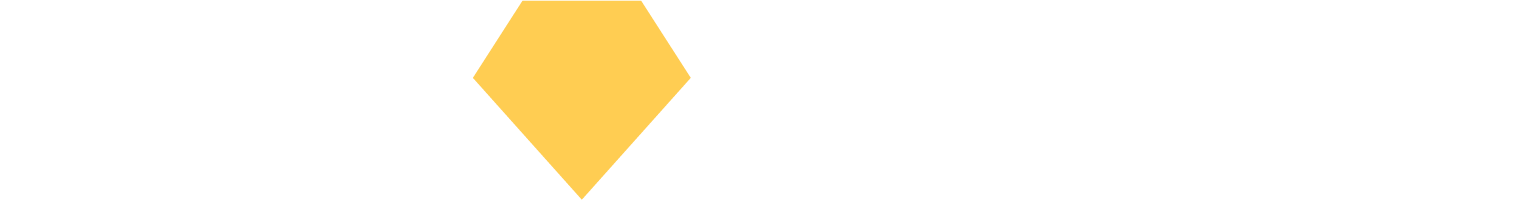
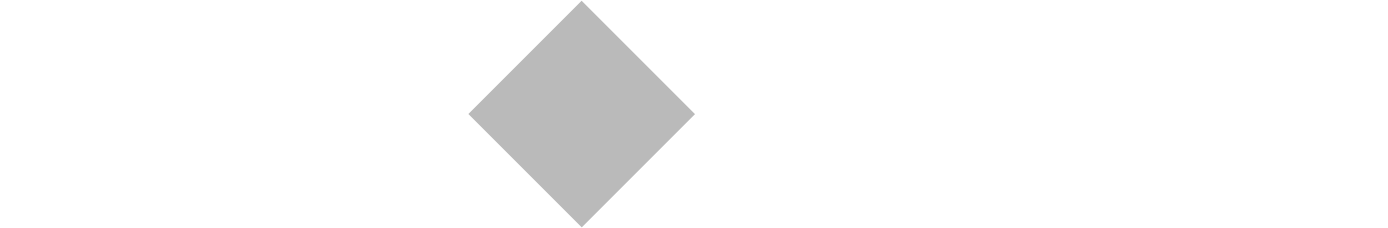
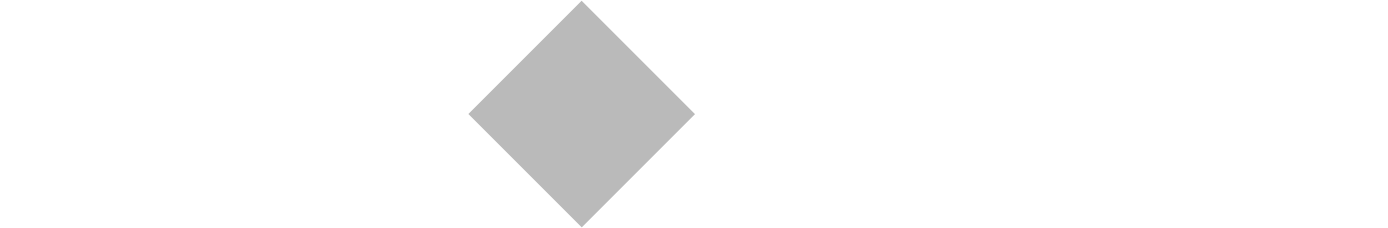
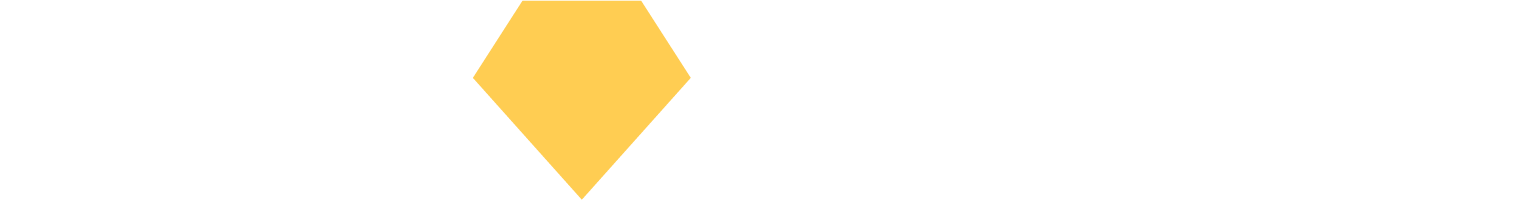
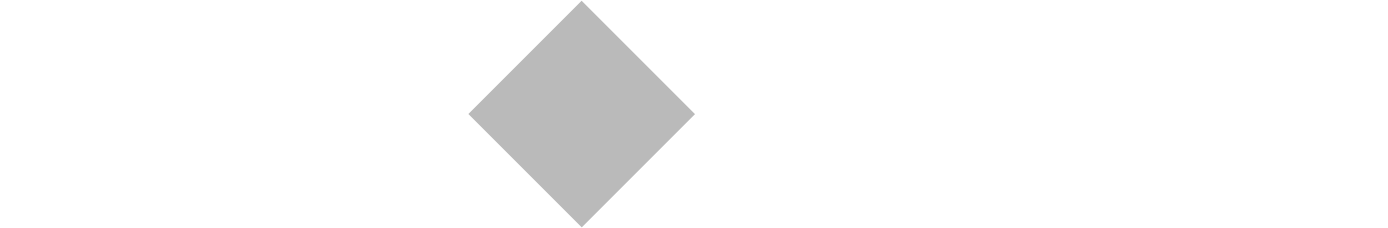
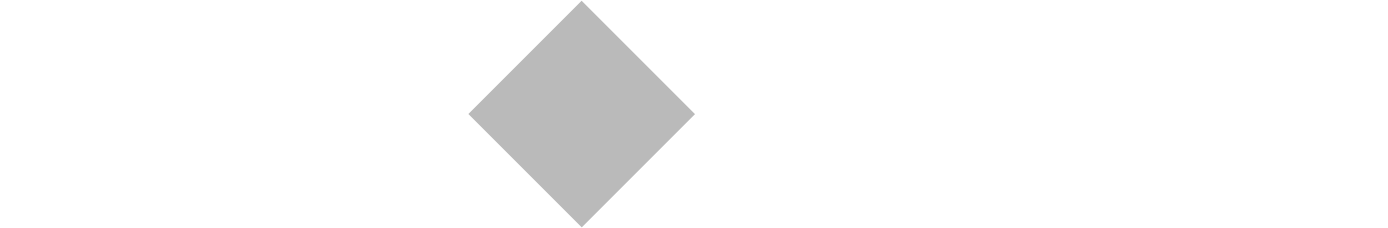
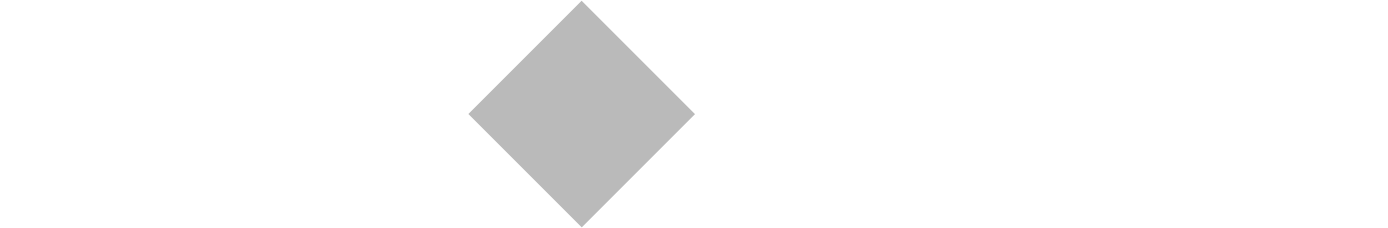
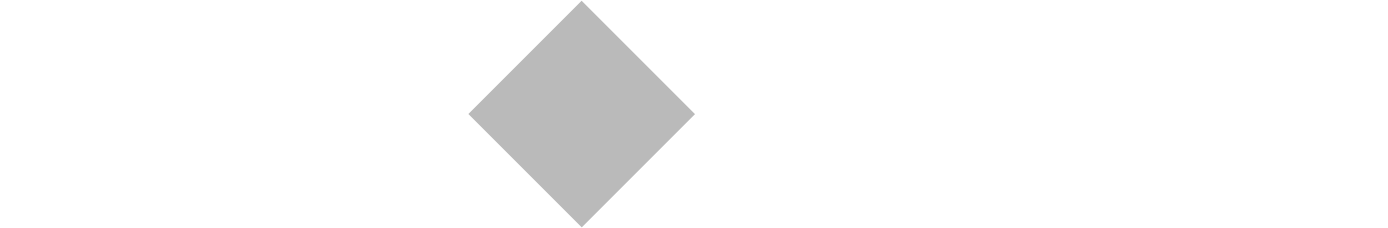
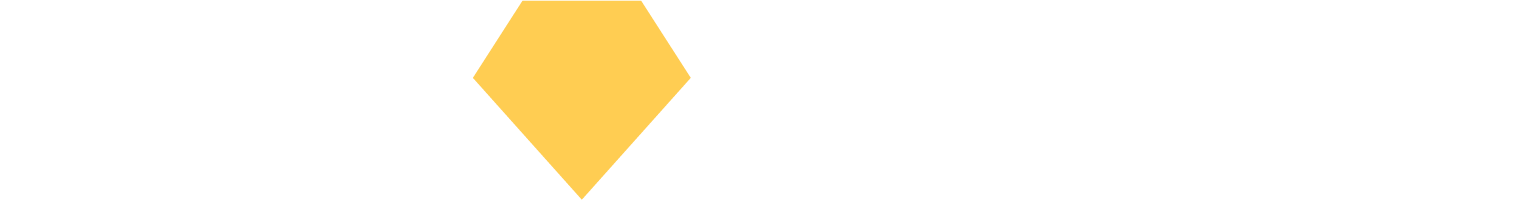
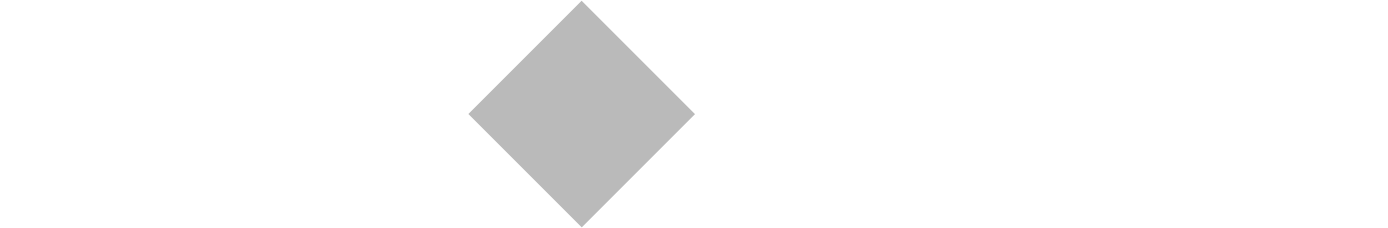
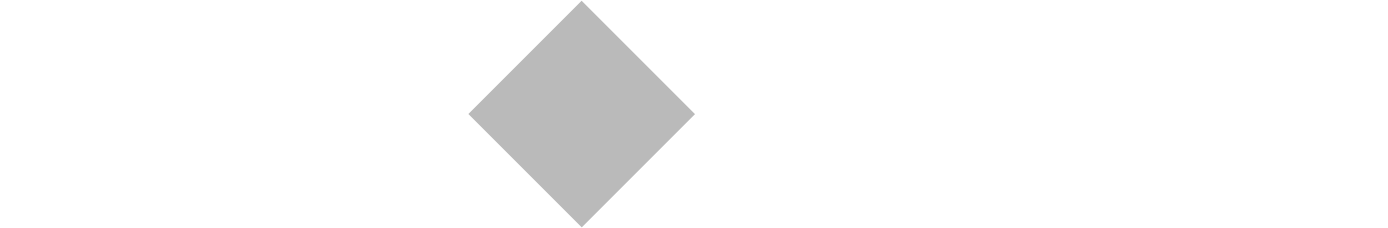
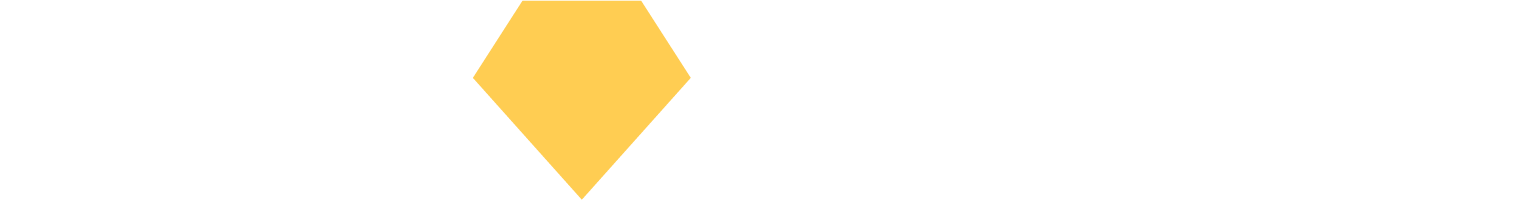
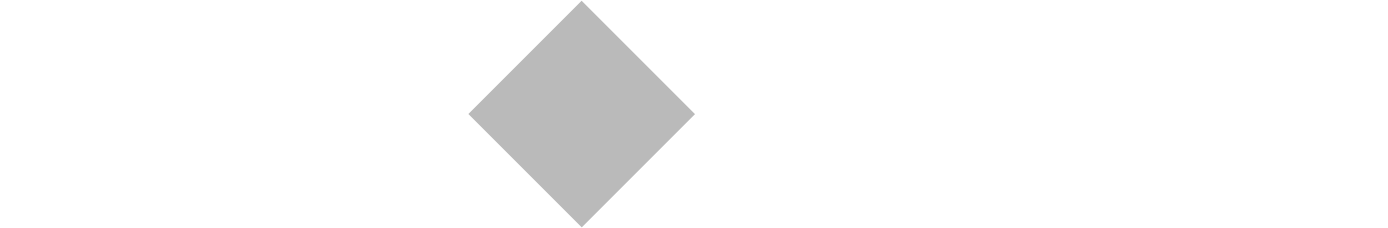
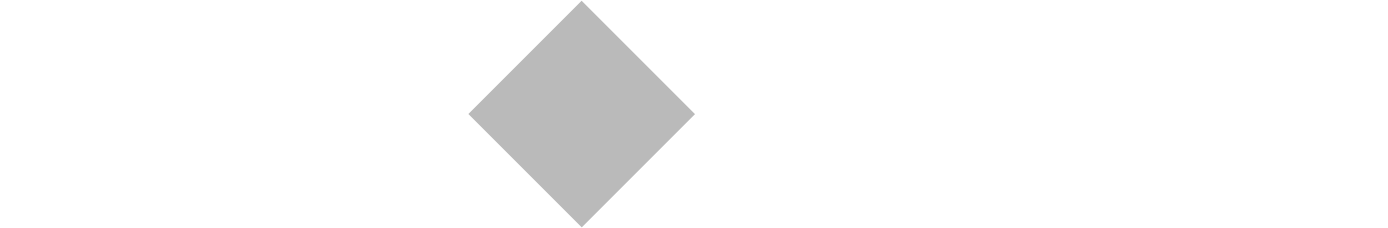
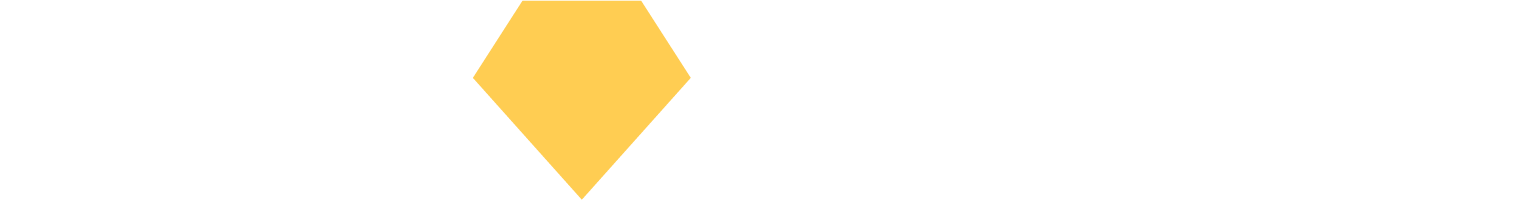
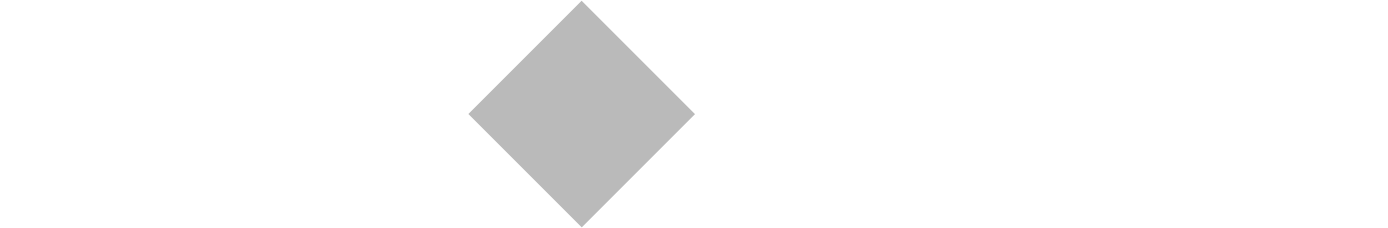
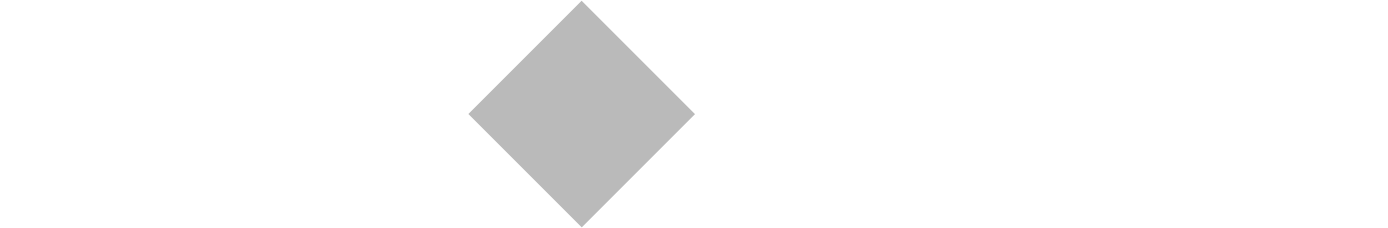
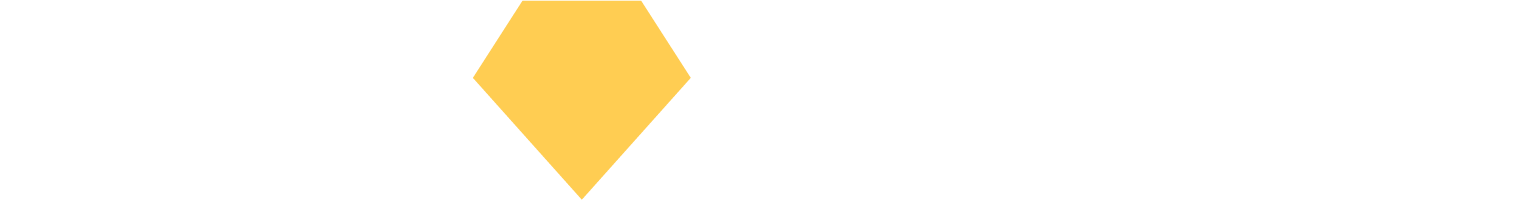
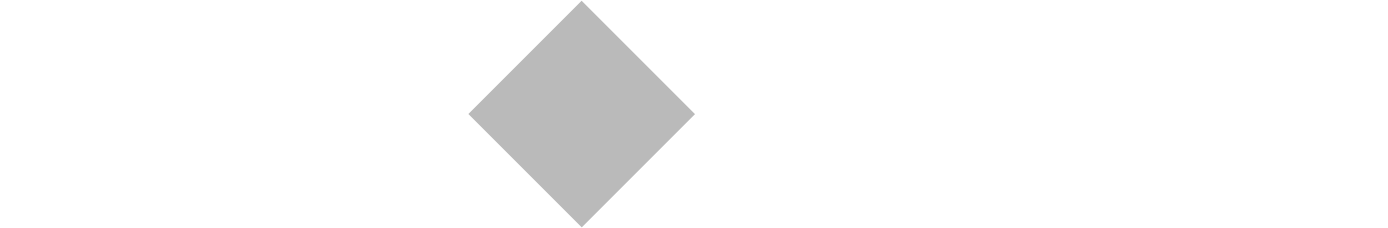
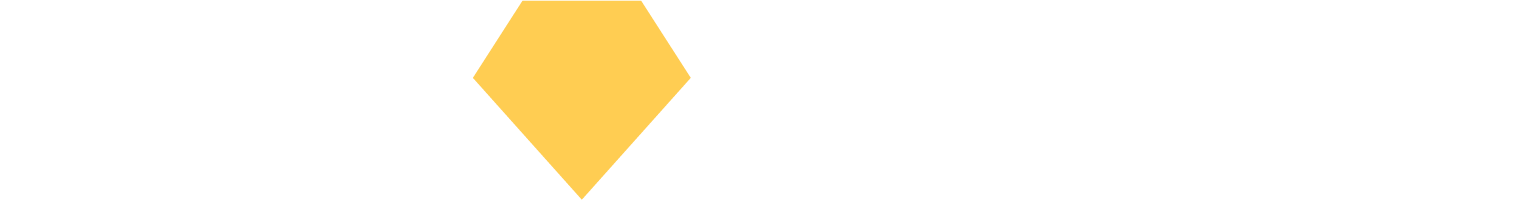
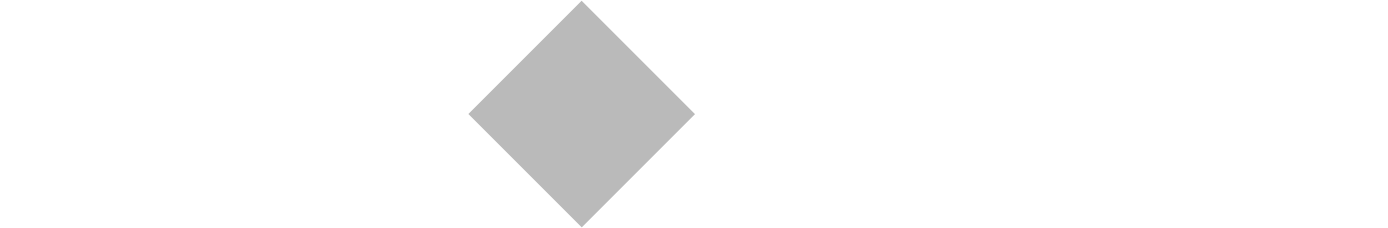
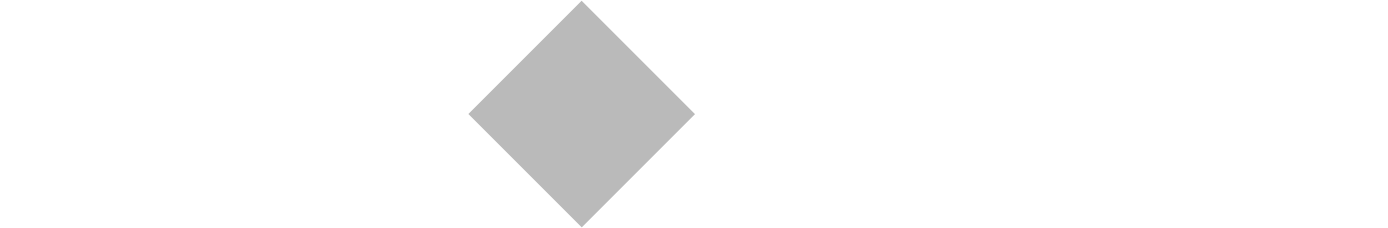
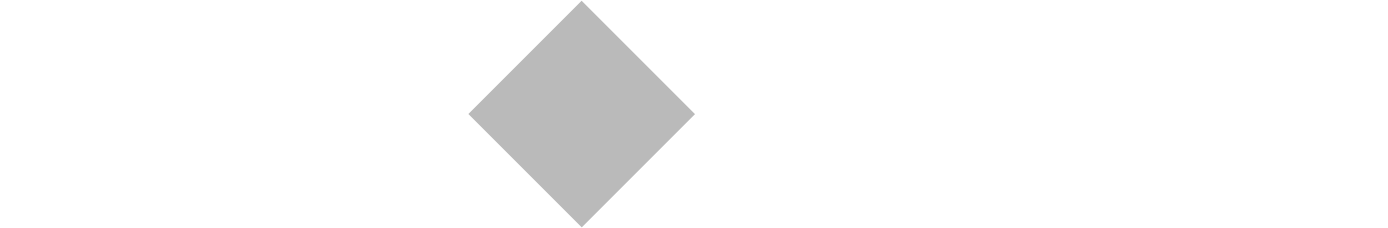
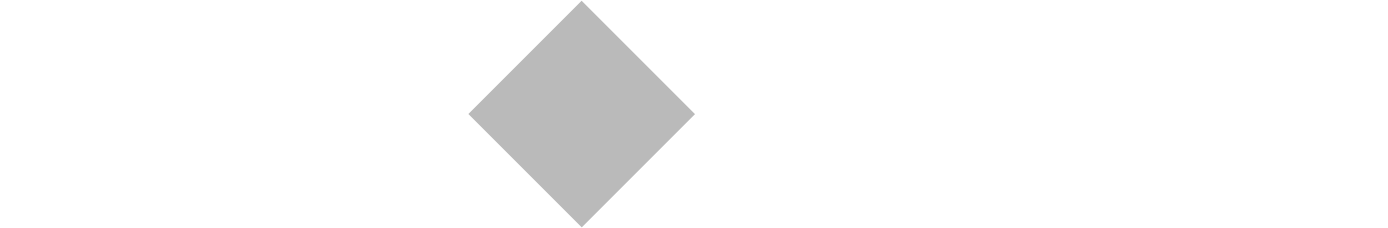
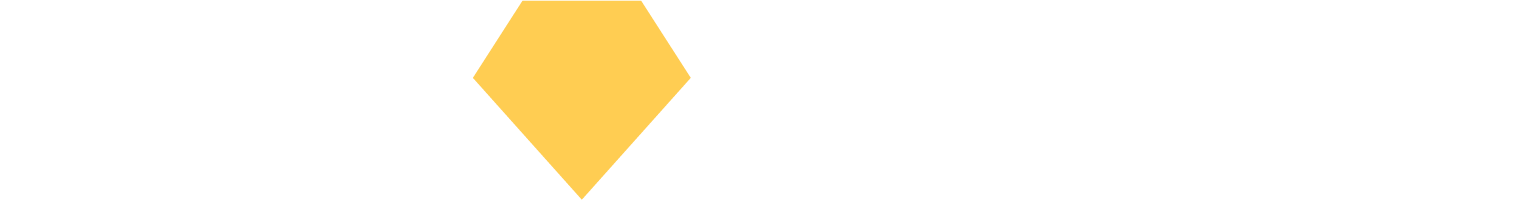
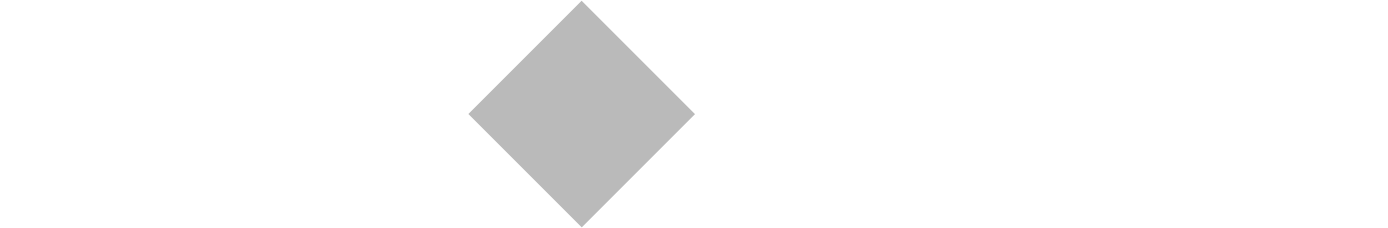
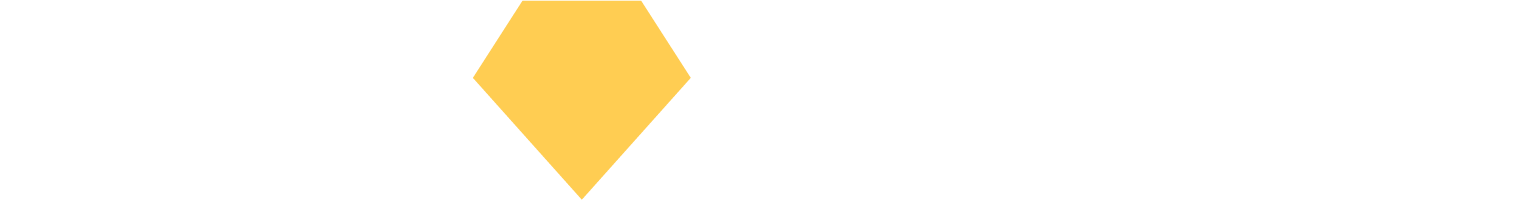
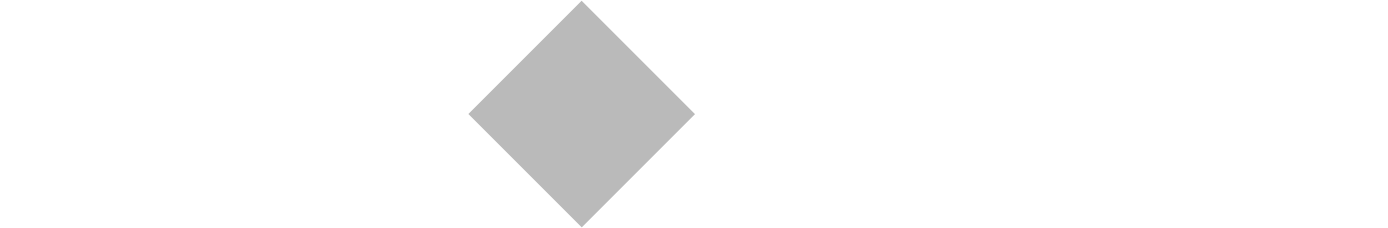
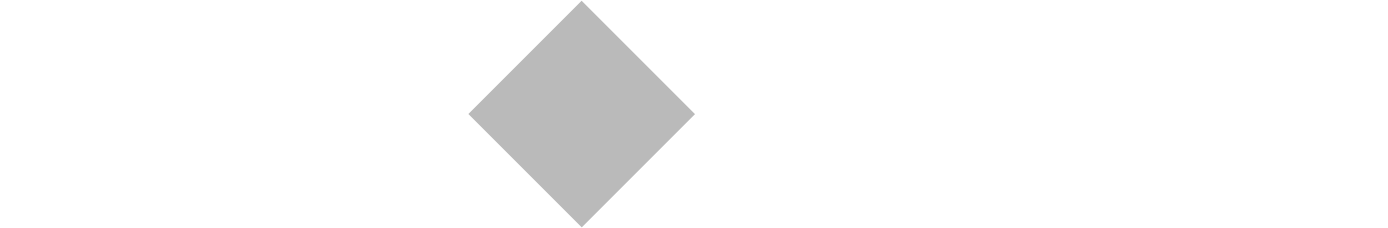
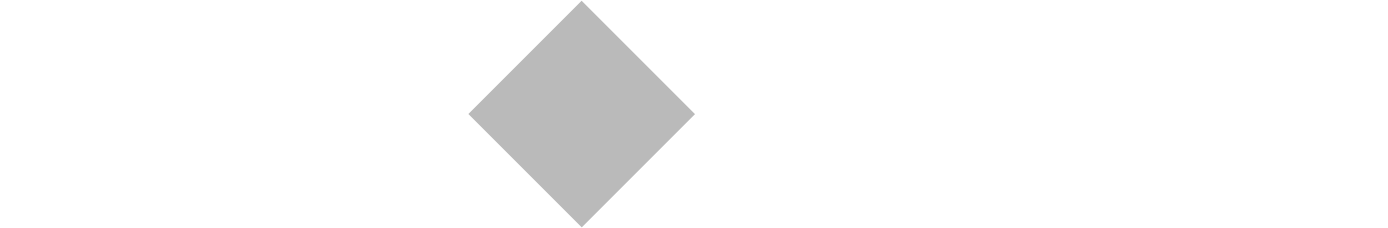
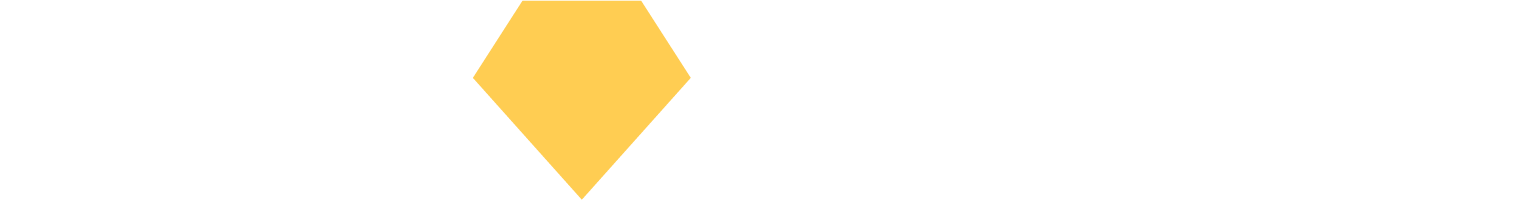
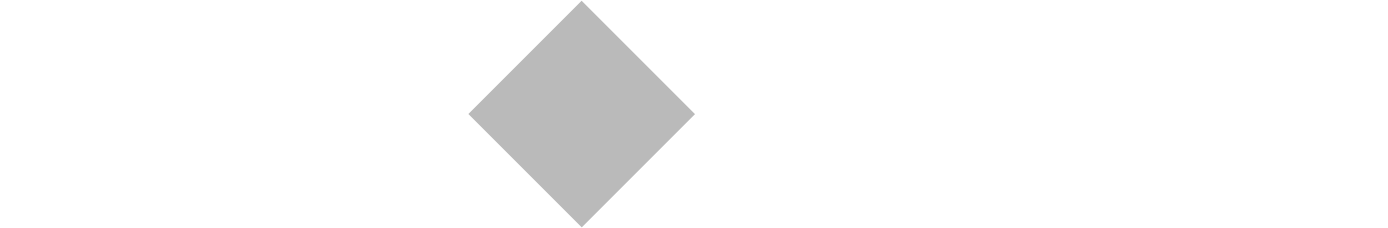
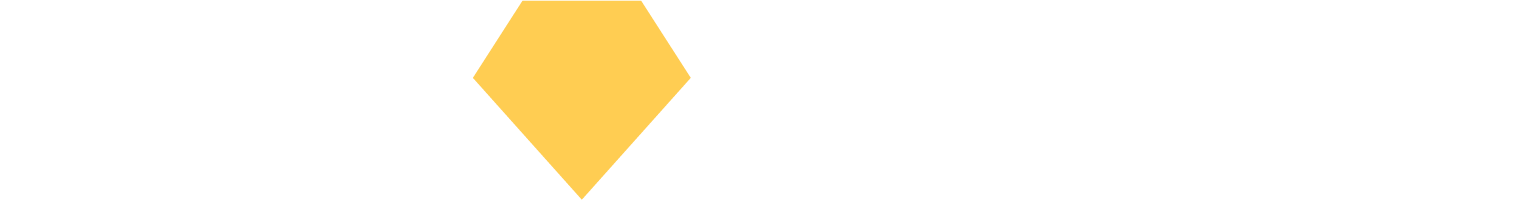
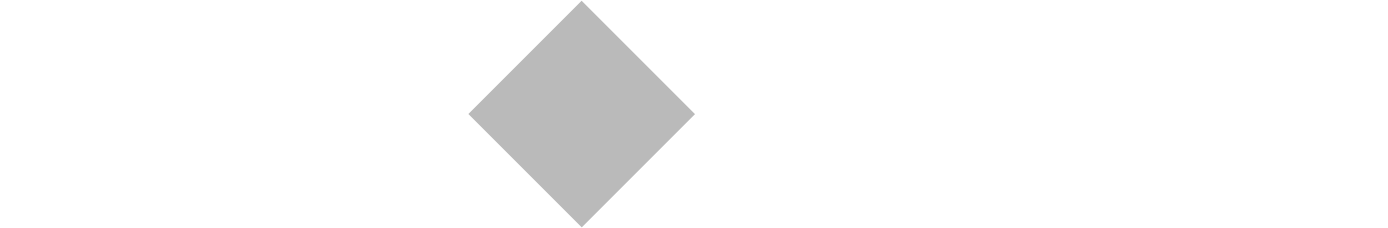
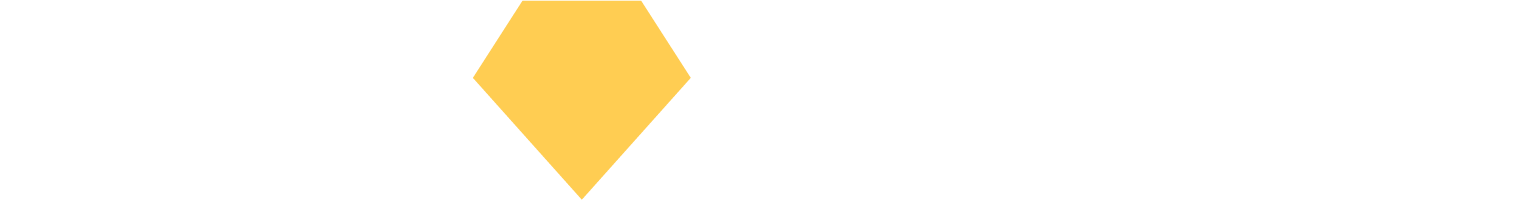
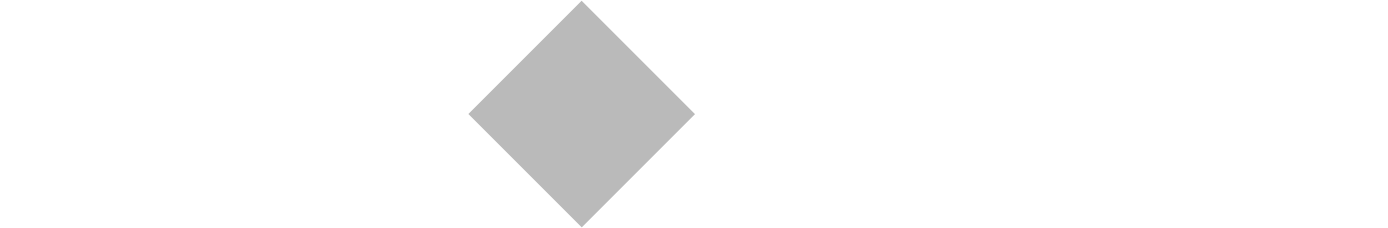
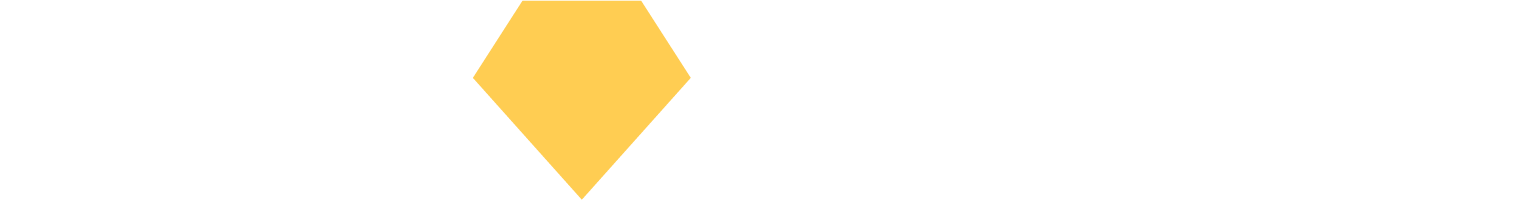
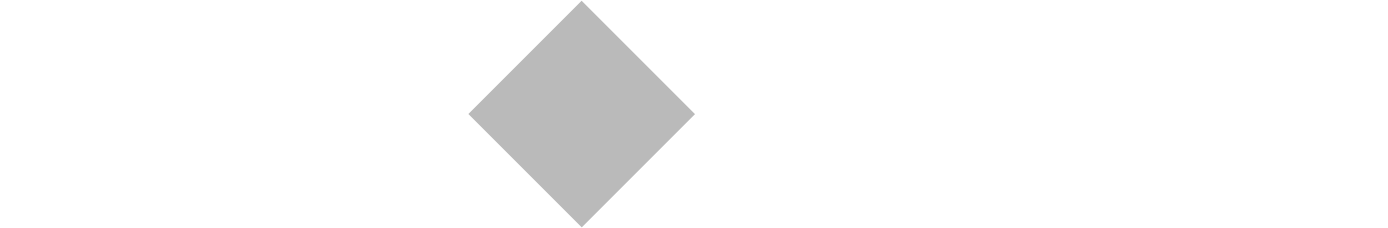
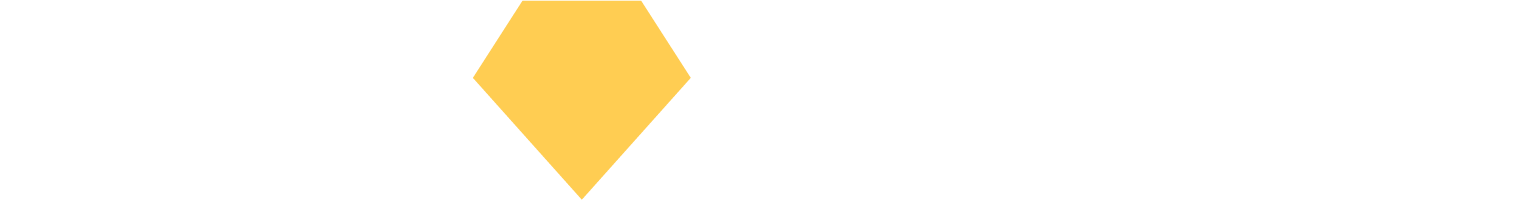
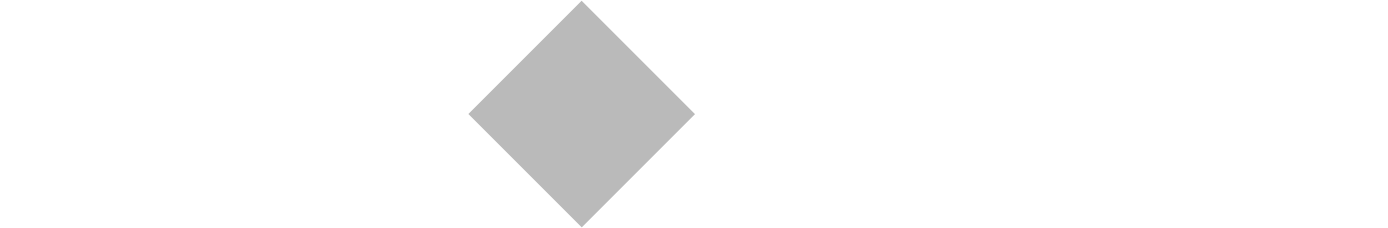
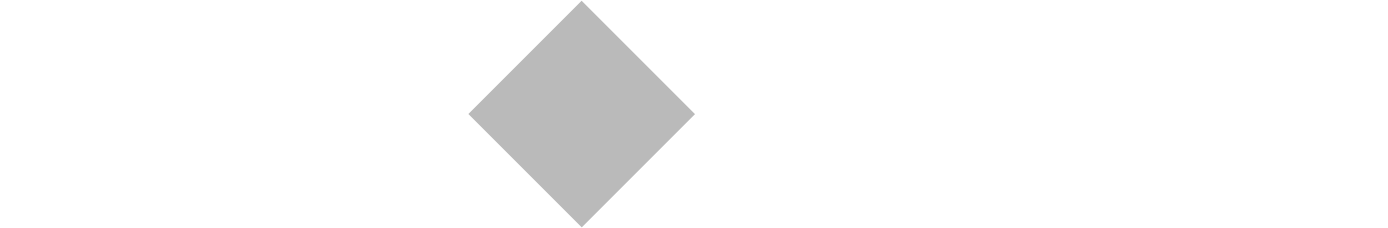
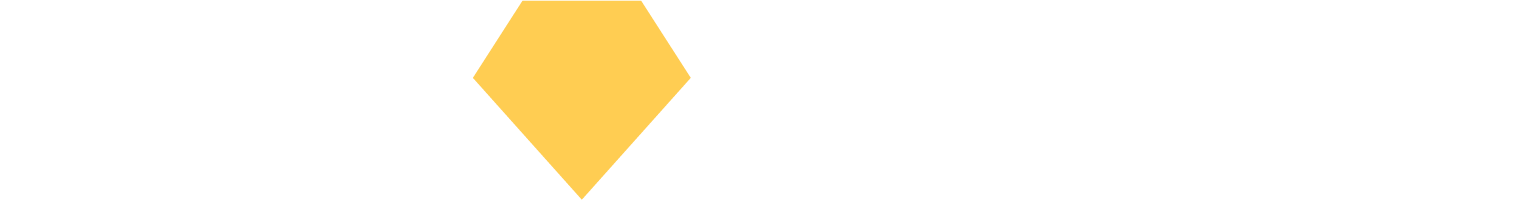
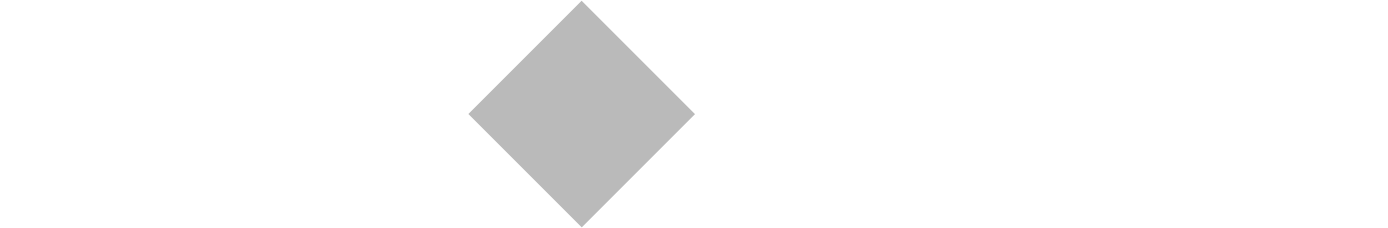
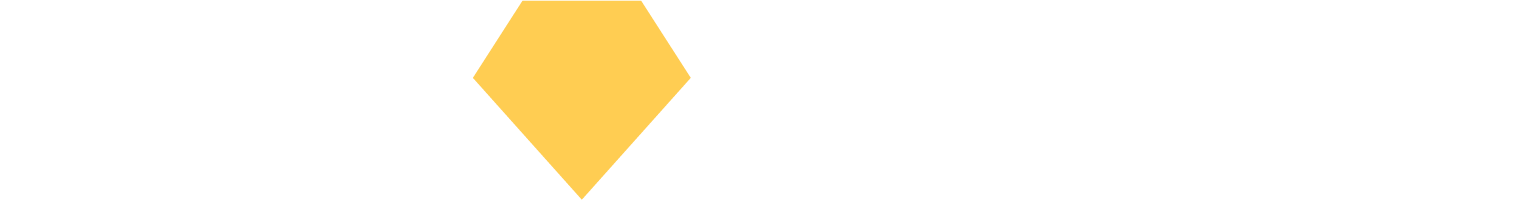
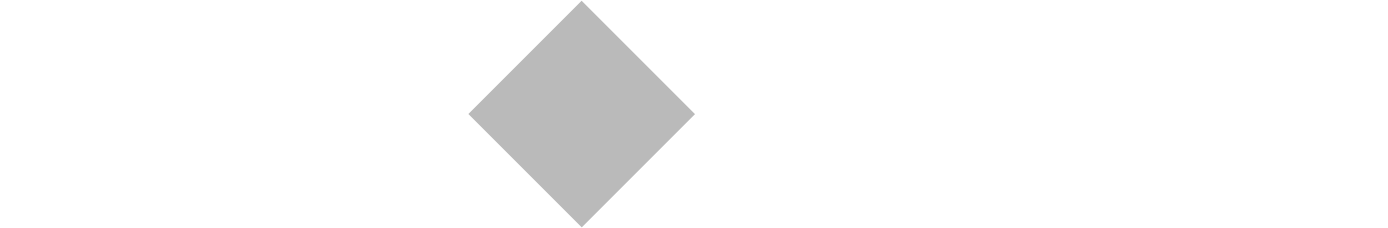
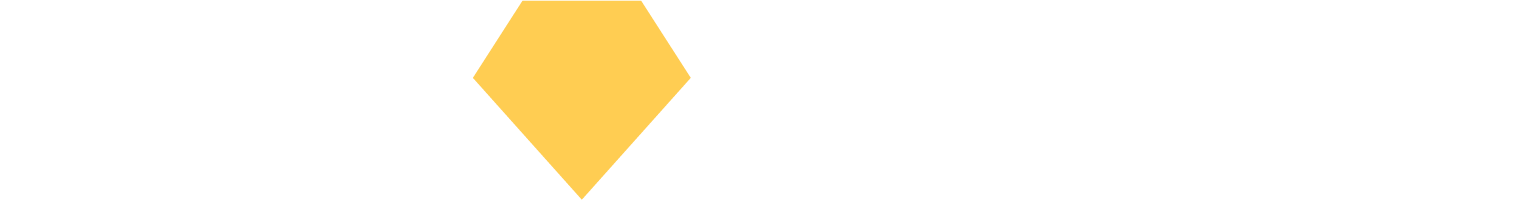
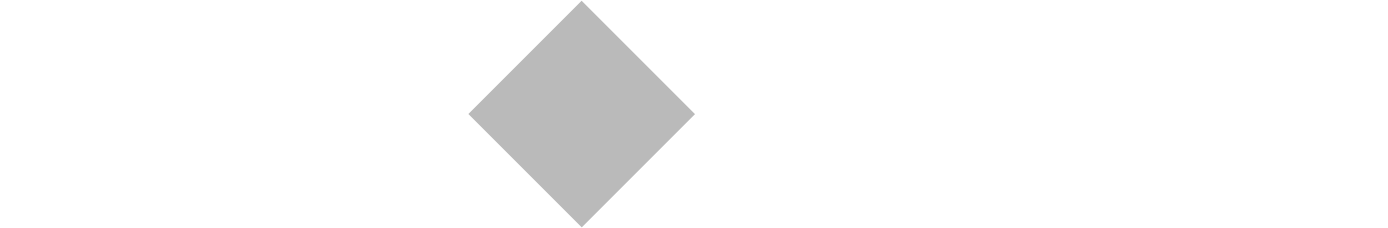
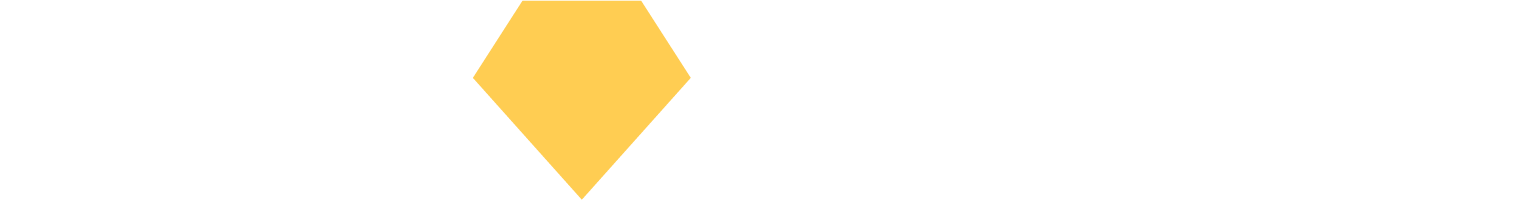
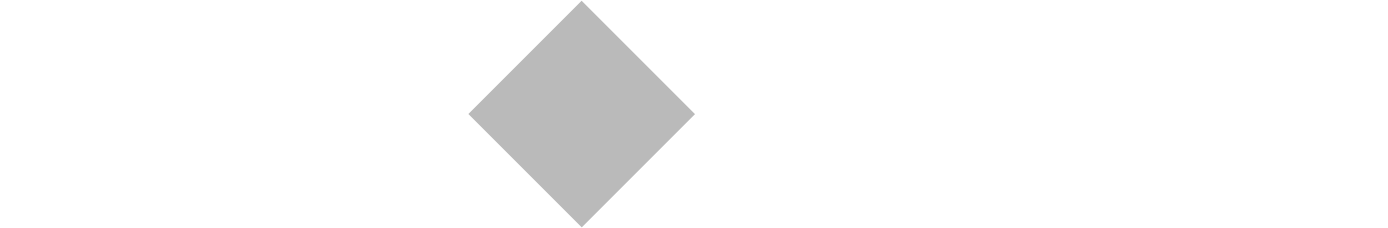
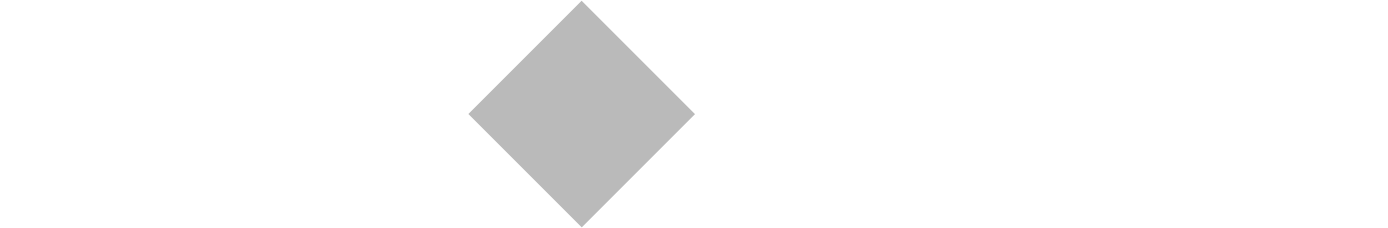
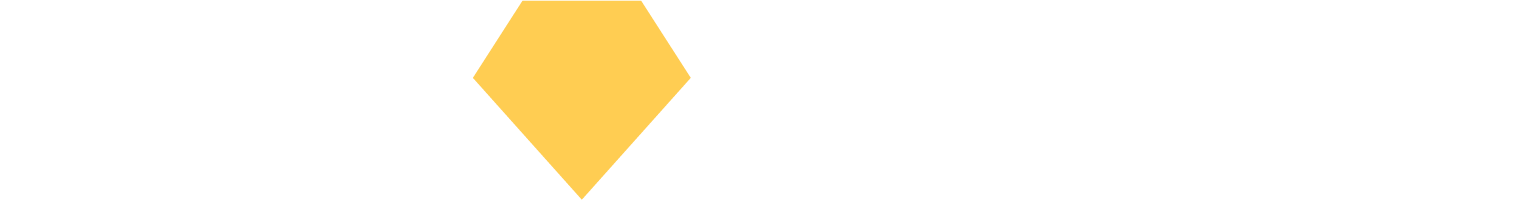
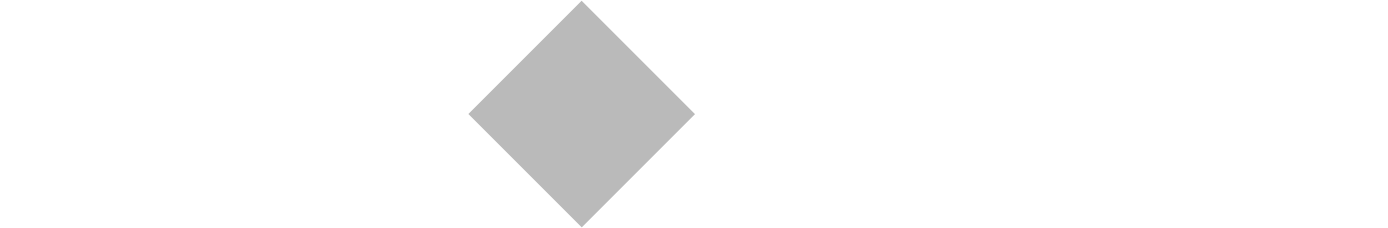
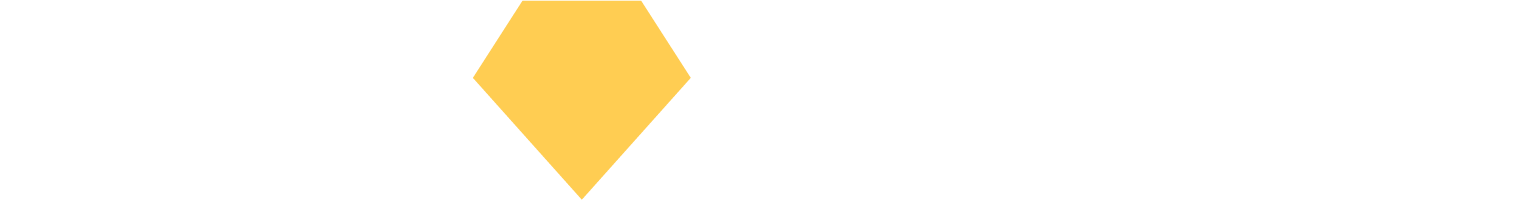
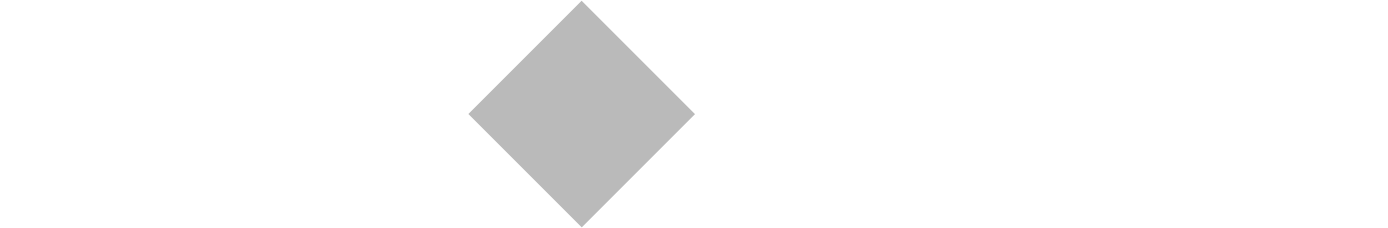
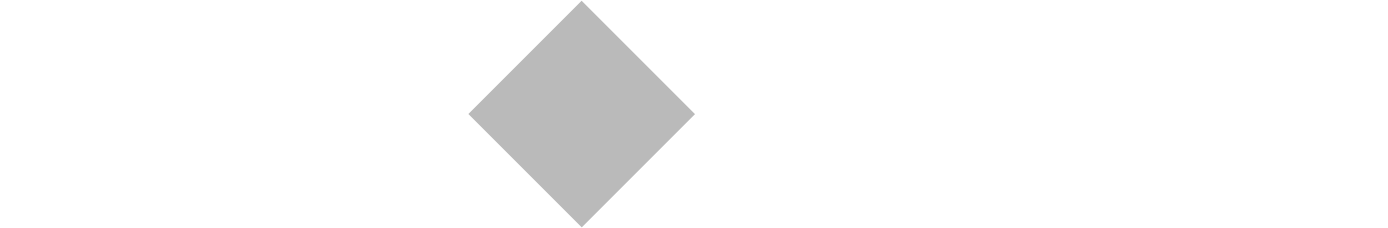
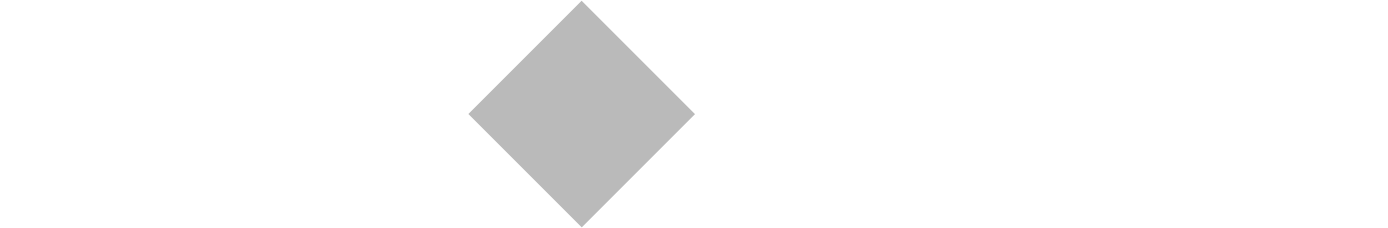
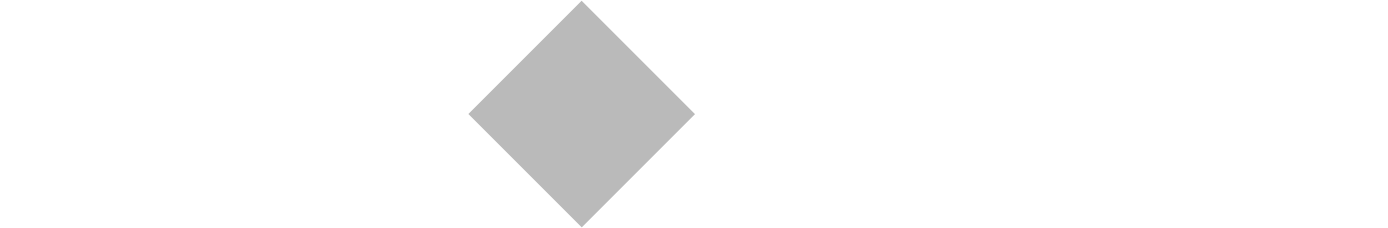
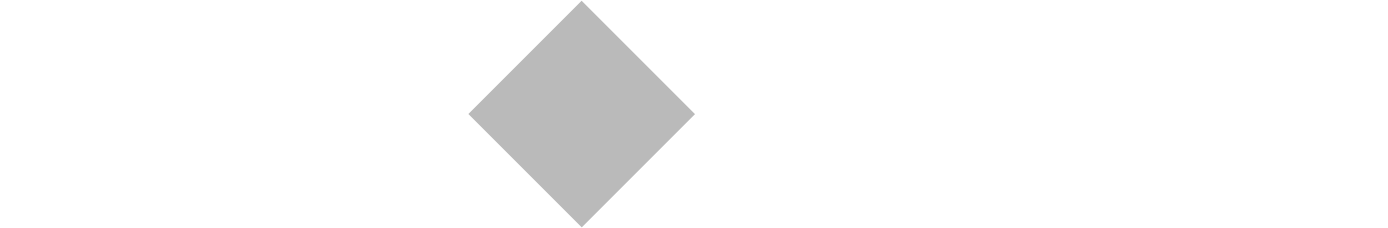
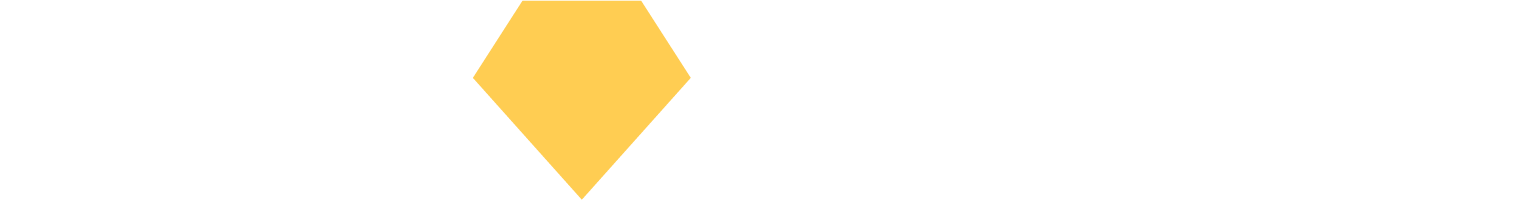
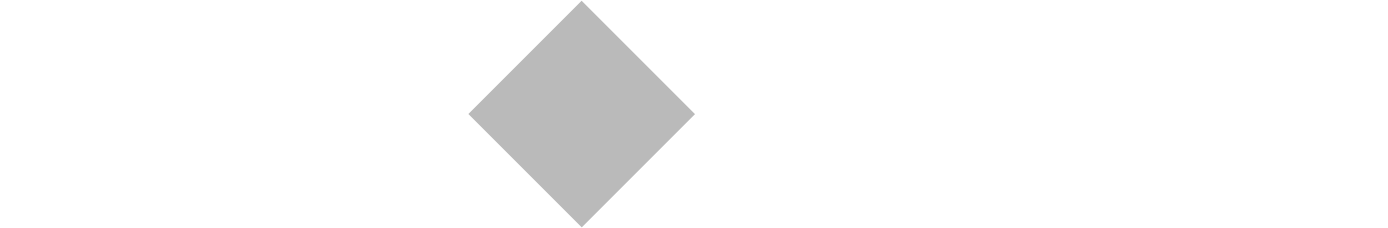
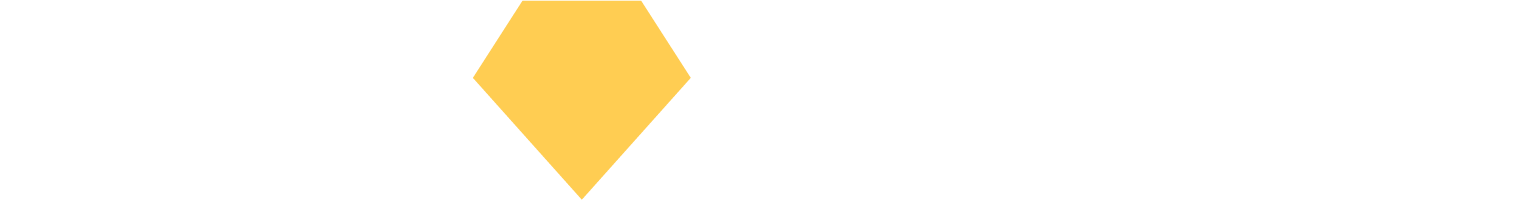
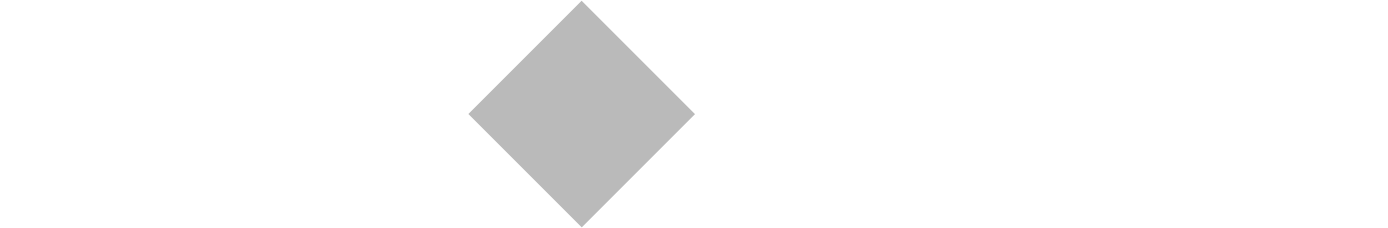
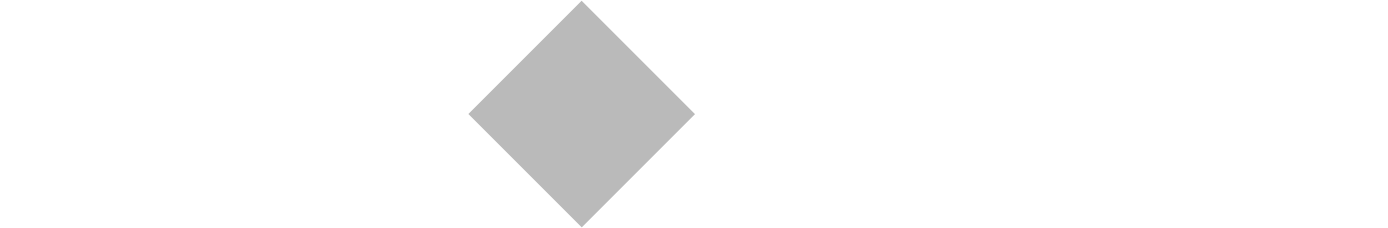
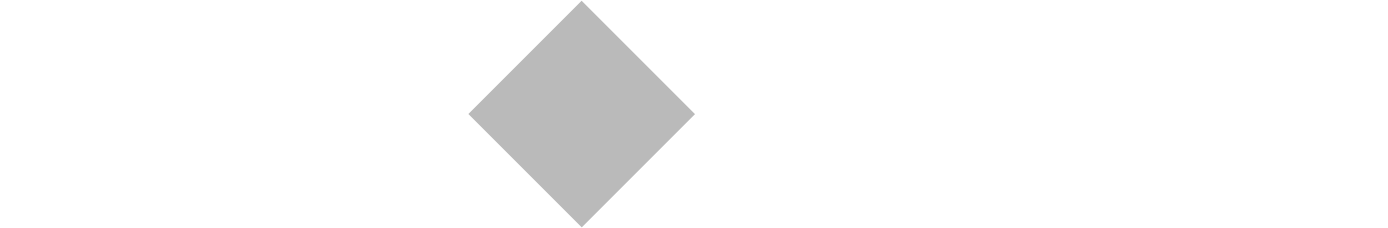
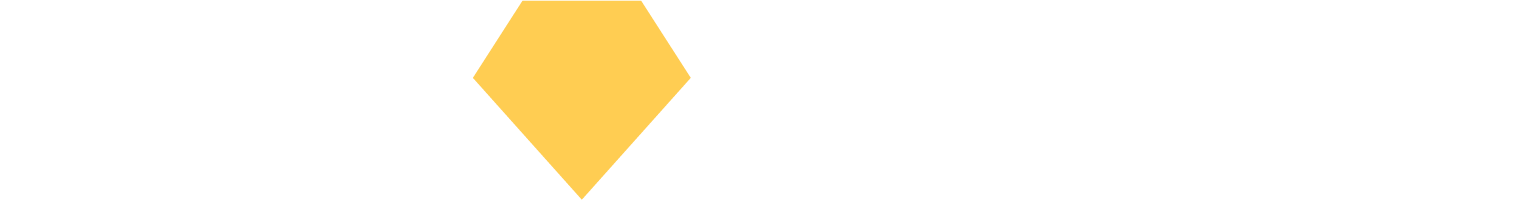
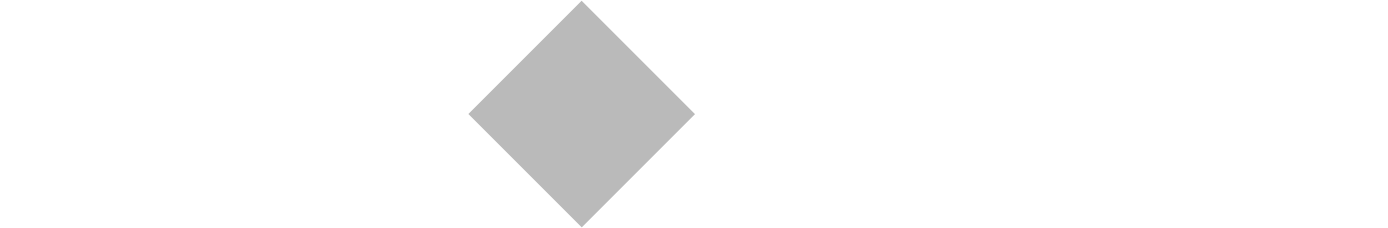
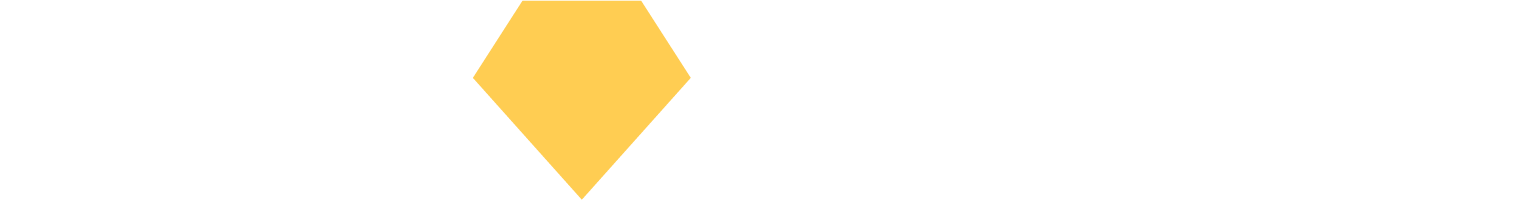
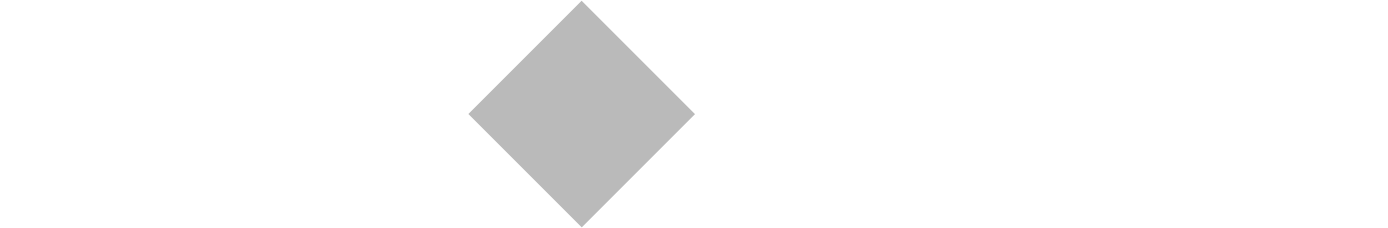
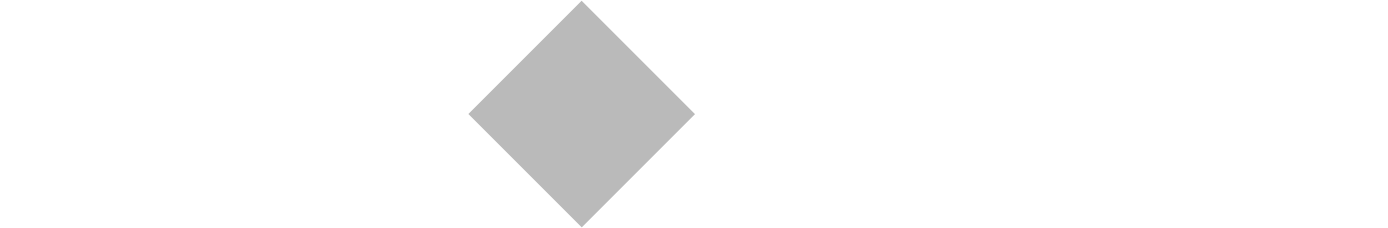
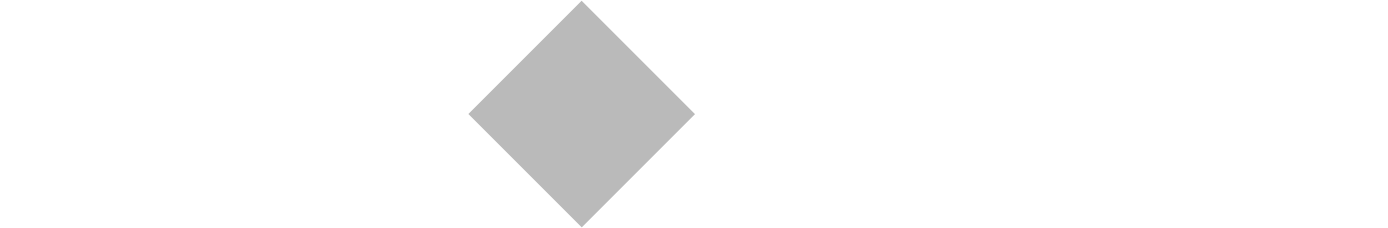
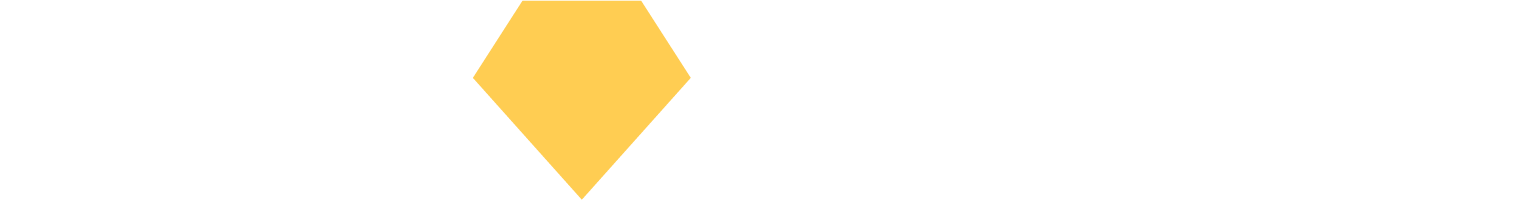
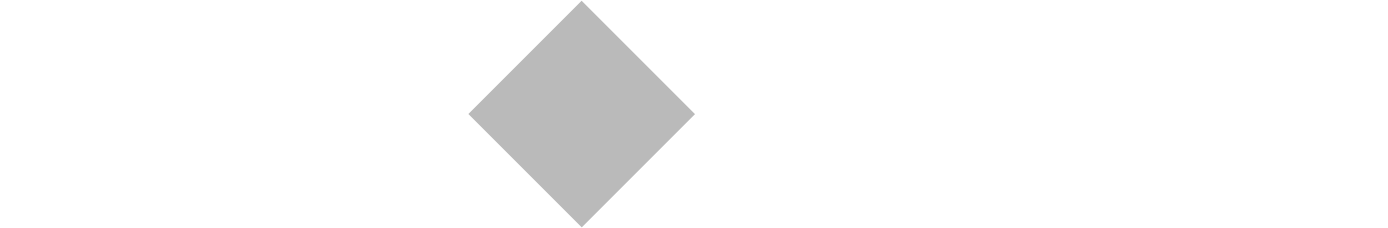
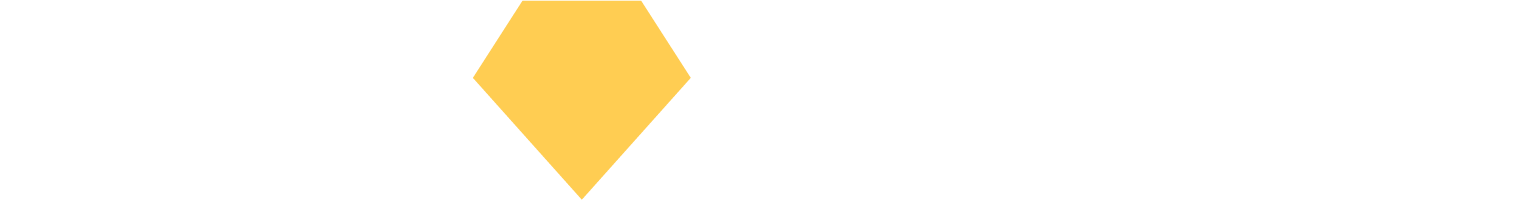
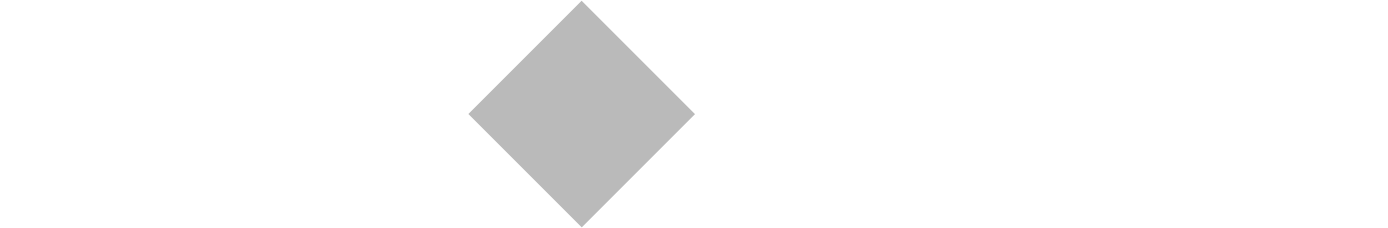
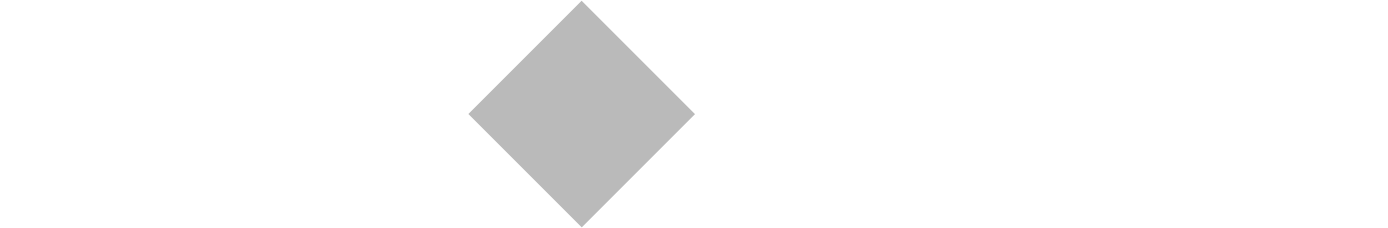
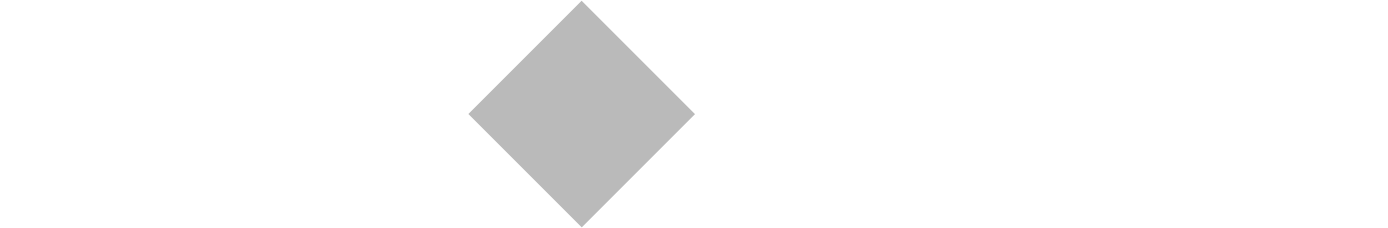
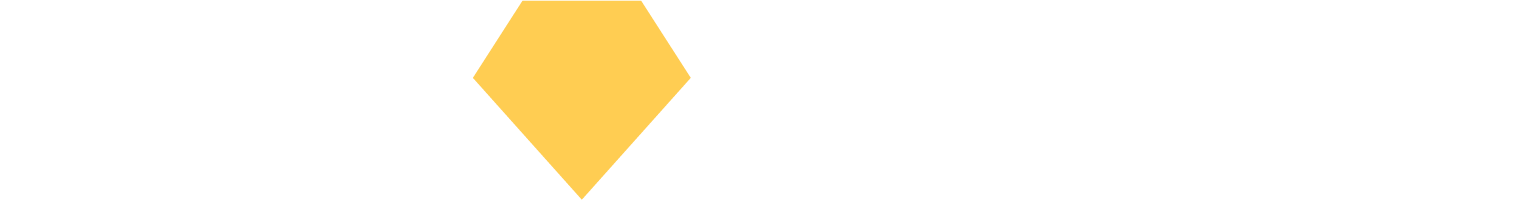
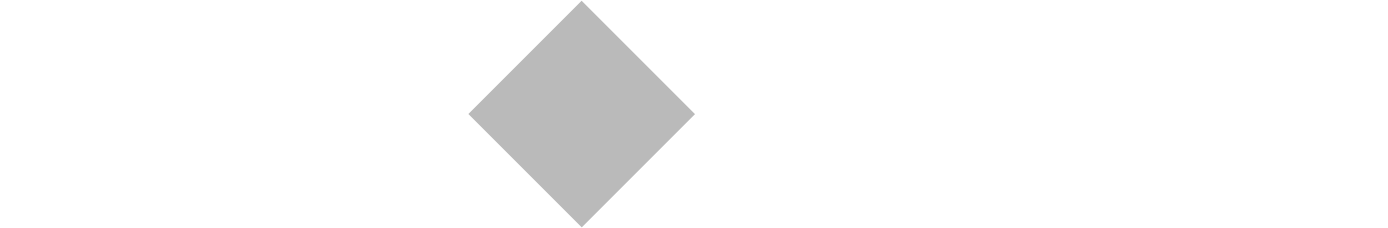
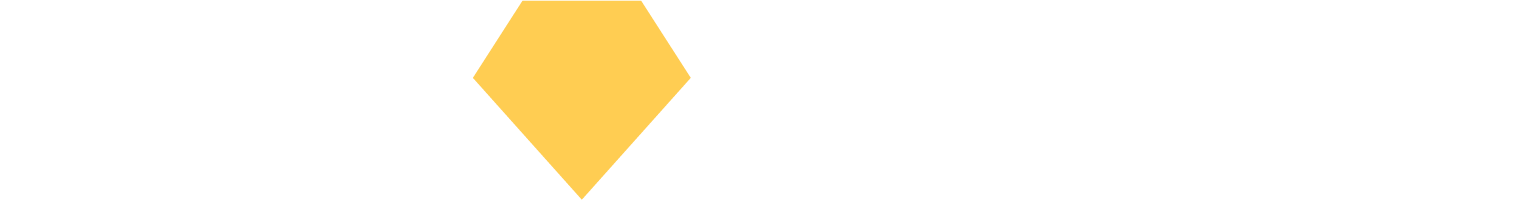
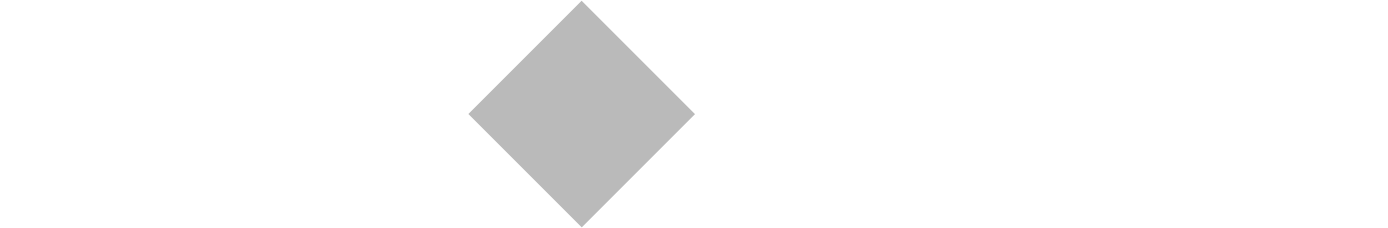
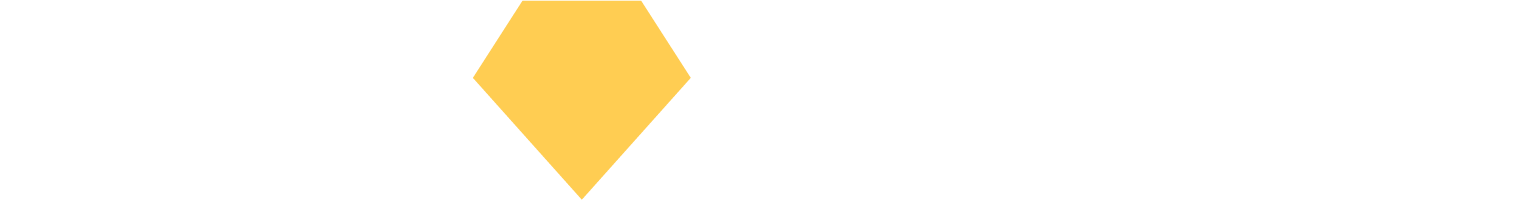
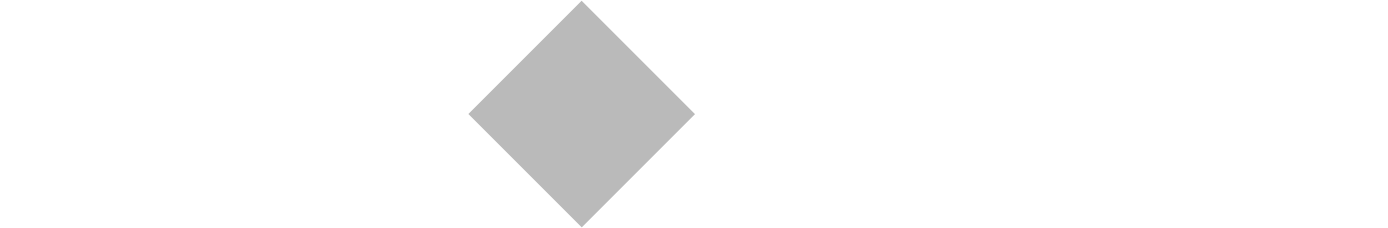
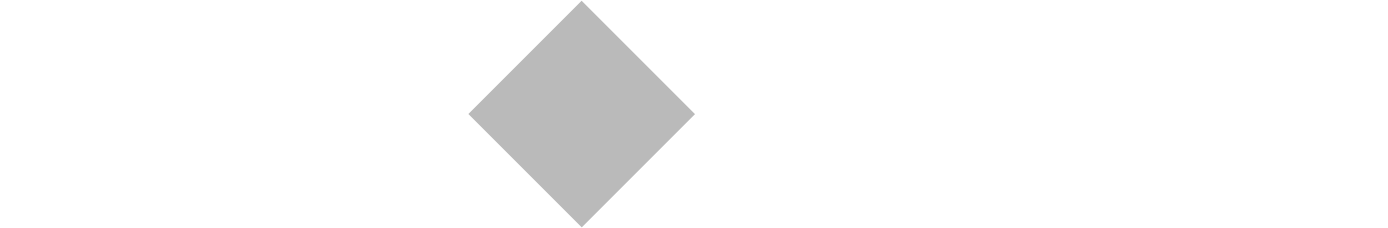
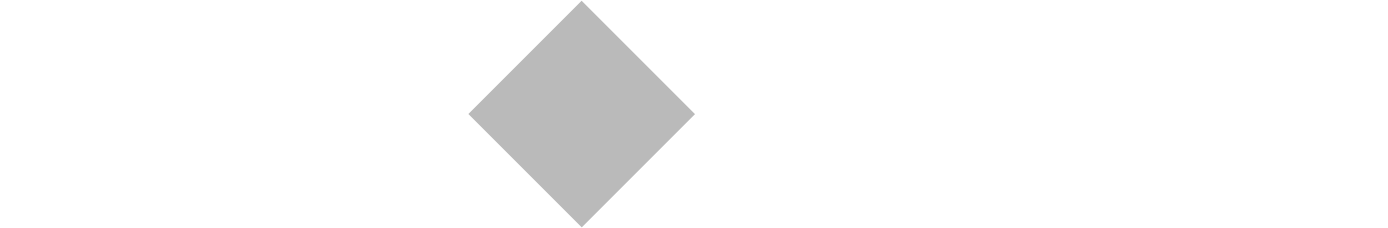
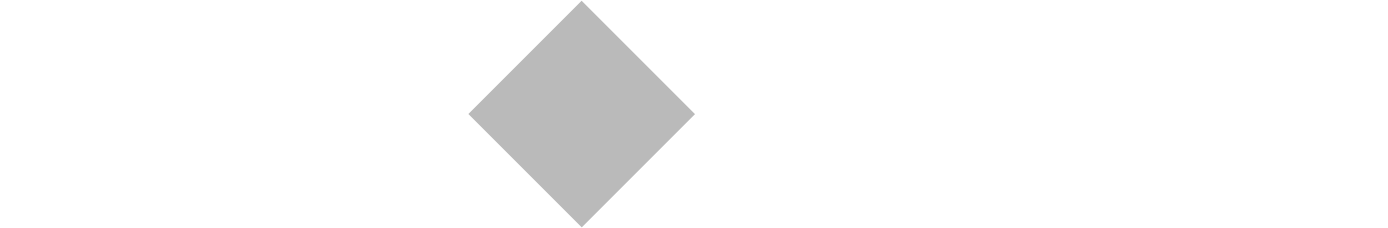
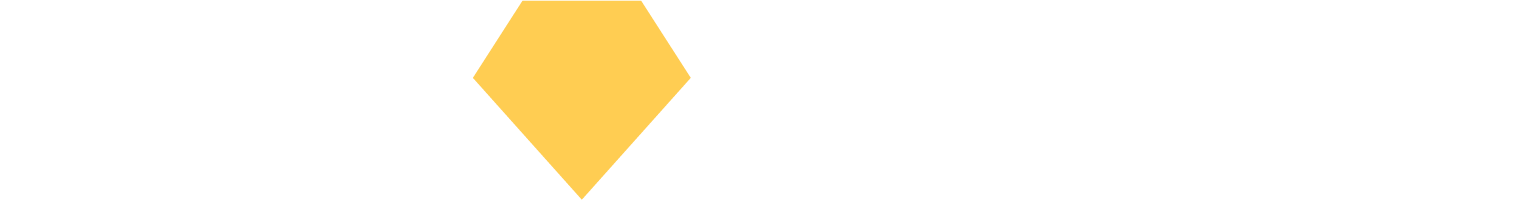
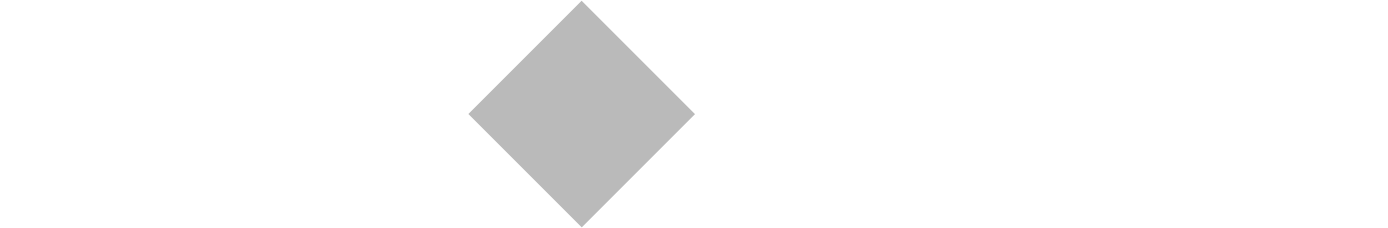
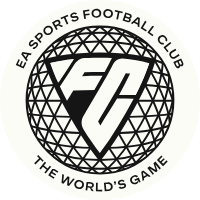

In [3]:
html = getAndParseURL("https://www.ea.com/games/ea-sports-fc/ratings")
html

## 3. Sayfa Linklerinin Elde Edilmesi

In [4]:
html.find("div", {"class":"IconAttribute_attribute__KTIK0 generated_utility2__1zAUs"}).text

'QUICK STEP'

[<picture><source media="screen and (min-width: 1455px)" srcset="https://images.ctfassets.net/rs6bgs1g8dbr/2dFFSztbQ5JLsDFekR56BR/89f3e906fdbb47f466abd34fac4583f7/physical_explosive_sprint_boost_plus.png"/><source media="screen and (min-width: 1024px)" srcset="https://images.ctfassets.net/rs6bgs1g8dbr/2dFFSztbQ5JLsDFekR56BR/89f3e906fdbb47f466abd34fac4583f7/physical_explosive_sprint_boost_plus.png"/><source media="screen and (min-width: 640px)" srcset="https://images.ctfassets.net/rs6bgs1g8dbr/2dFFSztbQ5JLsDFekR56BR/89f3e906fdbb47f466abd34fac4583f7/physical_explosive_sprint_boost_plus.png"/><source media="screen and (min-width: 0px)" srcset="https://images.ctfassets.net/rs6bgs1g8dbr/2dFFSztbQ5JLsDFekR56BR/89f3e906fdbb47f466abd34fac4583f7/physical_explosive_sprint_boost_plus.png"/><img alt="" class="Picture_image__H5fmC" loading="lazy" src="https://images.ctfassets.net/rs6bgs1g8dbr/2dFFSztbQ5JLsDFekR56BR/89f3e906fdbb47f466abd34fac4583f7/physical_explosive_sprint_boost_plus.png" style="he
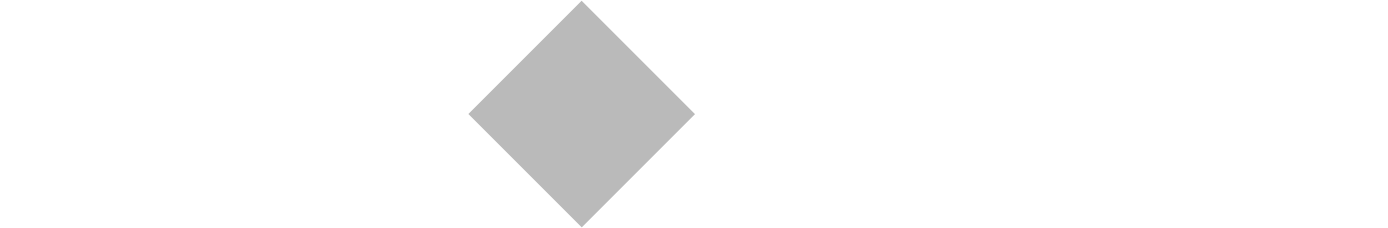
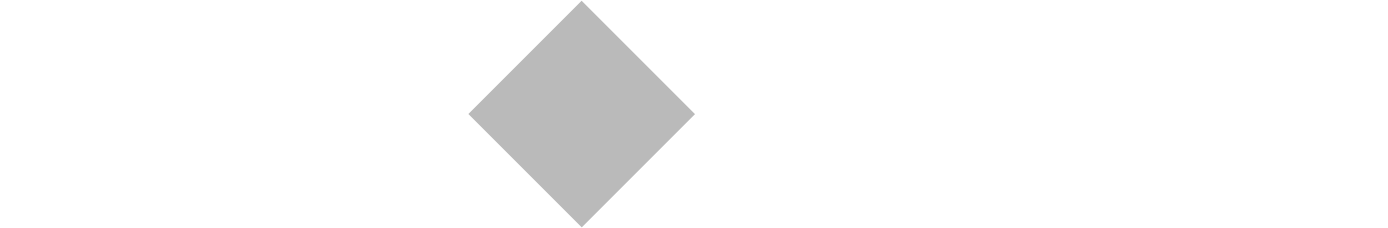
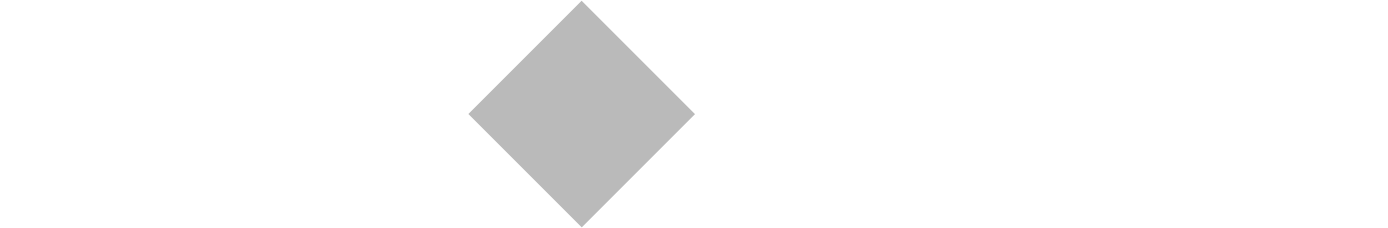
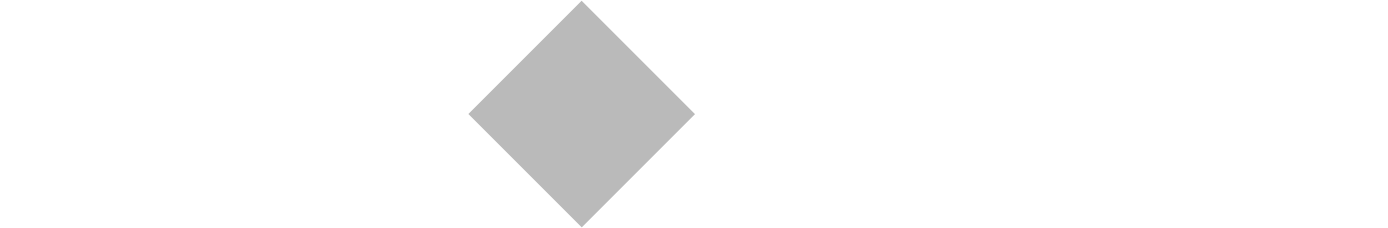
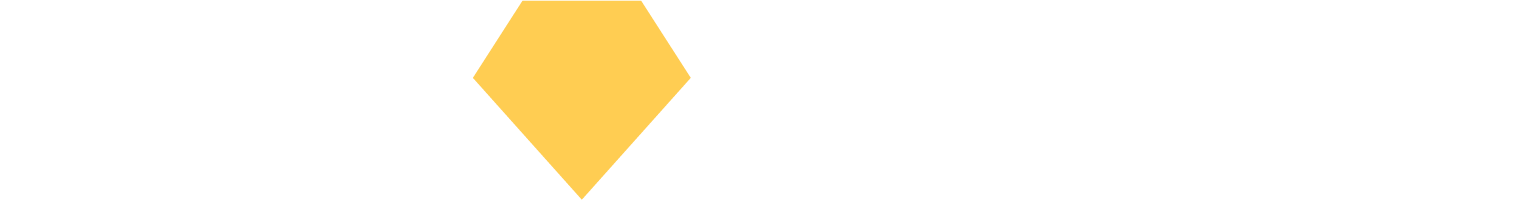
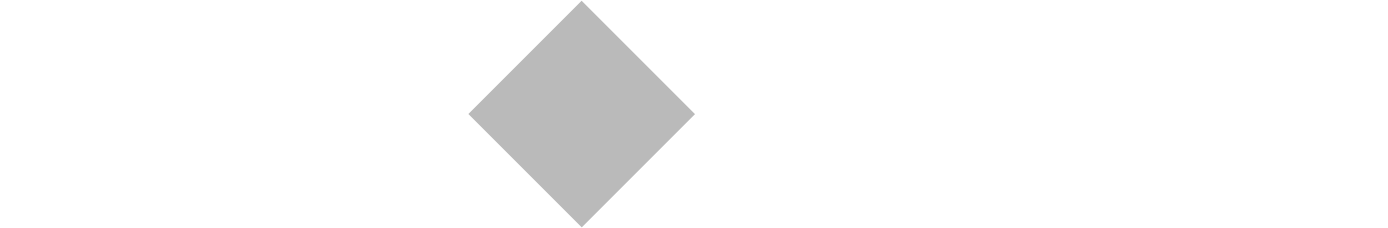
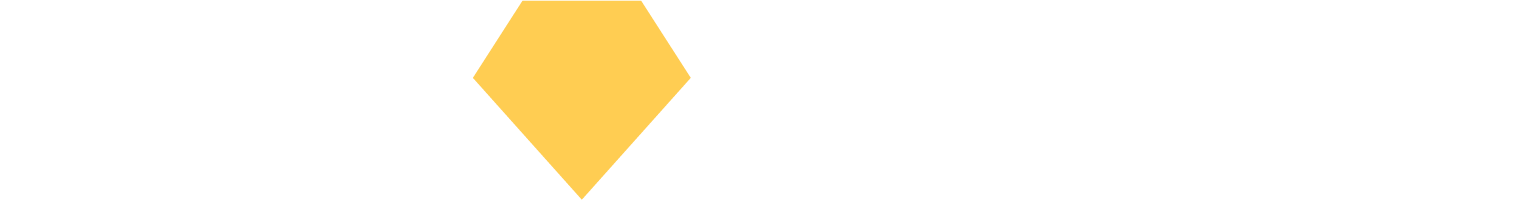
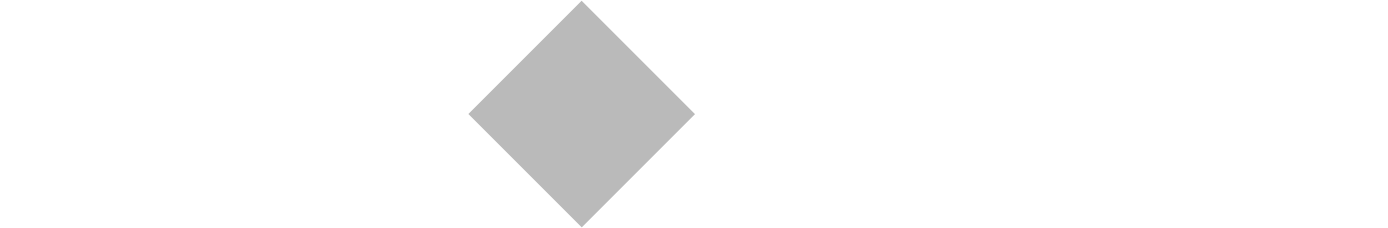
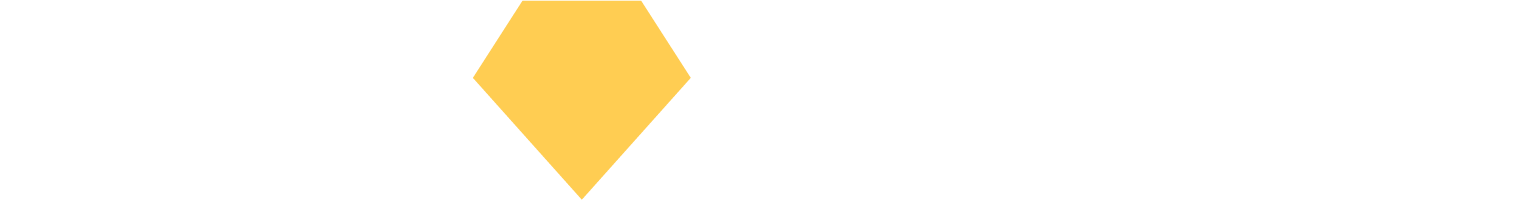
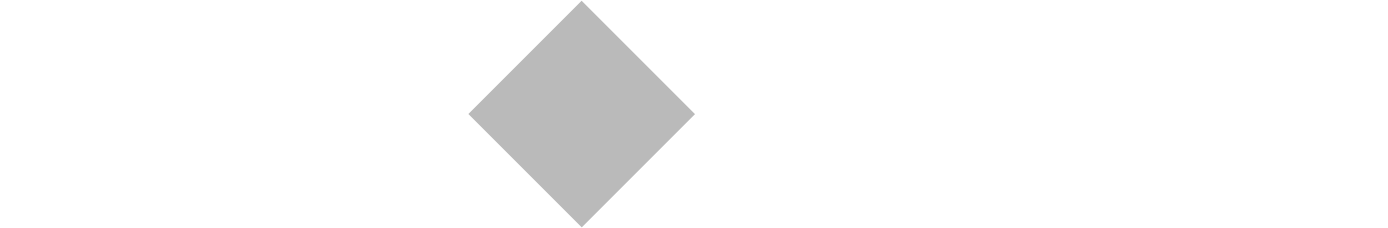
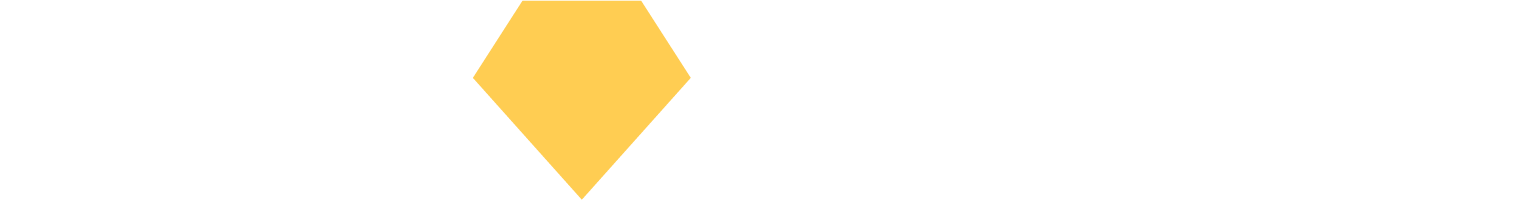
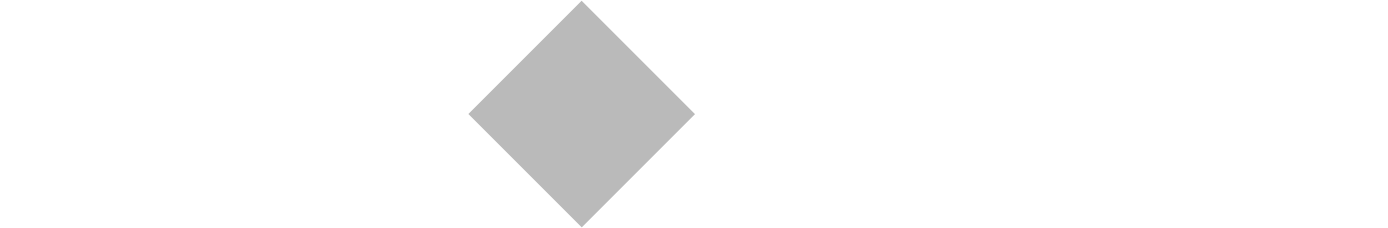
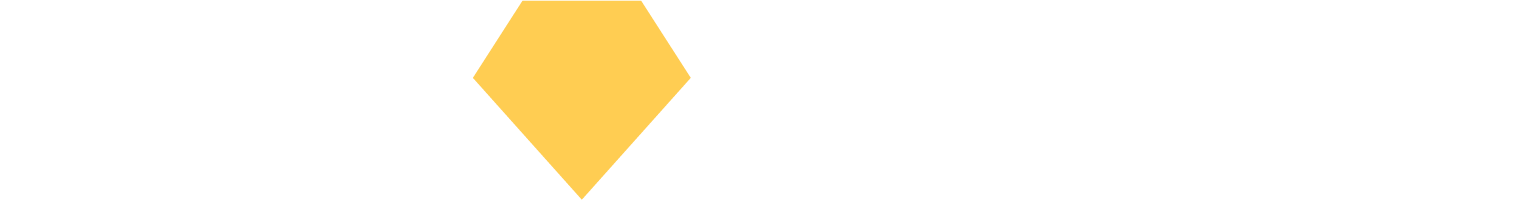
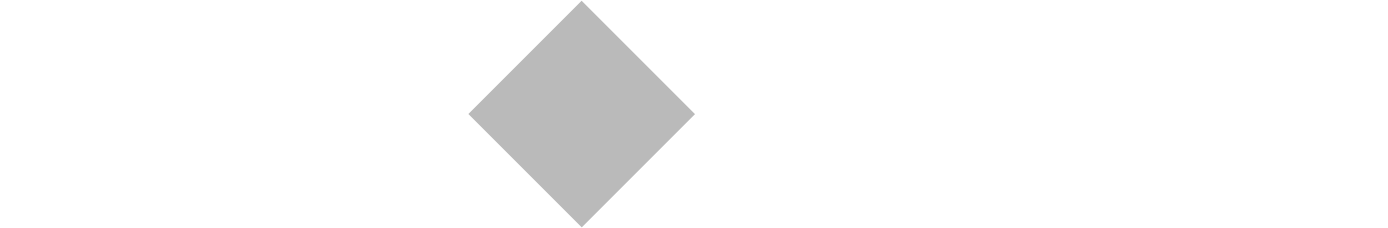
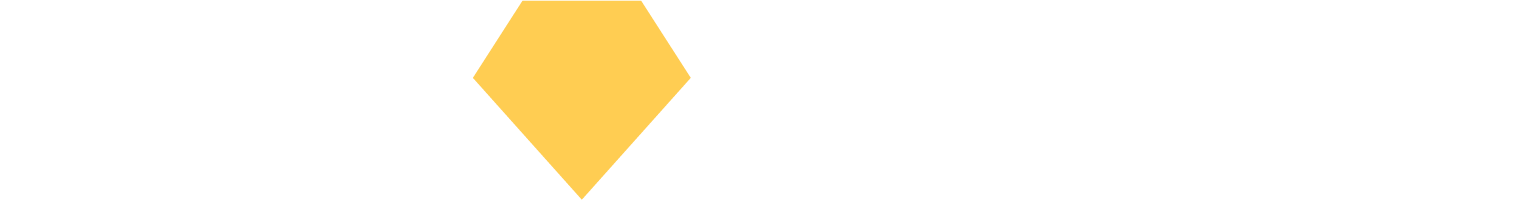
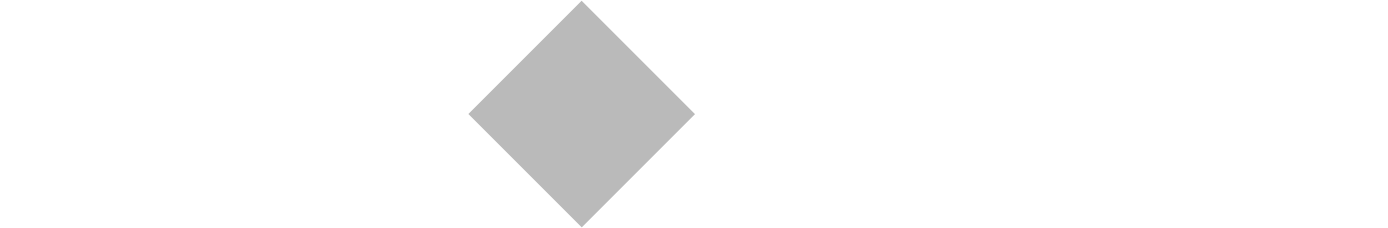
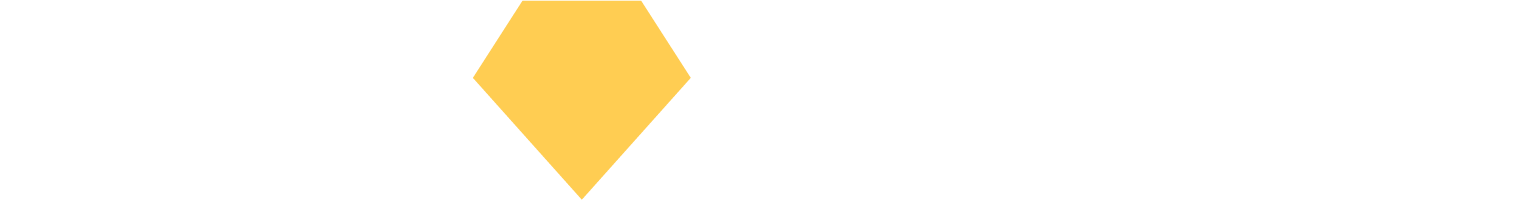
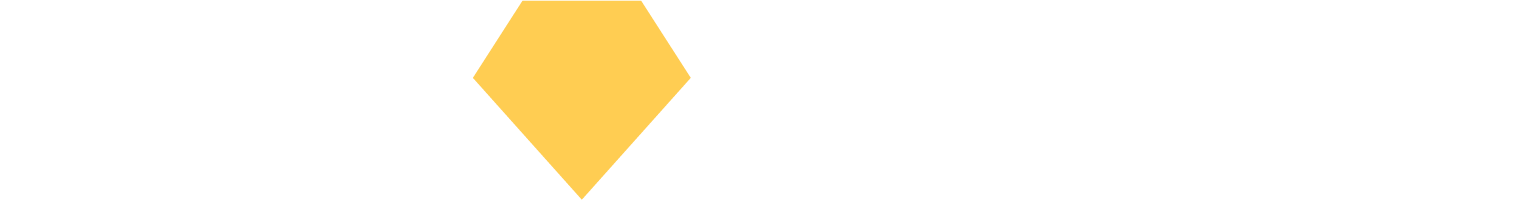
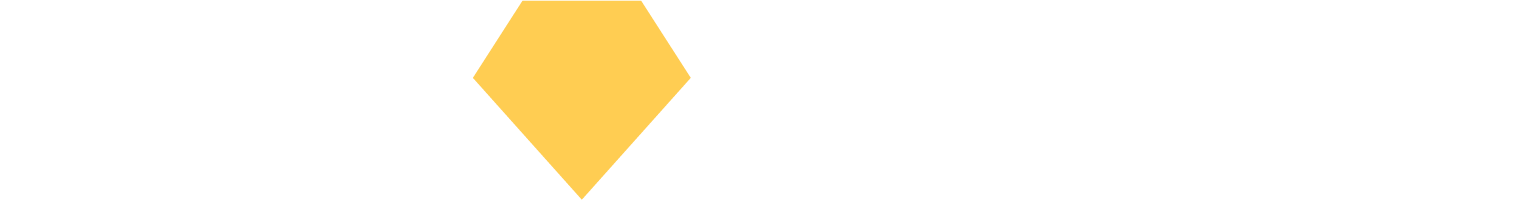
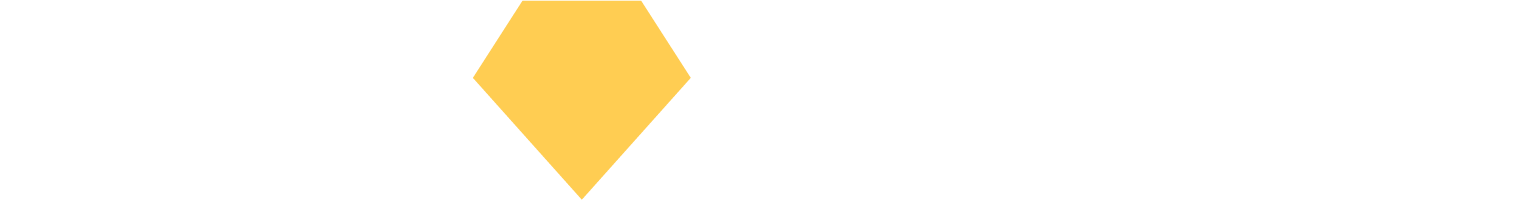
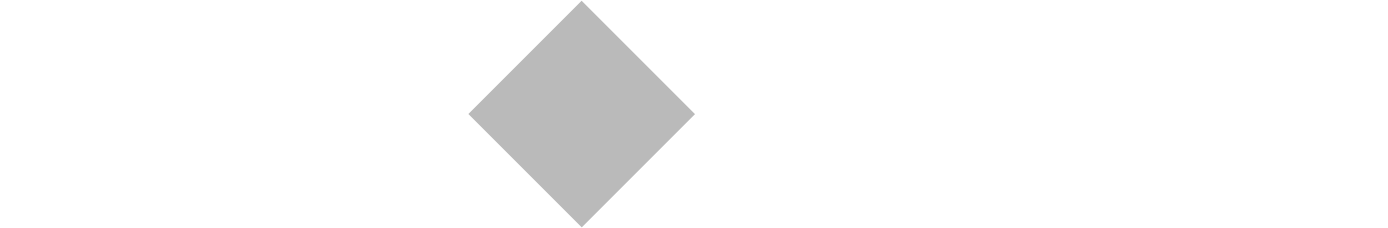
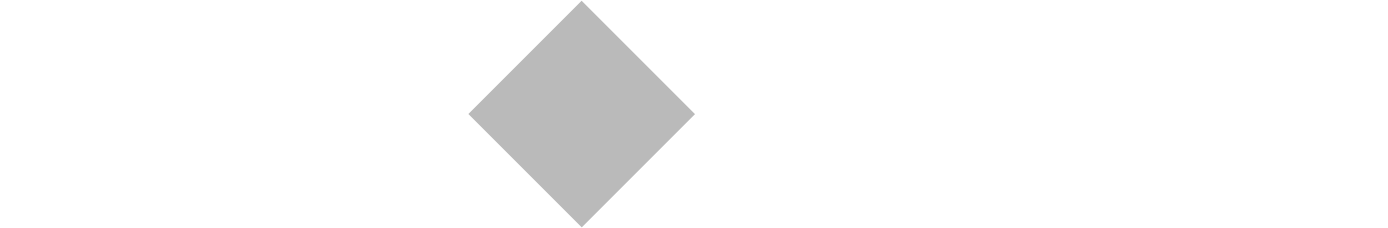
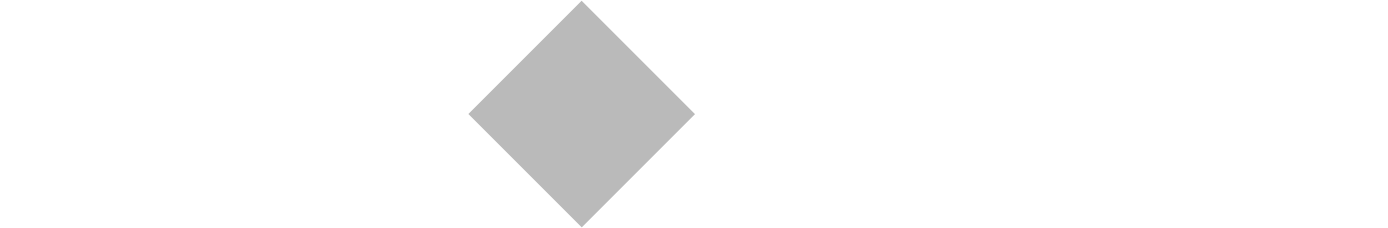
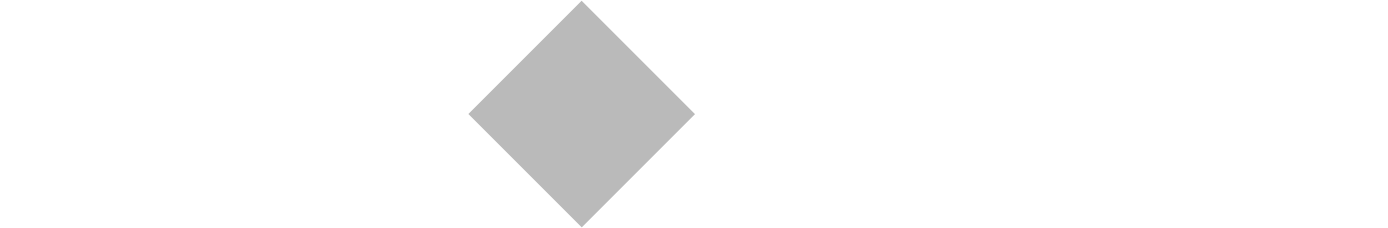
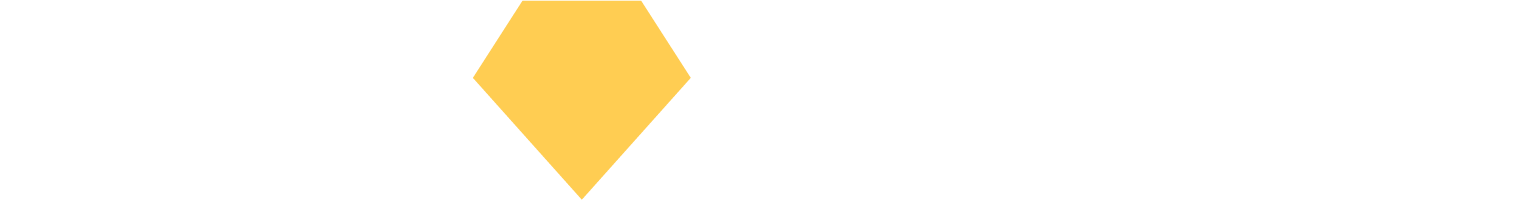
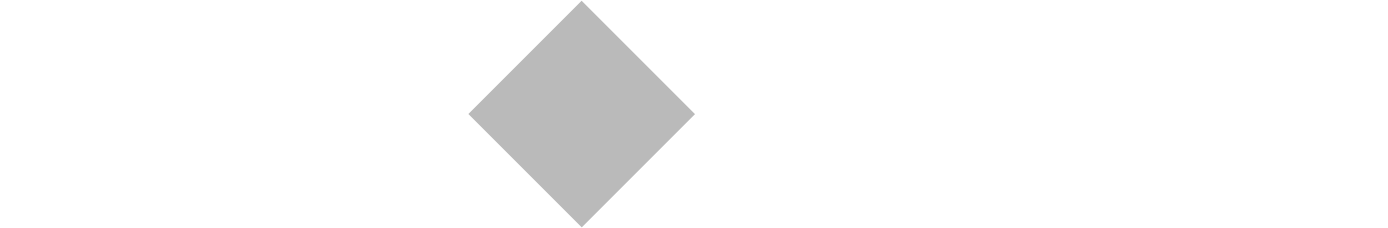
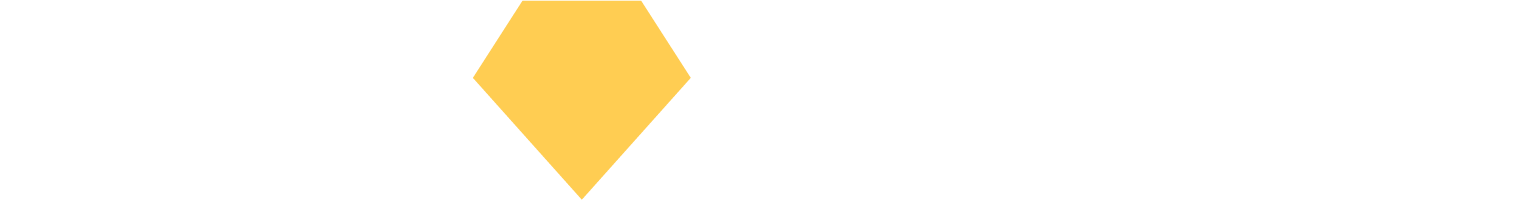
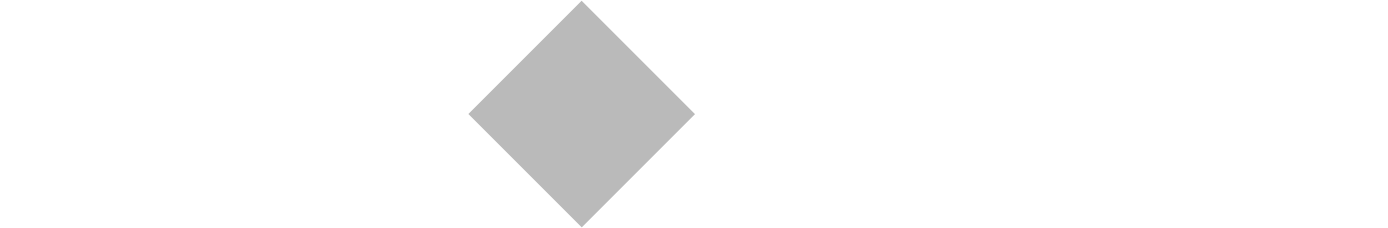
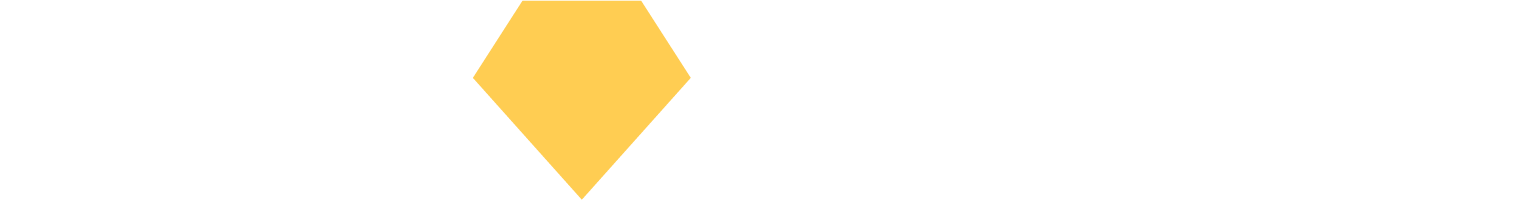
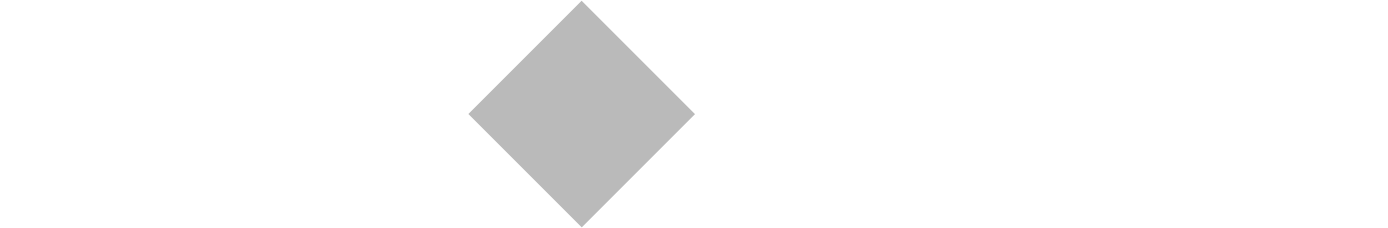
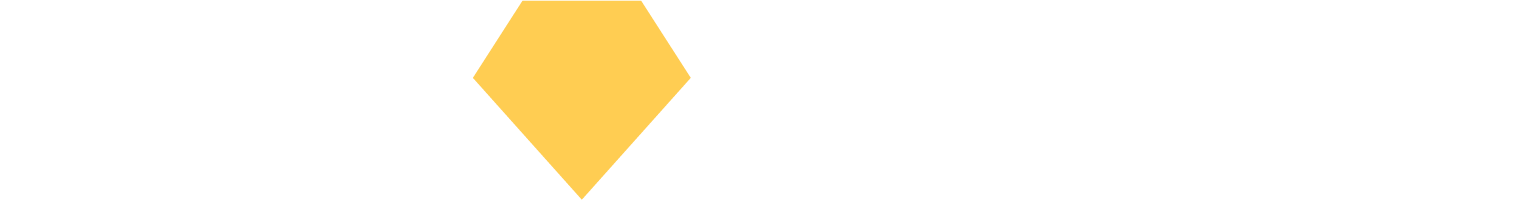
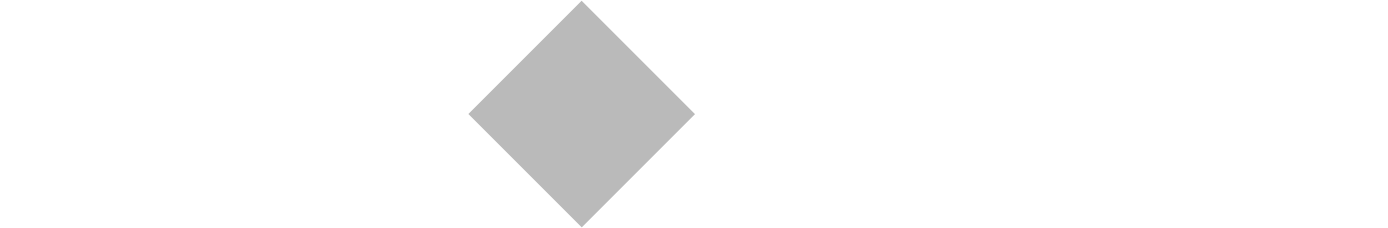
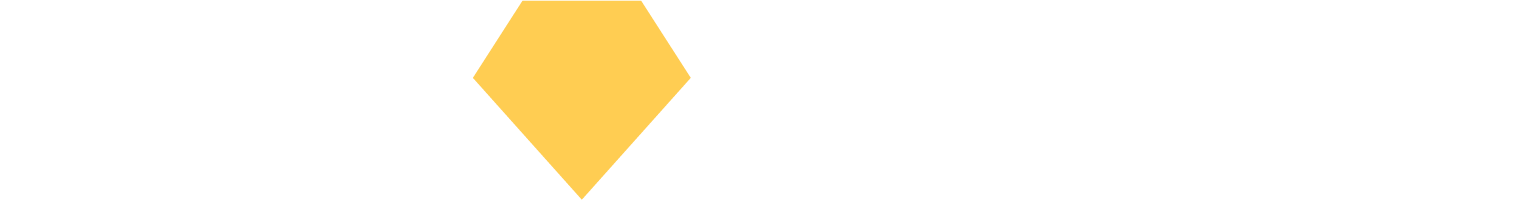
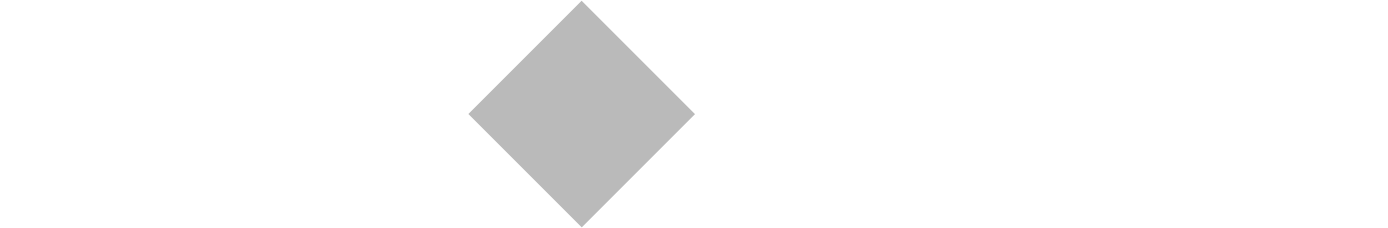
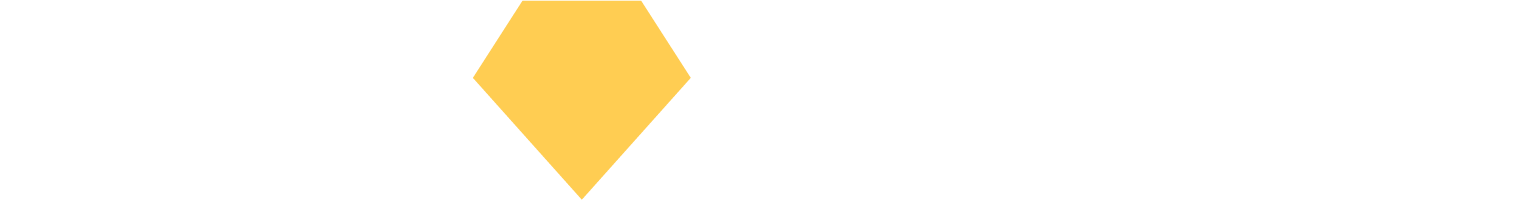
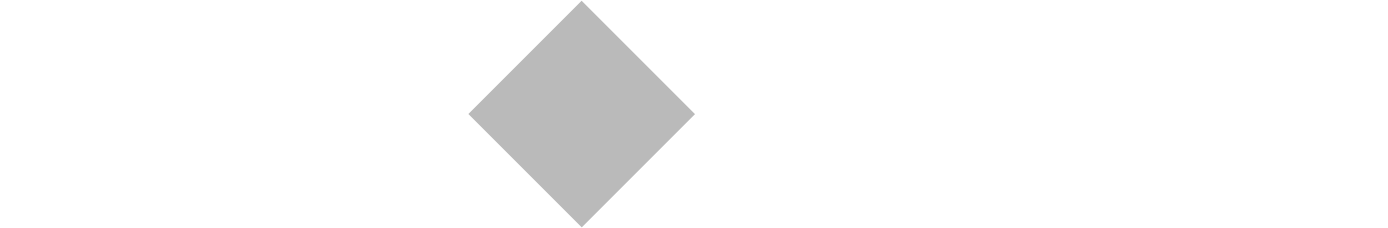
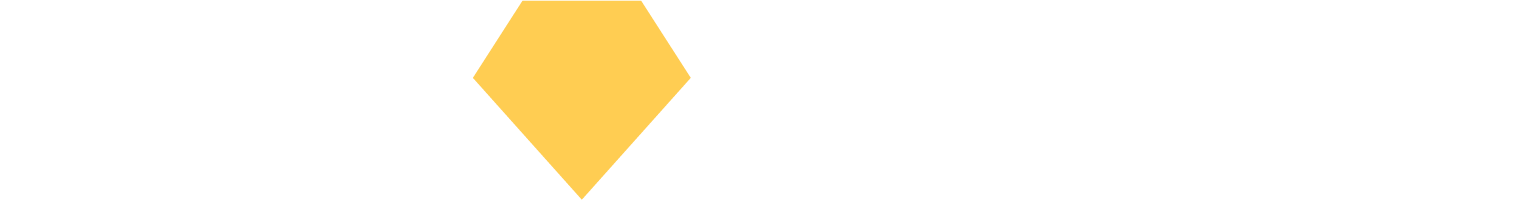
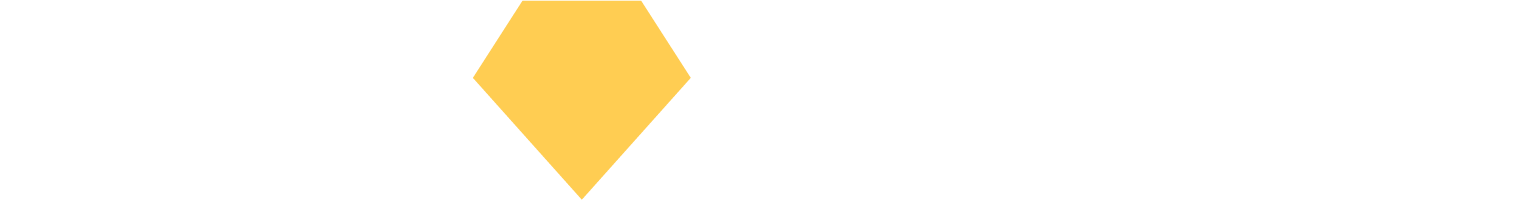
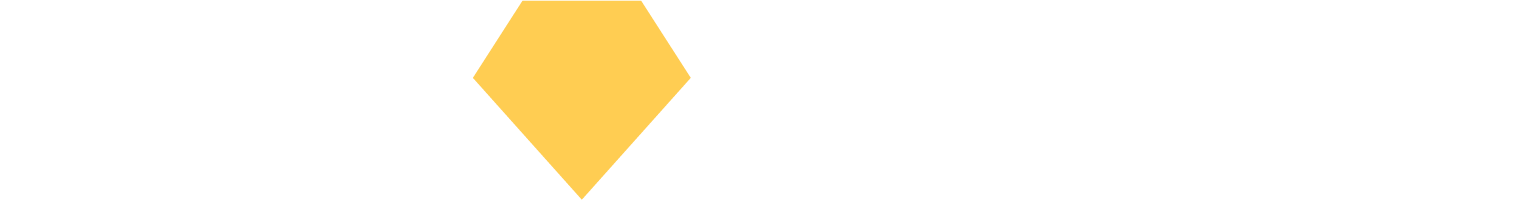
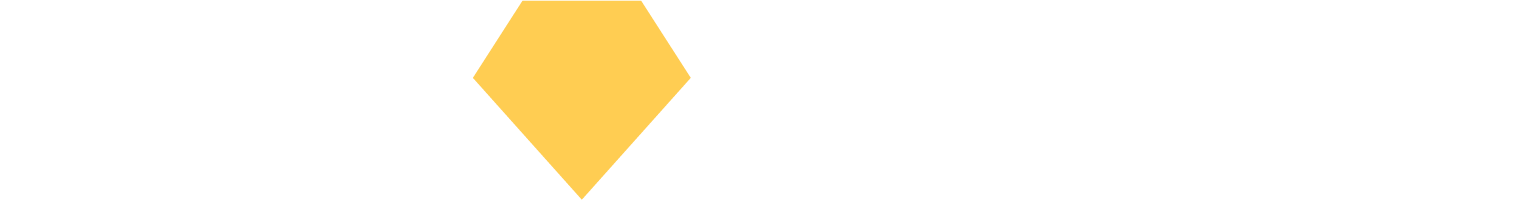
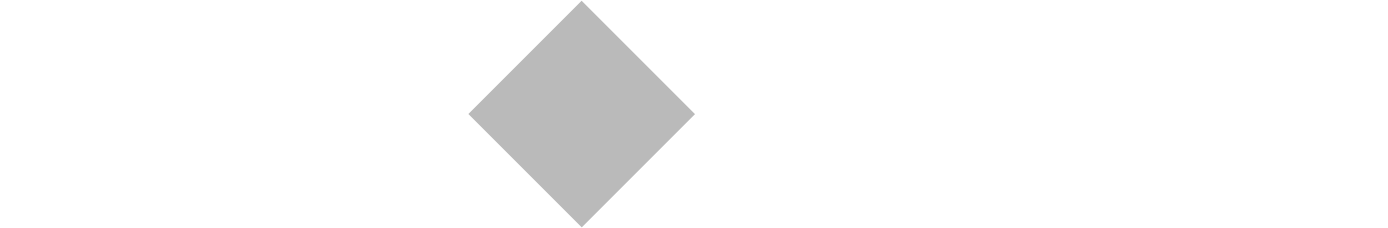
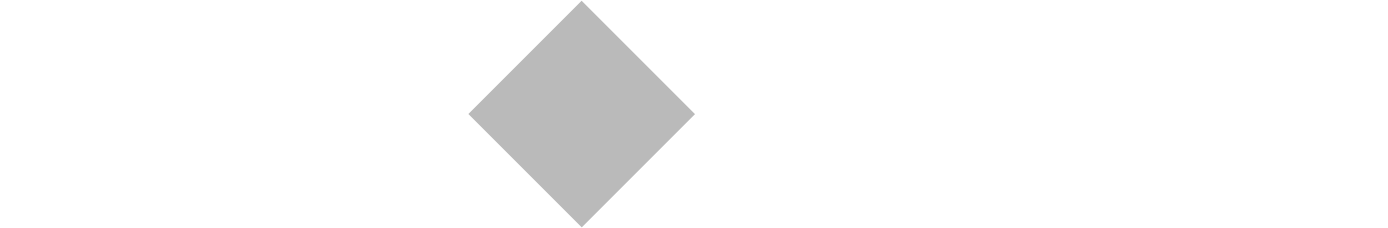
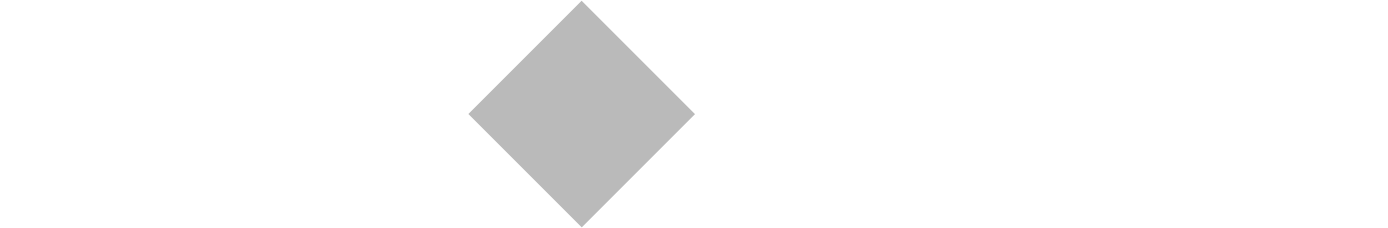
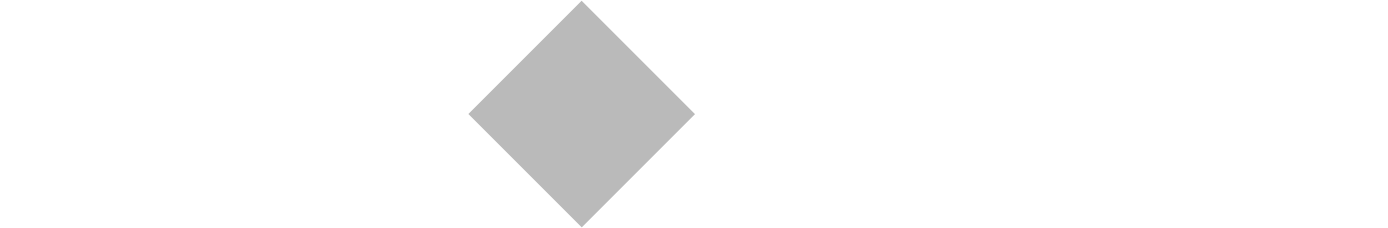

In [5]:
html.find("div", {"class":"IconAttribute_attribute__KTIK0 generated_utility2__1zAUs"}).findAllNext()

## En Başarılı Oyuncunun Sırasının Bulunması

In [6]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).text

'1'

## Oyuncu İsmi Bilgisinin Bulunması

In [7]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[1].text

'Kylian MbappéST'

## OVR Bilgisinin Bulunması

In [8]:
html.find("div",{"class":"Table_statCellValue____Twu"}).text

'91'

In [9]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[103].text

'91'

## " Play Styles + " Bilgisinin Bulunması

In [10]:
html.find("div", {"class":"IconAttribute_attribute__KTIK0 generated_utility2__1zAUs"}).findAllNext()[6].text

'QUICK STEP'

In [11]:
html.find("div", {"class":"ItemGrid_grid__5iapB"}).findAllNext()[49].text

'QUICK STEP'

## Team Bilgisinin Bulunması

In [12]:
html.find("div", {"class":"ItemGrid_grid__5iapB"}).findAllNext()[35].text

'Paris SG'

## PAC Bilgisinin Bulunması

In [13]:
html.find("tr", {"class": "Table_rowBlockGroup__heQL8"}).findAllNext()[4].text

'97'

In [14]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[109].text

'97'

## SHO Bilgisinin Bulunması

In [15]:
html.find("tr", {"class": "Table_rowBlockGroup__heQL8"}).findAllNext()[9].text # 90+1

'901'

In [16]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[114].text

'901'

## Pas Bilgisinin Bulunması

In [17]:
html.find("tr", {"class": "Table_rowBlockGroup__heQL8"}).findAllNext()[15].text

'80'

In [18]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[120].text

'80'

In [19]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[73].text

'80'

## DRI Bilgisinin Bulunması

In [20]:
html.find("tr", {"class": "Table_rowBlockGroup__heQL8"}).findAllNext()[20].text

'92'

In [21]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[78].text

'92'

## Def Bilgisinin Bulunması

In [22]:
html.find("tr", {"class": "Table_rowBlockGroup__heQL8"}).findAllNext()[25].text

'36'

In [23]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[83].text

'36'

## PHY Bilgisinin Bulunması

In [24]:
html.find("tr", {"class": "Table_rowBlockGroup__heQL8"}).findAllNext()[30].text # 78+2

'782'

In [25]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[88].text

'782'

## At Work Rate Bilgisinin Bulunması

In [26]:
html.find("div",{"class":"ItemGrid_grid__5iapB"}).findAllNext()[25].text

'High'

In [27]:
html.find("div",{"class":"Table_rankCell__YsS5o generated_headline5__imvsB"}).findAllNext()[95].text

'OVR91PAC97SHO901PAS80DRI92DEF36PHY782'

## Def Work Rate Bilgisinin Bulunması


In [28]:
html.find("div",{"class":"ItemGrid_grid__5iapB"}).findAllNext()[27].text

'Low'

 ##  Preferred Foot Bilgisinin Bulunması


In [29]:
html.find("div",{"class":"ItemGrid_grid__5iapB"}).findAllNext()[29].text

'Right'

## Age Bilgisinin Bulunması

In [30]:
html.find("div",{"class":"ItemGrid_grid__5iapB"}).findAllNext()[31].text

'24'

## League Bilgisinin Bulunması

In [31]:
html.find("div",{"class":"ItemGrid_grid__5iapB"}).findAllNext()[33].text

'Ligue 1 Uber Eats'

## Team Bilgisinin Bulunması

In [32]:
html.find("div", {"class":"ItemGrid_grid__5iapB"}).findAllNext()[35].text

'Paris SG'

## Height Bilgisinin Bulunması

In [33]:
html.find("div", {"class":"ItemGrid_grid__5iapB"}).findAllNext()[37].text

'182CM / 6\'0"FT'

## Weight Bilgisinin Bulunması

In [34]:
html.find("div", {"class":"ItemGrid_grid__5iapB"}).findAllNext()[39].text

'75KG / 165LBS'

## Nation Bilgisinin Bulunması

In [35]:
html.find("div", {"class":"ItemGrid_grid__5iapB"}).findAllNext()[41].text

'France'

## Alt Positions 1 Bilgisinin Bulunması

In [36]:
html.find("div", {"class":"ItemGrid_grid__5iapB"}).findAllNext()[45].text

'LW'

## Alt Position 2 Bilgisinin Bulunması

In [37]:
html.find("div", {"class":"ItemGrid_grid__5iapB"}).findAllNext()[46].text

'CF'

## Shot Power Bilgisinin Bulunması

In [38]:
html.find("div", {"class":"IconAttribute_attribute__KTIK0 generated_utility2__1zAUs"}).findAllNext()[66].text #90

'Shot Power90'

## Pace Kategori Ortalaması Bilgisinin Bulunması

In [39]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[1].text #97

'Pace97'

## Acceleration Bilgisinin Bulunması

In [40]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[3].text #97

'Acceleration97'

## Sprint Speed Bilgisinin Bulunması

In [41]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[6].text #97

'Sprint Speed97'

## Shooting Kategori Ortalaması Bilgisinin Bulunması

In [42]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[10].text #90

'Shooting90'

## Positioning Bilgisinin Bulunması

In [43]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[13].text #93

'Positioning93'

## Finishing Bilgisinin Bulunması


In [44]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[16].text #94

'Finishing94'

## Shot Power Bilgisinin Bulunması

In [45]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[19].text #90

'Shot Power90'

## Long Shots Bilgisinin Bulunması

In [46]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[22].text #90

'Long Shots83'

## Volleys Bilgisinin Bulunması

In [47]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[25].text #90

'Volleys84'

## Penalties Bilgisinin Bulunması

In [48]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[28].text #90

'Penalties84'

## Passing Kategori Ortalaması Bilgisinin Bulunması

In [49]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[32].text #90

'Passing80'

## Vision Bilgisinin Bulunması

In [50]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[35].text #90

'Vision83'

## Crossing Bilgisinin Bulunması

In [51]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[38].text #90

'Crossing78'

## Free Kick Accuracy Bilgisinin Bulunması

In [52]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[41].text #90

'Free Kick Accuracy69'

## Shot Passing Bilgisinin Bulunması

In [53]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[44].text #90

'Shot Passing86'

## Long Passing Bilgisinin Bulunması

In [54]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[47].text #90

'Long Passing71'

## Curve Bilgisinin Bulunması

In [55]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[50].text #90

'Curve80'

## Dribbling Kategorisi Ortalaması Bilgisinin Bulunması


In [56]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[54].text #90

'Dribbling92'

## Agility Bilgisinin Bulunması

In [57]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[57].text #90

'Agility93'

## Balance Bilgisinin Bulunması

In [58]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[60].text #90

'Balance82'

## Reactions Bilgisinin Bulunması

In [59]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[63].text #90

'Reactions93'

## Ball Control Bilgisinin Bulunması

In [60]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[66].text #90

'Ball Control92'

## Dribbling Bilgisinin Bulunması

In [61]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[69].text #90

'Dribbling93'

# Composure Bilgisinin Bulunması

In [62]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[72].text #90

'Composure88'

## Defending Kategori Ortalaması Bilgisinin Bulunması

In [63]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[76].text

'Defending36'

## Interceptions Bilgisinin Bulunması


In [64]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[79].text

'Interceptions38'

## Heading Accuracy Bilgisinin Bulunması

In [65]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[82].text

'Heading Accuracy73'

 ## Def Awareness Bilgisinin Bulunması

In [66]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[85].text

'Def Awareness26'

## Standing Tackle Bilgisinin Bulunması

In [67]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[88].text

'Standing Tackle34'

## Sliding Tackle Bilgisinin Bulunması

In [68]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[91].text

'Sliding Tackle32'

## Physicality Kategori Ortalaması Bilgisinin Bulunması

In [69]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[95].text

'Physicality78'

## Jumping Bilgisinin Bulunması

In [70]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[98].text

'Jumping88'

## Stamina Bilgisinin Bulunması

In [71]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[101].text

'Stamina88'

## Strenght Bilgisinin Bulunması

In [72]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[104].text

'Strength77'

## Aggressions Bilgisinin Bulunması

In [73]:
html.find("ul",{"class":"List_list__CXKkh List_unstyled__d08Xg List_orientationVertical__JjamW"}).findAllNext()[107].text

'Aggression64'

# Kapalı Haldeki Bilgilerin Elde Edilmesi

In [74]:
from bs4 import BeautifulSoup
import requests

# Hedef sayfanın URL'si
base_url = 'https://www.ea.com/games/ea-sports-fc/ratings?page='  

# Toplam sayfa sayısı
total_pages = 1

# List to store player data
player_data_list = []

# Tüm sayfaları döngü ile gez
for page in range(1, total_pages + 1):
    # Sayfanın tam URL'sini oluştur
    url = f'{base_url}{page}'

    # Sayfayı çek
    response = requests.get(url)

    # Sayfa içeriğini BeautifulSoup ile işle
    soup = BeautifulSoup(response.text, 'html.parser')

    # Her sayfadaki satırları çek
    rows = soup.find_all('tr', {"class": "Table_row__zokjM"})  # You may need to adjust this based on your HTML structure

    # Iterate through each row
    for row in rows:
        # Extract data from each cell in the row
        cells = row.find_all('td', {"class": "Table_cell__pPV_v"})

        # Check if it's a valid row with data
        if cells:
            rank = cells[0].text.strip()
            isim = cells[1].text.strip()
            pos = cells[4].text.strip()
            ovr = cells[5].text.strip()
            pac = cells[6].text.strip()
            sho = cells[7].text.strip()
            pas = cells[8].text.strip()
            dri = cells[9].text.strip()
            defend = cells[10].text.strip()
            phy = cells[11].text.strip()

            # Append data to the list
            player_data_list.append({
                "Name": isim,
                "Rank": rank,
                "POS": pos,
                "OVR": ovr,
                "PAC": pac,
                "SHO": sho,
                "PAS": pas,
                "DRI": dri,
                "DEF": defend,
                "PHY": phy
            })

# Print the list of player data
for player_data in player_data_list:
    print(player_data)


{'Name': 'Kylian MbappéST', 'Rank': '1', 'POS': 'ST', 'OVR': 'OVR91', 'PAC': 'PAC97', 'SHO': 'SHO901', 'PAS': 'PAS80', 'DRI': 'DRI92', 'DEF': 'DEF36', 'PHY': 'PHY782'}
{'Name': 'Alexia PutellasCM', 'Rank': '2', 'POS': 'CM', 'OVR': 'OVR91', 'PAC': 'PAC82', 'SHO': 'SHO90', 'PAS': 'PAS91', 'DRI': 'DRI92', 'DEF': 'DEF72', 'PHY': 'PHY78'}
{'Name': 'Erling HaalandST', 'Rank': '3', 'POS': 'ST', 'OVR': 'OVR91', 'PAC': 'PAC89', 'SHO': 'SHO932', 'PAS': 'PAS661', 'DRI': 'DRI80', 'DEF': 'DEF454', 'PHY': 'PHY881'}
{'Name': 'Kevin De BruyneCM', 'Rank': '4', 'POS': 'CM', 'OVR': 'OVR91', 'PAC': 'PAC722', 'SHO': 'SHO88', 'PAS': 'PAS941', 'DRI': 'DRI87', 'DEF': 'DEF651', 'PHY': 'PHY781'}
{'Name': 'Aitana BonmatíCM', 'Rank': '5', 'POS': 'CM', 'OVR': 'OVR90', 'PAC': 'PAC81', 'SHO': 'SHO84', 'PAS': 'PAS83', 'DRI': 'DRI91', 'DEF': 'DEF75', 'PHY': 'PHY73'}
{'Name': 'Lionel MessiCF', 'Rank': '6', 'POS': 'CF', 'OVR': 'OVR90', 'PAC': 'PAC801', 'SHO': 'SHO872', 'PAS': 'PAS90', 'DRI': 'DRI94', 'DEF': 'DEF331', 'P

# Açık Halde Tek Satır İçin Bilgilerin Elde Edilmesi

In [75]:
# Hedef sayfanın URL'si
base_url = 'https://www.ea.com/games/ea-sports-fc/ratings?page='

# Toplam sayfa sayısı
total_pages = 1

# List to store player data
player_data_list2 = []

# Tüm sayfaları döngü ile gez
for page in range(1, total_pages + 1):
    # Sayfanın tam URL'sini oluştur
    url = f'{base_url}{page}'

    # Sayfayı çek
    response = requests.get(url)

    # Sayfa içeriğini BeautifulSoup ile işle
    soup = BeautifulSoup(response.text, 'html.parser')

    # Her sayfadaki detaylı görünümü içeren div'i çek
    detailed_view_div = soup.find('div', class_='DetailedView_viewWrapper__ecGPu')

    # Check if the div is found
    if detailed_view_div:
        # Extract information from the div
        # You may need to adjust this part based on the actual structure of the div
        ATT_WORK_RATE = detailed_view_div.find('div', class_='Attribute_attribute__HF1Ww generated_utility2__1zAUs').text.strip()
        

        # Append data to the list
        player_data_list2.append({
            "ATTWORK_RATE": ATT_WORK_RATE,
            
        })
        
player_data_list2

[{'ATTWORK_RATE': 'WEAK FOOT'}]

# Her Satır İçin Açık Halde Bilgilerin Elde Edilmesi

In [76]:
from bs4 import BeautifulSoup
import requests

# Hedef sayfanın URL'si
base_url = 'https://www.ea.com/games/ea-sports-fc/ratings?page='

# Toplam sayfa sayısı
total_pages = 1

# List to store player data
new_list = []

# Tüm sayfaları döngü ile gez
for page in range(1, total_pages + 1):
    # Sayfanın tam URL'sini oluştur
    url = f'{base_url}{page}'

    # Sayfayı çek
    response = requests.get(url)

    # Sayfa içeriğini BeautifulSoup ile işle
    soup = BeautifulSoup(response.text, 'html.parser')

    # Her sayfadaki satırları çek
    rows = soup.find_all('tr', {"class": "Table_row__zokjM"})
    for row in rows:
        # Extract data from each cell in the row
        cells = row.find_all('div', class_='DetailedView_viewWrapper__ecGPu')

        # Check if it's a valid row with data
        if cells:
            # Iterate over each cell
            for cell in cells:
                # Extract ATT_WORK_RATE from each cell
                ATT_WORK_RATE = cell.find('div', class_='Attribute_attribute__HF1Ww generated_utility2__1zAUs').text.strip()

                # Append data to the list
                new_list.append({
                    "ATTWORK_RATE": ATT_WORK_RATE,
                })

print(new_list)


[]


In [ ]:
# Hedef sayfanın URL'si
base_url = 'https://www.ea.com/games/ea-sports-fc/ratings?page='

# Toplam sayfa sayısı
total_pages = 1

# List to store player data
player_data_list2 = []

# Tüm sayfaları döngü ile gez
for page in range(1, total_pages + 1):
    # Sayfanın tam URL'sini oluştur
    url = f'{base_url}{page}'

    # Sayfayı çek
    response = requests.get(url)

    # Sayfa içeriğini BeautifulSoup ile işle
    soup = BeautifulSoup(response.text, 'html.parser')
    
    rows = soup.find_all('td', {"class": "Table_cell__pPV_v"}) # You may need to adjust this based on your HTML structure

    # Iterate through each row
    for row in rows:
        detailed_view_div = row.find('div', class_='DetailedView_viewWrapper__ecGPu')
        
        if detailed_view_div:
            ATT_WORK_RATE = detailed_view_div.find('div', class_='Attribute_attribute__HF1Ww generated_utility2__1zAUs').text.strip()
        

        # Append data to the list
        player_data_list2.append({
            "ATTWORK_RATE": ATT_WORK_RATE,
            
        })
        
player_data_list2

|NOT| Sayfamızdaki butona tıklanarak ulaşılabilecek detaylı bilgilere beautifulsoup ile ulaşamadık ya boş liste döndü ya da tek bir satır için o nedenle selenium kütüphanesini kullanarak işlemlere devam edeceğiz.